# Setup

In [1]:
# supress the display of warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn as sk

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text

from sklearn.model_selection import train_test_split, cross_validate,\
GridSearchCV, cross_val_score, KFold, ParameterGrid

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support,\
accuracy_score, recall_score, precision_score, f1_score,\
confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier,\
BaggingClassifier, AdaBoostClassifier

In [4]:
# install imbalanced-learn package
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.3 MB/s 
     |████████████████████████████████| 199 kB 40.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [5]:
# import samplers and classifiers from imblearn
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

# from collections import Counter
# from sklearn.datasets import make_classification
# from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline 
from imblearn.over_sampling import (RandomOverSampler, ADASYN, 
                                    SMOTE, BorderlineSMOTE, SVMSMOTE)
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)
from imblearn.combine import (SMOTEENN, SMOTETomek)
from imblearn.ensemble import (BalancedBaggingClassifier,
                               BalancedRandomForestClassifier,
                               EasyEnsembleClassifier,
                               RUSBoostClassifier)
# from imblearn.base import BaseSampler

In [6]:
# Mount the drive - Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# set seed so that results are reproducible 
np.random.seed(123456)

In [8]:
# import the dataset
df = pd.read_csv('/content/drive/My Drive/carAuction.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Auction                        10000 non-null  object
 1   Color                          10000 non-null  object
 2   IsBadBuy                       10000 non-null  object
 3   MMRCurrentAuctionAveragePrice  10000 non-null  int64 
 4   Size                           10000 non-null  object
 5   TopThreeAmericanName           10000 non-null  object
 6   VehBCost                       10000 non-null  int64 
 7   VehicleAge                     10000 non-null  int64 
 8   VehOdo                         10000 non-null  int64 
 9   WarrantyCost                   10000 non-null  int64 
 10  WheelType                      10000 non-null  object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [10]:
# null value counts for each column
print('Null value counts:', "\n", df.isnull().sum())

Null value counts: 
 Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64


In [11]:
# distribution of the target variable
y_counts = df['IsBadBuy'].value_counts()
y_counts

No     8705
Yes    1295
Name: IsBadBuy, dtype: int64

In [12]:
# save the indices from value_counts for use in the print statement below
y_levels = y_counts.index
y_levels

Index(['No', 'Yes'], dtype='object')

# Create two datasets with increased imbalance for experimentation

In [13]:
# All the "yes" instances in the dataset
yes_df = df[df.IsBadBuy.str.match('Yes')]
yes_df.shape

(1295, 11)

In [14]:
# Randomly sample from the yeses -- yes_df1 will have 25% of the yeses, yes_df2 will have 75% of the yeses
yes_df1, yes_df2 = train_test_split(yes_df, train_size = 0.25)
yes_df1.shape

(323, 11)

In [15]:
df_imb1 = df[~df.index.isin(yes_df1.index)].copy() # subtract 25% of the yeses
df_imb2 = df[~df.index.isin(yes_df2.index)].copy() # subtract 75% of the yeses

In [16]:
df_imb1.shape

(9677, 11)

In [17]:
df_imb2.shape

(9028, 11)

In [18]:
# distribution of the target variable in the two new datasets
y_levels = y_counts.index
y_levels

imb1_y_counts = df_imb1['IsBadBuy'].value_counts()
imb2_y_counts = df_imb2['IsBadBuy'].value_counts()

print("In the original dataset:", "\n")
for i in y_levels:
  print(f"{round(y_counts[i]/len(df)*100, 2)}% is {i}", "\n")

print("\n")

print("In df_imb1:", "\n")
for i in y_levels:
  print(f"{round(imb1_y_counts[i]/len(df)*100, 2)}% is {i}", "\n")

print("\n")

print("In df_imb2:", "\n")
for i in y_levels:
  print(f"{round(imb2_y_counts[i]/len(df)*100, 2)}% is {i}", "\n")

In the original dataset: 

87.05% is No 

12.95% is Yes 



In df_imb1: 

87.05% is No 

9.72% is Yes 



In df_imb2: 

87.05% is No 

3.23% is Yes 



# Create sampler object lists

In [19]:
# oversamplers from imblearn.over_sample
osampler_list = [RandomOverSampler(random_state=42),
                 ADASYN(random_state=42),
                 SMOTE(random_state=42),
                 SVMSMOTE(random_state=42),
                 BorderlineSMOTE(random_state=42)]
osampler_name_list = ['ROS','ADASYN','SMOTE','SVMSMOTE','BorderlineSMOTE']

In [20]:
# undersamplers from imblearn.under_sample
usampler_list = [RandomUnderSampler(random_state=42),
                 NearMiss(version=1),
                 NearMiss(version=2),
                 NearMiss(version=3),
#                 TomekLinks(),
                 EditedNearestNeighbours(),
                 RepeatedEditedNearestNeighbours(),
                 AllKNN()]
usampler_name_list = ['RUS','NearMiss1','NearMiss2','NearMiss3',
                      'ENN','RENN','ALLKNN']

In [21]:
# combined samplers from imblearn.combine
csampler_list = [SMOTEENN(random_state=42),
                 SMOTETomek(random_state=42)]
csampler_name_list = ['SMOTEENN', 'SMOTETomek']

# Define classifier objects and create lists of their names

In [22]:
# Balanced ensemble classifiers from imblearn.ensemble
bbc = BalancedBaggingClassifier(n_estimators=10, 
                                base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)
# brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
rusboost = RUSBoostClassifier(n_estimators=50, algorithm='SAMME.R',
                              random_state=42)
eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)
be_clf_list = [bbc,rusboost,eec]
be_clf_name_list = ['Balanced_Bagging','RUSBoost','EasyEnsembleClassifier']

In [23]:
# five different classifiers to test out 

# set hyperparameters for the first iteration of the decision tree classifier
DTC1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)

# then list the five classifiers
clf_list1 = [DTC1, GaussianNB(),MLPClassifier(),SVC(),KNeighborsClassifier()]
clf_name_list1 = ['DTC1','NB_default','MLP_default','SVC_default','KNN_default']

In [24]:
# logistic regression classifiers
lr_lbfgs = LogisticRegression(random_state=42)
lr_lbfgs_lowerC = LogisticRegression(C=0.1, random_state=42)
lr_newton = LogisticRegression(solver='newton-cg',random_state=42)
lr_lib = LogisticRegression(solver='liblinear',random_state=42) 
lr_lib_lowerC = LogisticRegression(C=0.1,solver='liblinear',random_state=42) 
lr_lib_l1 = LogisticRegression(solver='liblinear',penalty = 'l1',random_state=42) 
lr_sag = LogisticRegression(solver='sag',random_state=42)
lr_saga = LogisticRegression(solver='saga',random_state=42)

lr_list = [lr_lbfgs,lr_newton,lr_sag,lr_saga, lr_lib, lr_lib_lowerC,lr_lib_l1,]
lr_name_list = ['lbfgs_l2','newton_l2','sag_l2','saga_l2','lib_l2','lib_lowerC','lib_l1',]

In [25]:
# bagging classifiers
bag_list=[BaggingClassifier(random_state=42),
          BaggingClassifier(n_estimators=20,random_state=42),
          BaggingClassifier(base_estimator=SVC(),random_state=42),
          BaggingClassifier(base_estimator=LogisticRegression(),random_state=42)]
bag_name_list=['Bagging_default','Bagging_20','Bagging_SVC','Bagging_lr']

In [26]:
# boosting classifiers
boost_list = [AdaBoostClassifier(), AdaBoostClassifier(learning_rate=0.5), 
              AdaBoostClassifier(base_estimator = LogisticRegression(), n_estimators=15,random_state=42),
              AdaBoostClassifier(base_estimator = LogisticRegression(), n_estimators=15,learning_rate=0.5,random_state=42)]
boost_name_list = ['Ada_default','Ada_dt_halflearning','Ada_lr_15','Ada_lr_15_halflearning']

In [27]:
# random forest classifiers
rf_list = [RandomForestClassifier(random_state=42), 
           RandomForestClassifier(criterion='entropy',random_state=42), 
           RandomForestClassifier(n_estimators=50,random_state=42),
           RandomForestClassifier(criterion='entropy',n_estimators=50,random_state=42),
           RandomForestClassifier(max_depth=7,random_state=42),
           RandomForestClassifier(criterion='entropy',max_depth=7,random_state=42)]
rf_name_list = ['rf_default','rf_entropy_default','rf_50','rf_entropy_50','rf_max7','rf_entropy_max7']

In [28]:
# a combination of the classifiers above with a variety of different hyperparameters
lr_lib_l1_lowerc = LogisticRegression(C=0.1,solver='liblinear',penalty = 'l1', random_state=42)
Ada_lr_15_halflearn = AdaBoostClassifier(base_estimator = LogisticRegression(), n_estimators=15,learning_rate=0.5,random_state=42)
rf_max7 = RandomForestClassifier(max_depth=7,random_state=42)
Bagging_20 = BaggingClassifier(n_estimators=20,random_state=42)
clf_list4 = [DTC1,SVC(), 
            lr_lib_l1_lowerc,
            Bagging_20,
            Ada_lr_15_halflearn,
            rf_max7]
clf_name_list4 = ['DTC1','SVC_default','lr_lib_l1_lowerc','Bagging_20','Ada_lr_15_halflearn','rf_max7']

# Encode categorical variables

In [29]:
def fun_enc(df, df_name):
  # separate target variable and features
  y_df = df['IsBadBuy'].copy()
  X_df = df.drop('IsBadBuy', axis=1).copy()

  # separate numeric and catogorical features
  X_num_df = X_df.select_dtypes(exclude=['object']).copy()
  X_cat_df = X_df.select_dtypes(include=['object']).copy()
  X_cat_list = X_cat_df.columns.tolist()
  X_col_list = X_cat_list + X_num_df.columns.tolist()

  enc_col_df_list =[] # list of encoded dataframes for use in pd.concat()
  enc_col_counts = [] # list of number of encoded features per original feature
  
  # encode the categorical features
  for i in X_cat_list:
    dummy_df = pd.get_dummies(X_cat_df[i]) # create an encoded dataframe for each categorical feature
    enc_col_counts.append(dummy_df.shape[1]) # add the number of columns from the dataframe the list of counts
    enc_col_df_list.append(dummy_df) # add the newly encoded dataframe to the list of dataframes 
  
  # add in the numeric features
  for i in X_num_df:
    enc_col_counts.append(1) # each numeric feature only needs one dummy variable
    enc_col_df_list.append(df[i]) # add the numeric columns to the final list of encoded columns
  X_enc_df = pd.concat(enc_col_df_list,axis=1) # concatenate the list of dataframes

  print(f'In {df_name}: the count of new columns created from each original column:\n',enc_col_counts)

  return X_enc_df, y_df, X_col_list, enc_col_counts

In [30]:
X_df, y_df, X_col_list, remove_col_counts = fun_enc(df, 'df')

In df: the count of new columns created from each original column:
 [3, 16, 12, 4, 4, 1, 1, 1, 1, 1]


In [31]:
X_df1, y_df1, X_col_list1, remove_col_counts1 = fun_enc(df_imb1, 'df_imb1')
X_df2, y_df2, X_col_list2, remove_col_counts2 = fun_enc(df_imb2, 'df_imb2')

In df_imb1: the count of new columns created from each original column:
 [3, 16, 12, 4, 4, 1, 1, 1, 1, 1]
In df_imb2: the count of new columns created from each original column:
 [3, 16, 12, 4, 4, 1, 1, 1, 1, 1]


In [32]:
  def fun_split(df_name, X_df, y_df, train_pct, val_pct): 
    # split the predictors and the target data frame into test (1- train_pct) and 
    # train (train_pct) dataframes using the target data frame
    X_train, X_val_test, y_train, y_val_test = \
    train_test_split(X_df, y_df, train_size=train_pct, random_state=42)
    
    # split again using train_size=val_pct
    X_val, X_test, y_val, y_test = \
    train_test_split(X_val_test, y_val_test, train_size=val_pct, random_state=42)
    
    # print the shapes of the three divisions
    print(f'In {df_name}:')
    print('\n')
    print(f'Shape of X_train:', X_train.shape)
    print(f'Shape of y_train:', y_train.shape)
    print('\n')
    print(f'Shape of X_val:', X_val.shape)
    print(f'Shape of y_val:', y_val.shape)
    print('\n')
    print(f'Shape of X_test', X_test.shape)
    print(f'Shape of y_test', y_test.shape)
    print('\n')

    # Generate y_counts in train, val and test sets 
    train_y_counts = y_train.value_counts()
    val_y_counts = y_val.value_counts()
    test_y_counts = y_test.value_counts()
    
    # print y distribution in percentage for train, val and test sets
    print(f'In {df_name} train set:','\n')
    for i in y_levels:
      print(f'{round(100*train_y_counts[i]/X_train.shape[0],2)} percent is {i}','\n')
    print('\n')
    print(f'In {df_name} validation set:','\n')
    for i in y_levels:
      print(f'{round(100*val_y_counts[i]/X_val.shape[0],2)} percent is {i}','\n')
    print('\n')
    print(f'In {df_name} test set:','\n')
    for i in y_levels:
      print(f'{round(100*test_y_counts[i]/X_test.shape[0],2)} percent is {i}','\n')
    return X_train, y_train, X_val, y_val, X_test, y_test; 
    print('\n')

In [33]:
# split the original df
X_train,  y_train, X_val, y_val, X_test, y_test = fun_split('df', X_df, y_df, 0.6, 0.5)

In df:


Shape of X_train: (6000, 44)
Shape of y_train: (6000,)


Shape of X_val: (2000, 44)
Shape of y_val: (2000,)


Shape of X_test (2000, 44)
Shape of y_test (2000,)


In df train set: 

86.88 percent is No 

13.12 percent is Yes 



In df validation set: 

87.4 percent is No 

12.6 percent is Yes 



In df test set: 

87.2 percent is No 

12.8 percent is Yes 



In [34]:
# split df_imb1
X_train1,  y_train1, X_val1, y_val1, X_test1, y_test1 = fun_split('df_imb1', X_df1, y_df1, 0.6, 0.5)

In df_imb1:


Shape of X_train: (5806, 44)
Shape of y_train: (5806,)


Shape of X_val: (1935, 44)
Shape of y_val: (1935,)


Shape of X_test (1936, 44)
Shape of y_test (1936,)


In df_imb1 train set: 

89.8 percent is No 

10.2 percent is Yes 



In df_imb1 validation set: 

90.49 percent is No 

9.51 percent is Yes 



In df_imb1 test set: 

89.88 percent is No 

10.12 percent is Yes 



In [35]:
# split df_imb2
X_train2,  y_train2, X_val2, y_val2, X_test2, y_test2 = fun_split('df_imb2', X_df2, y_df2, 0.6, 0.5)

In df_imb2:


Shape of X_train: (5416, 44)
Shape of y_train: (5416,)


Shape of X_val: (1806, 44)
Shape of y_val: (1806,)


Shape of X_test (1806, 44)
Shape of y_test (1806,)


In df_imb2 train set: 

96.58 percent is No 

3.42 percent is Yes 



In df_imb2 validation set: 

95.85 percent is No 

4.15 percent is Yes 



In df_imb2 test set: 

96.51 percent is No 

3.49 percent is Yes 



# Create resampled train sets using SMOTE
Don't resample the validation or test sets. Always evaluate on actual, non-resampled data.

In [36]:
# resample the train set from the original data (don't resample validate or test sets)
sm = SMOTE(random_state=42)
smk3 = SMOTE(k_neighbors=3, random_state=42)

In [37]:
X_train_sm, y_train_sm = sm.fit_resample(X_train.values, y_train)

In [38]:
print('Shapes of X_train_sm and y_train_sm:',X_train_sm.shape, y_train_sm.shape,'\n')
print('Target variable instance counts:\n', pd.Series(y_train_sm).value_counts())

Shapes of X_train_sm and y_train_sm: (10426, 44) (10426,) 

Target variable instance counts:
 Yes    5213
No     5213
Name: IsBadBuy, dtype: int64


In [39]:
# resample the train sets of the two new datasets that are more imbalanced
X_train1_sm, y_train1_sm =sm.fit_resample(X_train1.values, y_train1)
X_train2_sm, y_train2_sm =sm.fit_resample(X_train2.values, y_train2)
print('Shapes of X_train1_sm and y_train1_sm:',X_train1_sm.shape, y_train1_sm.shape,'\n')
print('Instance counts by values in target variable:\n', pd.Series(y_train1_sm).value_counts())
print('\n')
print('Shapes of X_train2_sm and y_train2_sm:', X_train2_sm.shape, y_train2_sm.shape,'\n')
print('Target variable instance counts:\n', pd.Series(y_train2_sm).value_counts())


Shapes of X_train1_sm and y_train1_sm: (10428, 44) (10428,) 

Instance counts by values in target variable:
 No     5214
Yes    5214
Name: IsBadBuy, dtype: int64


Shapes of X_train2_sm and y_train2_sm: (10462, 44) (10462,) 

Target variable instance counts:
 No     5231
Yes    5231
Name: IsBadBuy, dtype: int64


In [40]:
X_train_smk3, y_train_smk3 = smk3.fit_resample(X_train.values, y_train)
X_train1_smk3, y_train1_smk3 = smk3.fit_resample(X_train1.values, y_train1)
X_train2_smk3, y_train2_smk3 = smk3.fit_resample(X_train2.values, y_train2)
print('Shapes of X_train_smk3 and y_train_smk3:', X_train1_smk3.shape, y_train_smk3.shape,'\n')
print('Target variable instance counts:\n', pd.Series(y_train1_smk3).value_counts())
print('\n')
print('Shapes of X_train1_smk3 and y_train1_smk3:', X_train1_smk3.shape, y_train1_smk3.shape,'\n')
print('Target variable instance counts:\n', pd.Series(y_train1_smk3).value_counts())
print('\n')
print('Shapes of X_train2_smk3 and y_train2_smk3:', X_train2_smk3.shape, y_train2_smk3.shape,'\n')
print('Target variable instance counts:\n', pd.Series(y_train2_smk3).value_counts())

Shapes of X_train_smk3 and y_train_smk3: (10428, 44) (10426,) 

Target variable instance counts:
 No     5214
Yes    5214
Name: IsBadBuy, dtype: int64


Shapes of X_train1_smk3 and y_train1_smk3: (10428, 44) (10428,) 

Target variable instance counts:
 No     5214
Yes    5214
Name: IsBadBuy, dtype: int64


Shapes of X_train2_smk3 and y_train2_smk3: (10462, 44) (10462,) 

Target variable instance counts:
 No     5231
Yes    5231
Name: IsBadBuy, dtype: int64


# Evaluating model performance on the validation and test sets

In [41]:
# func for fitting a model on the train set, predicting on the validation and test sets, and reporting the results
def fun_clf_split_val_test4(clf, clf_name, X_train, y_train, X_val, y_val, X_test, y_test):
  # fit an estimator to train data
  model = clf.fit(X_train,y_train)
  
  # model_name = type(model).__name__
  
  # generate predictions for the target of the validation set
  pred_val = model.predict(X_val)
  
  # create a report on the validation set performance
  val_report_dict = metrics.classification_report(y_val, pred_val, labels=y_levels, output_dict=True)
  val_report_df = round(pd.DataFrame.from_dict(val_report_dict).reset_index(drop=False),2)
  val_report_df['clf_name'] = clf_name
  
  # generate predictions for the target of the test set
  pred_test = model.predict(X_test)

  # create a report on the test set performance
  test_report_dict = metrics.classification_report(y_test, pred_test, labels=y_levels,output_dict=True)
  test_report_df = round(pd.DataFrame.from_dict(test_report_dict).reset_index(drop=False),2)
  test_report_df['clf_name'] = clf_name 
  
  # bundle up validation and test results in a single row
  split_val_test_results_df = pd.DataFrame({'clf_name':[clf_name],'test_results':[test_report_df],'validate_results':[val_report_df]})
  return split_val_test_results_df


In [42]:
# run the function on the original dataset that has been resampled
sm_val_test_results_df = fun_clf_split_val_test4(DTC1,'DTC1',X_train_sm,y_train_sm,X_val,y_val,X_test,y_test)
smk3_val_test_results_df = fun_clf_split_val_test4(DTC1,'DTC1',X_train_smk3,y_train_smk3,X_val,y_val,X_test,y_test)

print('Validation results using smote on df:\n', sm_val_test_results_df['validate_results'].iloc[0],'\n')
print('Validation results using smote with 3 neighbors on df:\n', sm_val_test_results_df['validate_results'].iloc[0],'\n')
print('Test results using smote on df::\n', sm_val_test_results_df['test_results'].iloc[0],'\n')
print('Test results using smote with 3 neighbors on df1:\n', smk3_val_test_results_df['test_results'].iloc[0],'\n')

Validation results using smote on df:
        index       No     Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.90    0.65      0.89       0.78          0.87     DTC1
1     recall     0.98    0.22      0.89       0.60          0.89     DTC1
2   f1-score     0.94    0.33      0.89       0.63          0.86     DTC1
3    support  1748.00  252.00      0.89    2000.00       2000.00     DTC1 

Validation results using smote with 3 neighbors on df:
        index       No     Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.90    0.65      0.89       0.78          0.87     DTC1
1     recall     0.98    0.22      0.89       0.60          0.89     DTC1
2   f1-score     0.94    0.33      0.89       0.63          0.86     DTC1
3    support  1748.00  252.00      0.89    2000.00       2000.00     DTC1 

Test results using smote on df::
        index       No     Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.90    0.84       0.9       0.87   

In [43]:
# run the function on the first "new" imbalanced dataset that has been resampled
sm_val_test_results_df1 = fun_clf_split_val_test4(DTC1,'DTC1',X_train1_sm,y_train1_sm,X_val1,y_val1,X_test1,y_test1)
smk3_val_test_results_df1 = fun_clf_split_val_test4(DTC1,'DTC1',X_train1_smk3,y_train1_smk3,X_val1,y_val1,X_test1,y_test1)

print('Validation results using smote on df1:\n', sm_val_test_results_df1['validate_results'].iloc[0],'\n')
print('Validation results using smote with 3 neighbors on df1:\n', smk3_val_test_results_df1['validate_results'].iloc[0],'\n')
print('Test results using smote on df1:\n',sm_val_test_results_df1['test_results'].iloc[0],'\n')
print('Test results using smote with 3 neighbors on df1:\n',smk3_val_test_results_df1['test_results'].iloc[0],'\n')

Validation results using smote on df1:
        index       No     Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.93    0.68      0.92       0.80          0.90     DTC1
1     recall     0.99    0.24      0.92       0.62          0.92     DTC1
2   f1-score     0.96    0.36      0.92       0.66          0.90     DTC1
3    support  1751.00  184.00      0.92    1935.00       1935.00     DTC1 

Validation results using smote with 3 neighbors on df1:
        index       No     Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.93    0.68      0.92       0.80          0.90     DTC1
1     recall     0.99    0.24      0.92       0.62          0.92     DTC1
2   f1-score     0.96    0.36      0.92       0.66          0.90     DTC1
3    support  1751.00  184.00      0.92    1935.00       1935.00     DTC1 

Test results using smote on df1:
        index       No     Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.92    0.69      0.91       0.81 

In [44]:
# run the function on the second "new" imbalanced dataset that has been resampled
sm_val_test_results_df2 = fun_clf_split_val_test4(DTC1, 'DTC1', X_train2_sm, y_train2_sm, X_val2, y_val2, X_test2, y_test2)
smk3_val_test_results_df2 = fun_clf_split_val_test4(DTC1, 'DTC1', X_train2_smk3, y_train2_smk3, X_val2, y_val2, X_test2, y_test2)

print('Validation results using smote on df2:\n', sm_val_test_results_df2['validate_results'].iloc[0],'\n')
print('Validation results using smote with 3 neighbors on df2:\n', smk3_val_test_results_df2['validate_results'].iloc[0],'\n')
print('Test results using smote on df2:\n',sm_val_test_results_df2['test_results'].iloc[0],'\n')
print('Test results using smote with 3 neighbors on df2:\n',smk3_val_test_results_df2['test_results'].iloc[0],'\n')

Validation results using smote on df2:
        index       No    Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.97   0.57      0.96       0.77          0.95     DTC1
1     recall     0.99   0.27      0.96       0.63          0.96     DTC1
2   f1-score     0.98   0.36      0.96       0.67          0.95     DTC1
3    support  1731.00  75.00      0.96    1806.00       1806.00     DTC1 

Validation results using smote with 3 neighbors on df2:
        index       No    Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.97   0.23      0.93       0.60          0.94     DTC1
1     recall     0.96   0.29      0.93       0.63          0.93     DTC1
2   f1-score     0.96   0.26      0.93       0.61          0.93     DTC1
3    support  1731.00  75.00      0.93    1806.00       1806.00     DTC1 

Test results using smote on df2:
        index       No    Yes  accuracy  macro avg  weighted avg clf_name
0  precision     0.97   0.42      0.96       0.70          0.9

In [45]:
# func for fitting multiple models on the train set, predicting on the validation and test sets, and reporting the results
def fun_split_val_multi_clf(clf_list,clf_name_list,X_train,y_train,X_val,y_val,X_test,y_test):
  multi_clf_results_list = []
  for i in range(0,len(clf_list)):
      clf_results_df = fun_clf_split_val_test4(clf_list[i],clf_name_list[i],X_train,y_train,X_val, y_val,X_test,y_test)
      multi_clf_results_list.append(clf_results_df)
              # force pd.concat() to create a good index
  split_val_multi_clf_results_df = pd.concat(multi_clf_results_list).reset_index(drop=True)
  return split_val_multi_clf_results_df

In [46]:
# Run cv_val_multi_clf() for resampled training data, clf_list1 and clf_name_list1
sm_multi_clf_results_df = fun_split_val_multi_clf(clf_list1, clf_name_list1,X_train_sm,y_train_sm,X_val,y_val,X_test,y_test)
sm_multi_clf_results_df1 = fun_split_val_multi_clf(clf_list1, clf_name_list1,X_train1_sm,y_train1_sm,X_val1,y_val1,X_test1,y_test1)
smk3_multi_clf_results_df2 = fun_split_val_multi_clf(clf_list1, clf_name_list1,X_train2_smk3,y_train2_smk3,X_val2,y_val2,X_test2,y_test2)

In [47]:
# create a function for combining all the validation reports and combining test reports for each classifier
def fun_multi_clf_reports(split_val_multi_clf_results_df):
  multi_clf_val_report_list = []
  multi_clf_test_report_list = []
  for index, model_row in split_val_multi_clf_results_df.iterrows():
    multi_clf_val_report_list.append(model_row['validate_results'])
    multi_clf_test_report_list.append(model_row['test_results'])
    # end of for loop
  multi_clf_val_report_df = pd.concat(multi_clf_val_report_list)
  multi_clf_val_report_df = multi_clf_val_report_df.reset_index(drop=False)
  multi_clf_val_report_df = multi_clf_val_report_df.rename(columns={"index": "scorer"})
  multi_clf_test_report_df = pd.concat(multi_clf_test_report_list)
  multi_clf_test_report_df = multi_clf_test_report_df.reset_index(drop=False)
  multi_clf_test_report_df = multi_clf_test_report_df.rename(columns={"index": "scorer"})
  return multi_clf_val_report_df, multi_clf_test_report_df 

In [48]:
# run the "combine reports" function for each of the three variations of data
sm_multi_clf_val_report_df, sm_multi_clf_test_report_df = fun_multi_clf_reports(sm_multi_clf_results_df)
sm_multi_clf_val_report_df1, sm_multi_clf_test_report_df1 = fun_multi_clf_reports(sm_multi_clf_results_df1)
smk3_multi_clf_val_report_df2, smk3_multi_clf_test_report_df2 = fun_multi_clf_reports(smk3_multi_clf_results_df2)

In [49]:
# create a function for generating tables and graphs comparing validation and test performance
def fun_split_val_test_comparison4(sam_name,clf_name_df,multi_clf_val_report_df,multi_clf_test_report_df,comp_name):  
  # show tabular comparisons and sns.catplot() of 
  # validation and test results by metric
  for i in range(0,len(metric_map.x_label)):
    val_metric_df = multi_clf_val_report_df[multi_clf_val_report_df['scorer'].\
      str.match(metric_map.scorer.iloc[i])].reset_index(drop=True)[metric_map.col.iloc[i]]
    test_metric_df = multi_clf_test_report_df[multi_clf_test_report_df['scorer'].\
      str.match(metric_map.scorer.iloc[i])].reset_index(drop=True)[metric_map.col.iloc[i]]
    wide_df = pd.concat([clf_name_df, test_metric_df,val_metric_df],axis=1)
        # rename the columns
    wide_df.columns = ['clf_name','test_set_result','val_set_result']
    wide_df=wide_df.sort_values(by=['test_set_result'], ascending=False)
    print(metric_map.x_label.iloc[i],'from test (left) and from validation (right)\n')
    print(wide_df,'\n')
    long_df = pd.DataFrame(columns=['clf_name',metric_map.x_label.iloc[i],comp_name])
    # 
    for r in range(0, len(clf_name_df)):
      long_df = long_df.append({'clf_name':clf_name_df.iloc[r],
                            metric_map.x_label.iloc[i]: test_metric_df.iloc[r], 
                            comp_name:'test_set'},ignore_index=True)
      long_df = long_df.append({'clf_name':clf_name_df.iloc[r],
                            metric_map.x_label.iloc[i]: val_metric_df.iloc[r],
                            comp_name:'val_set'}, ignore_index=True)
    # use seaborn's catplot() to draw performance from test-set and val-set 
    # in groups of classifier
    g = sns.catplot(
      data=long_df, kind="bar",
      y="clf_name", x=metric_map.x_label.iloc[i], hue=comp_name, orient='h',
      order=long_df[long_df['data_source'].str.match('val_set')].\
      sort_values(by=metric_map.x_label.iloc[i],ascending=False)['clf_name']
      )
    g.set(xlim=(0.0, 1.0))
    g.fig.set_figwidth(10) 
    g.fig.suptitle(f'sampler {sam_name}')   

In [50]:
# create a dataframe of val_metric and scorer and col mappings that will be used
# to select result score from the validation results and test results
metric_map = pd.DataFrame(columns=['scorer','col','x_label'])
metric_map = metric_map.append({'scorer' : 'precision','col':'accuracy','x_label':'overall_accuracy'} , ignore_index=True)
metric_map = metric_map.append({'scorer' : 'recall','col':'Yes','x_label':'recall_yes'} , ignore_index=True)
metric_map = metric_map.append({'scorer' : 'recall','col':'No', 'x_label':'recall_no'} , ignore_index=True)
metric_map = metric_map.append({'scorer' : 'precision','col':'Yes','x_label':'precision_yes'} , ignore_index=True)
metric_map = metric_map.append({'scorer' : 'precision','col':'No','x_label':'precision_no'} , ignore_index=True)
metric_map = metric_map.append({'scorer' : 'f1-score','col':'Yes', 'x_label':'f1_yes'} , ignore_index=True)
metric_map = metric_map.append({'scorer' : 'f1-score','col':'No', 'x_label':'f1_no'} , ignore_index=True)
metric_map

scorer       col           x_label
0  precision  accuracy  overall_accuracy
1     recall       Yes        recall_yes
2     recall        No         recall_no
3  precision       Yes     precision_yes
4  precision        No      precision_no
5   f1-score       Yes            f1_yes
6   f1-score        No             f1_no

In [51]:
# create a series of the classifier names
clf_name_df = sm_multi_clf_test_report_df1.clf_name[sm_multi_clf_test_report_df1['scorer'].str.match('precision')].reset_index(drop=True)
clf_name_df

0           DTC1
1     NB_default
2    MLP_default
3    SVC_default
4    KNN_default
Name: clf_name, dtype: object

Comparisons for df and sm:

overall_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0         DTC1             0.90            0.89
2  MLP_default             0.83            0.82
4  KNN_default             0.65            0.63
3  SVC_default             0.62            0.61
1   NB_default             0.43            0.43 

recall_yes from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
1   NB_default             0.86            0.86
3  SVC_default             0.58            0.56
4  KNN_default             0.45            0.40
0         DTC1             0.27            0.22
2  MLP_default             0.19            0.19 

recall_no from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0         DTC1             0.99            0.98
2  MLP_default             0.92            0.91
4  KNN_default             0.68            0.66
3  SVC_default          

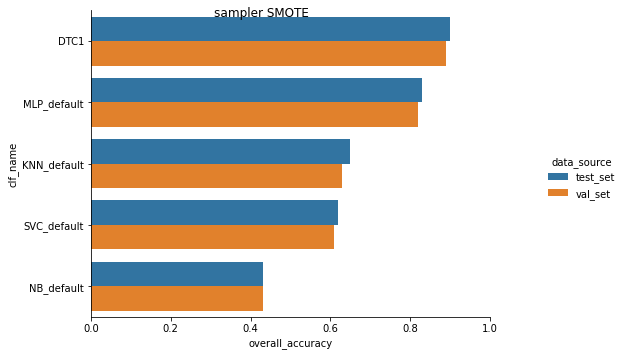

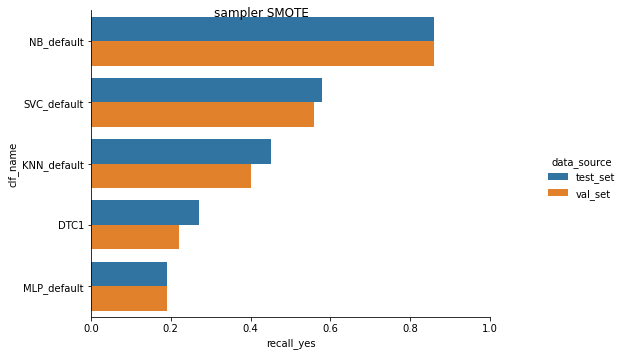

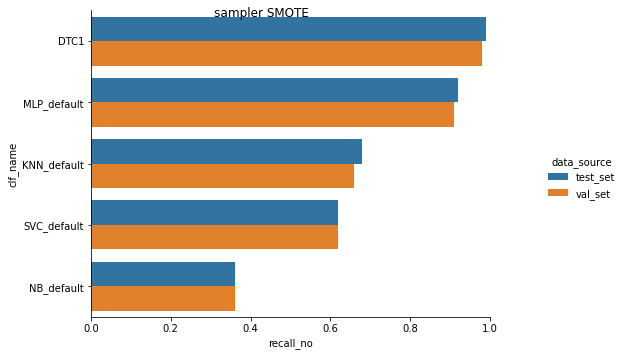

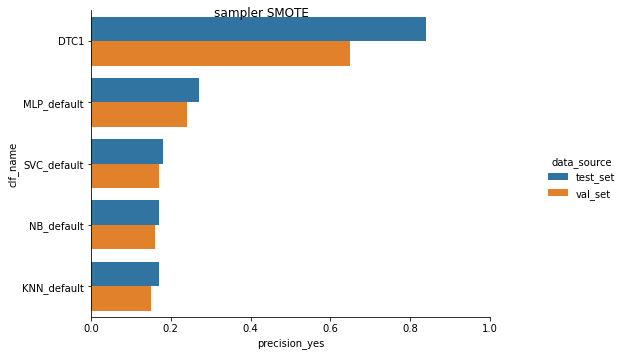

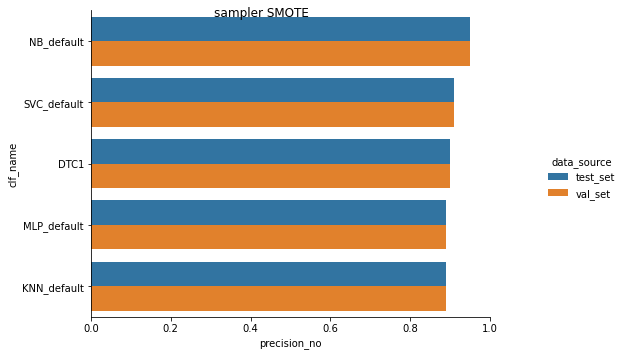

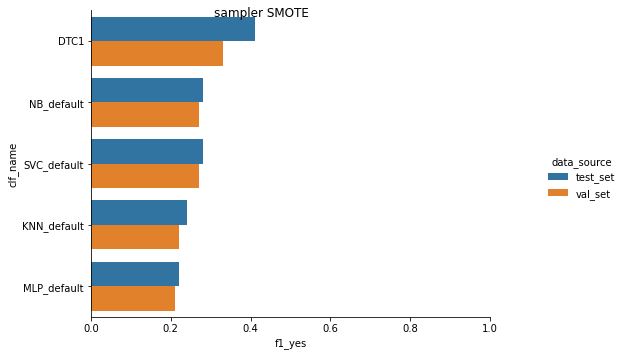

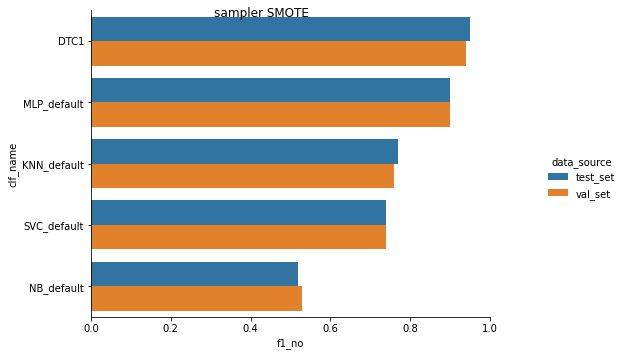

In [52]:
comp_name = 'data-source' 
print('Comparisons for df and sm:\n')
fun_split_val_test_comparison4('SMOTE',clf_name_df,sm_multi_clf_val_report_df,sm_multi_clf_test_report_df,'data_source')

Comparisons for df1 and sm:

overall_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0         DTC1             0.91            0.92
2  MLP_default             0.89            0.90
4  KNN_default             0.66            0.66
3  SVC_default             0.59            0.59
1   NB_default             0.36            0.38 

recall_yes from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
1   NB_default             0.90            0.89
3  SVC_default             0.63            0.54
4  KNN_default             0.36            0.30
0         DTC1             0.27            0.24
2  MLP_default             0.01            0.03 

recall_no from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0         DTC1             0.99            0.99
2  MLP_default             0.99            0.99
4  KNN_default             0.69            0.69
3  SVC_default         

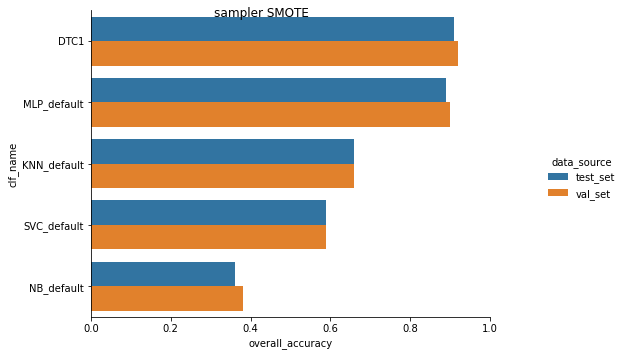

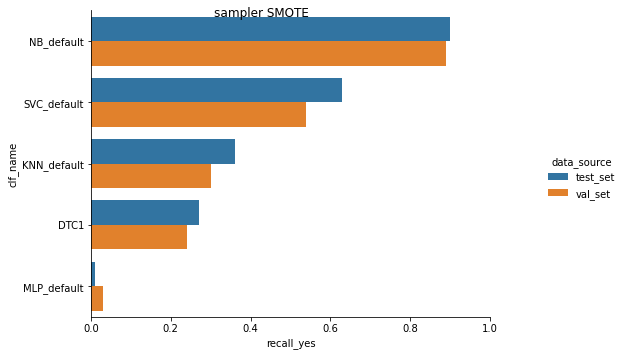

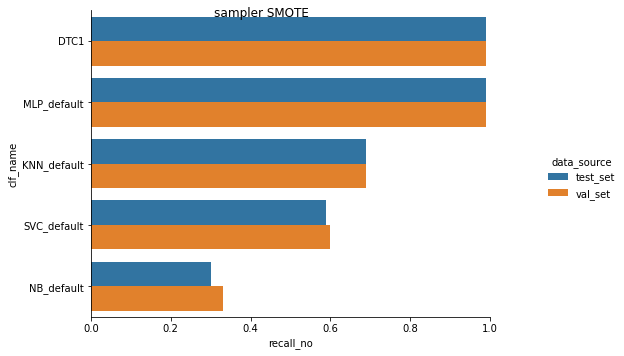

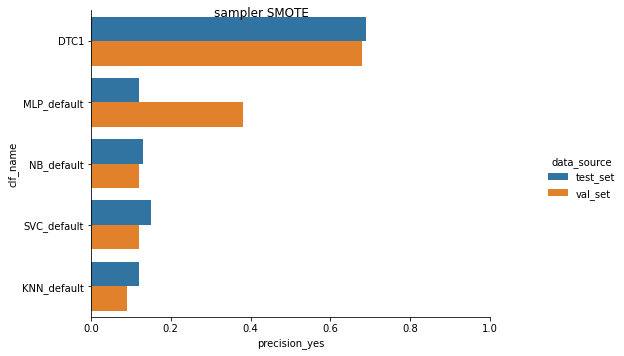

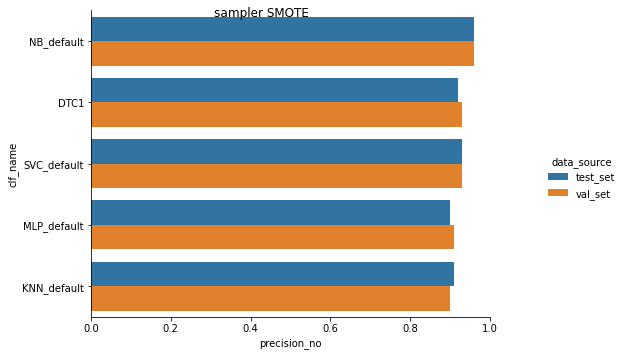

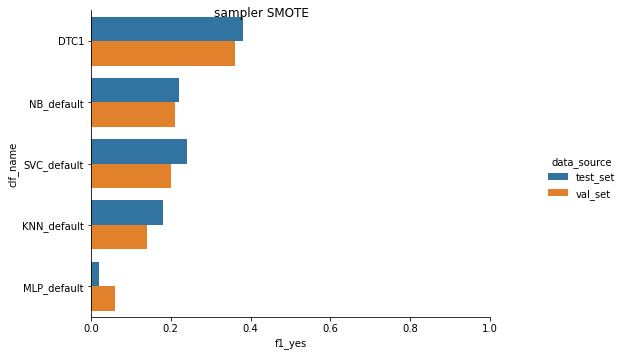

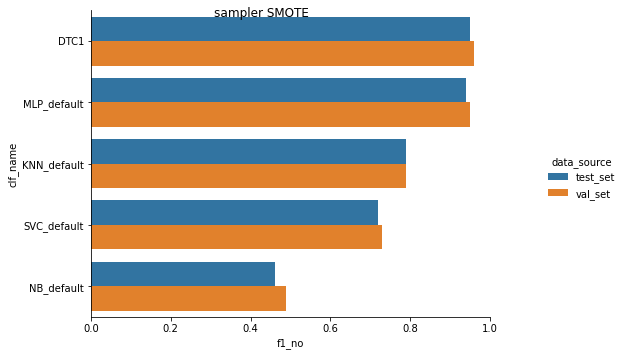

In [53]:
print('Comparisons for df1 and sm:\n')
fun_split_val_test_comparison4('SMOTE',clf_name_df,sm_multi_clf_val_report_df1,sm_multi_clf_test_report_df1,'data_source')

Comparisons for df2 and smk3:

overall_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
2  MLP_default             0.94            0.92
0         DTC1             0.93            0.93
4  KNN_default             0.77            0.76
3  SVC_default             0.63            0.62
1   NB_default             0.27            0.27 

recall_yes from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
1   NB_default             0.94            0.92
3  SVC_default             0.68            0.60
0         DTC1             0.37            0.29
2  MLP_default             0.29            0.16
4  KNN_default             0.21            0.19 

recall_no from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
2  MLP_default             0.96            0.95
0         DTC1             0.95            0.96
4  KNN_default             0.79            0.78
3  SVC_default       

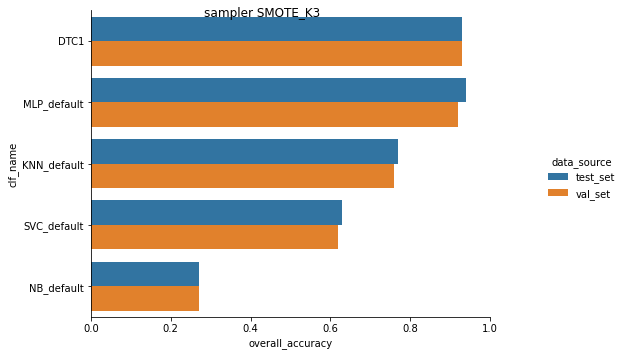

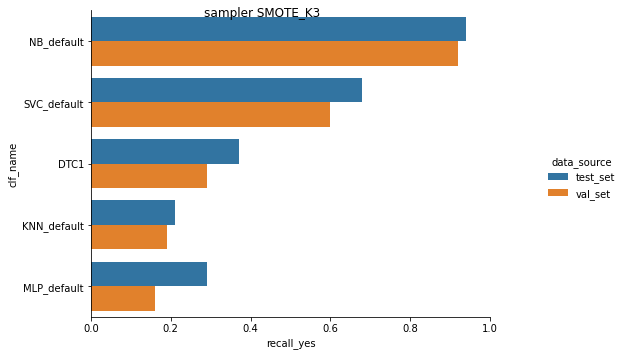

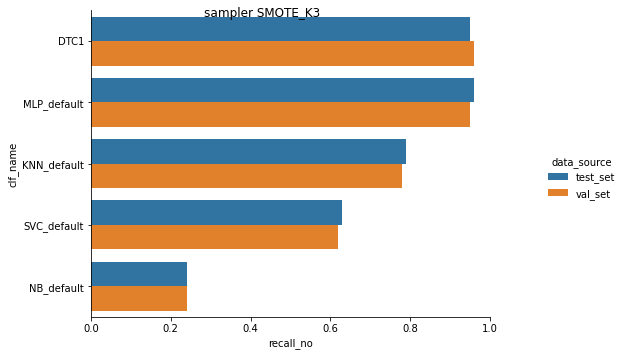

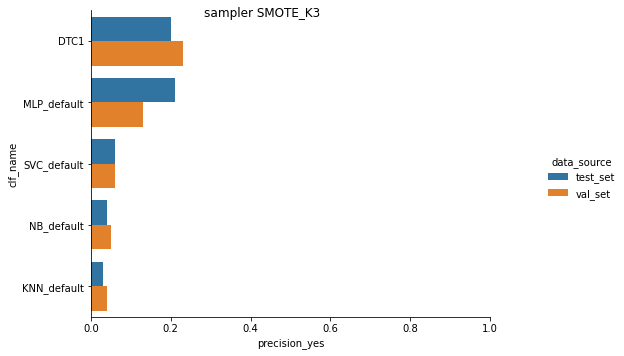

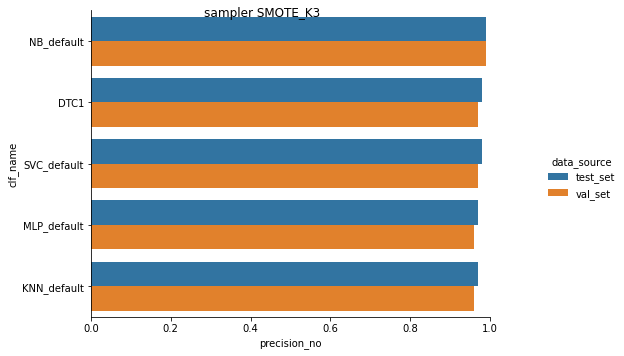

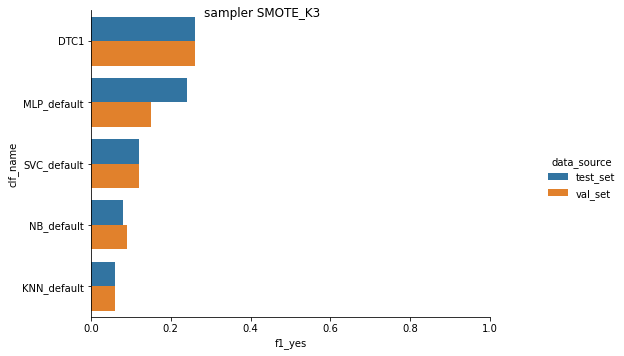

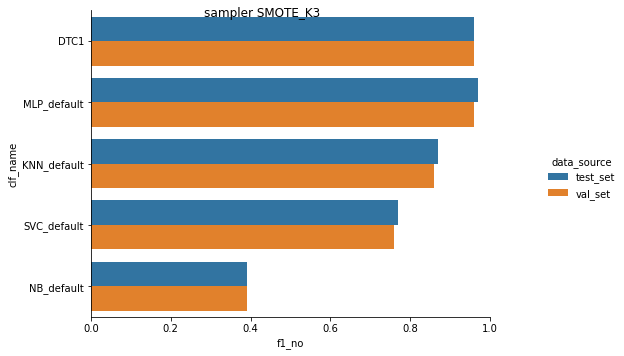

In [54]:
print('Comparisons for df2 and smk3:\n')
fun_split_val_test_comparison4('SMOTE_K3',clf_name_df,smk3_multi_clf_val_report_df2,smk3_multi_clf_test_report_df2,'data_source')

In [55]:
# define an "all tasks" function

def fun_split_val_multi_clf_all_tasks(sam_name,clf_list, clf_name_list,X_train,y_train,X_val,y_val,X_test,y_test,comp_name):
  # func for fitting multiple models on the train set, predicting on the validation and test sets, and reporting the results
  multi_clf_results_df = fun_split_val_multi_clf(clf_list, clf_name_list,X_train,y_train,X_val,y_val,X_test,y_test)

  # combine all the validation reports and combine the test reports for each classifier
  multi_clf_val_report_df, multi_clf_test_report_df = fun_multi_clf_reports(multi_clf_results_df)

  # get a list of the classifier names
  clf_name_df = multi_clf_test_report_df.clf_name[multi_clf_test_report_df['scorer'].str.match('precision')].reset_index(drop=True)

  # generate tables and graphs comparing validation and test performance
  fun_split_val_test_comparison4(sam_name,clf_name_df,multi_clf_val_report_df,multi_clf_test_report_df,comp_name)

# Check performance on different lists of classifiers
Now that we have all functions defined, we can see how different classifiers perform. We will test the classifiers grouped in lists earlier in the notebook.

**Logistic regression list**



overall_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
1   newton_l2             0.90            0.89
6      lib_l1             0.90            0.89
4      lib_l2             0.89            0.88
5  lib_lowerC             0.88            0.87
0    lbfgs_l2             0.82            0.81
2      sag_l2             0.60            0.59
3     saga_l2             0.60            0.59 

recall_yes from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
2      sag_l2             0.61            0.60
3     saga_l2             0.61            0.60
0    lbfgs_l2             0.39            0.33
5  lib_lowerC             0.33            0.26
4      lib_l2             0.29            0.23
1   newton_l2             0.28            0.21
6      lib_l1             0.28            0.21 

recall_no from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
1   newton_l2        

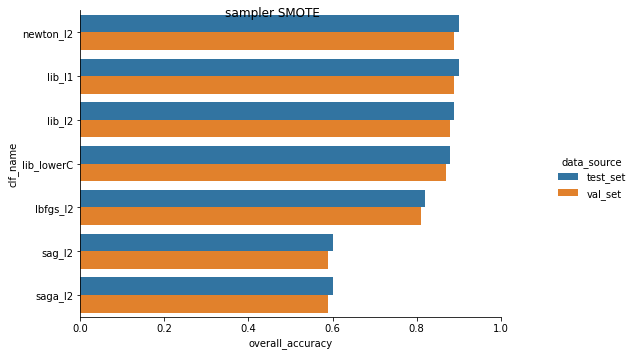

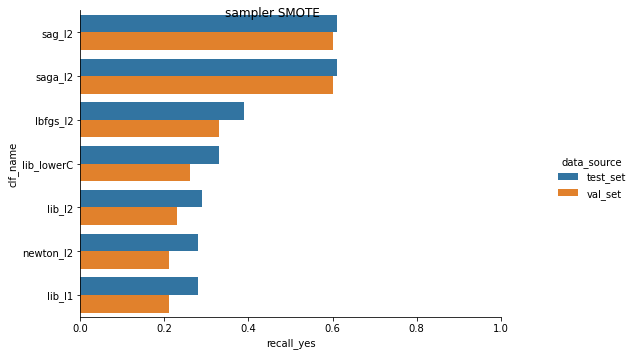

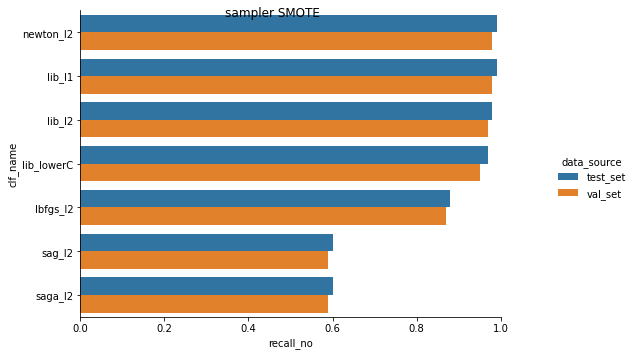

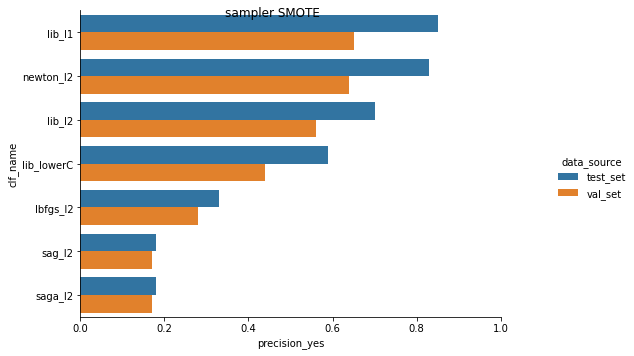

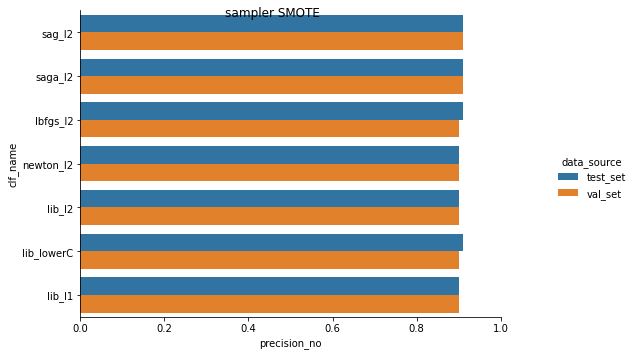

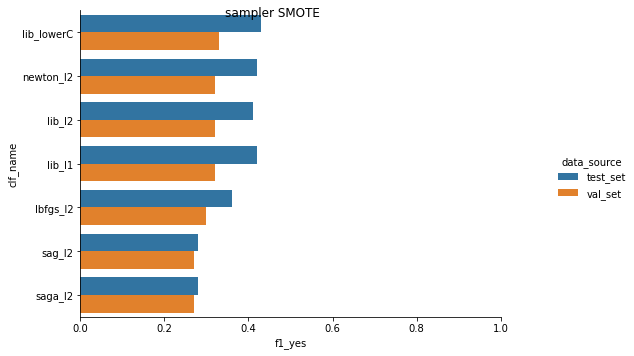

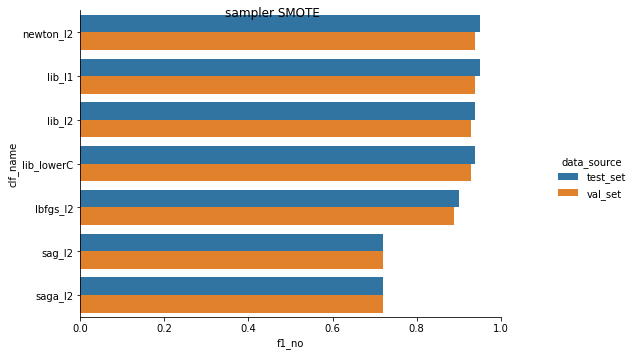

In [56]:
# logistic regression list on original df
fun_split_val_multi_clf_all_tasks('SMOTE',lr_list,lr_name_list,X_train_sm,y_train_sm,X_val,y_val,X_test,y_test,'data_source')

overall_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
1   newton_l2             0.91            0.92
6      lib_l1             0.91            0.92
4      lib_l2             0.90            0.91
5  lib_lowerC             0.90            0.91
0    lbfgs_l2             0.59            0.59
2      sag_l2             0.59            0.59
3     saga_l2             0.59            0.59 

recall_yes from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0    lbfgs_l2             0.64            0.55
2      sag_l2             0.64            0.55
3     saga_l2             0.64            0.55
1   newton_l2             0.24            0.23
5  lib_lowerC             0.24            0.22
6      lib_l1             0.23            0.23
4      lib_l2             0.22            0.22 

recall_no from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
1   newton_l2        

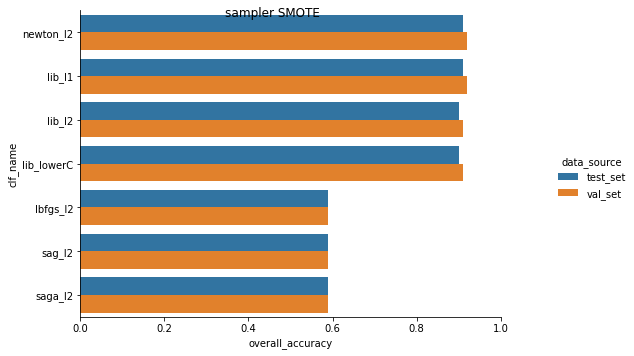

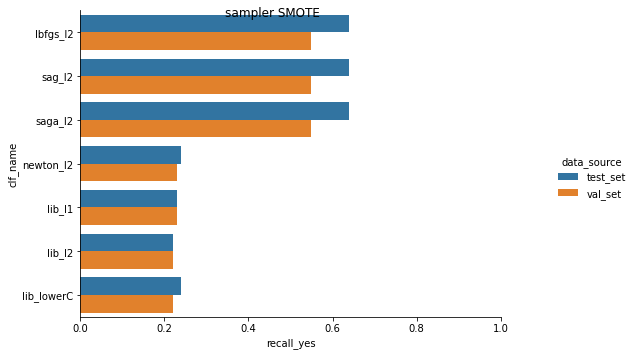

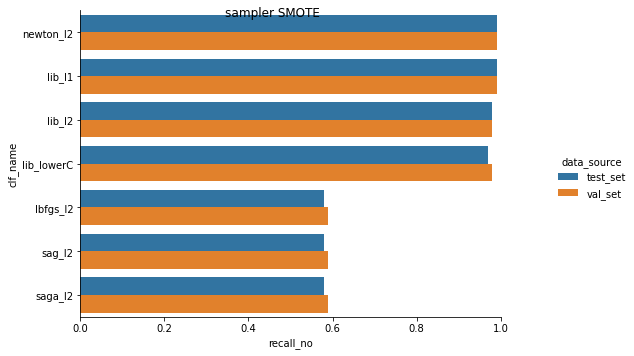

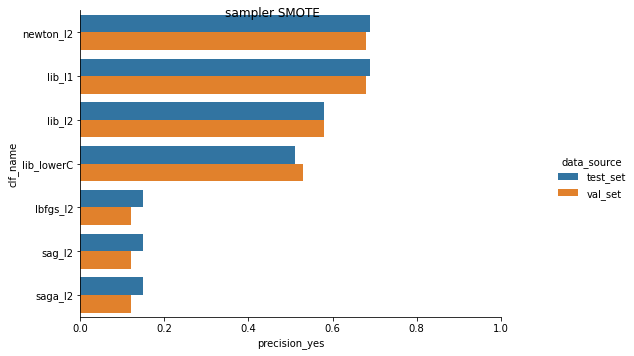

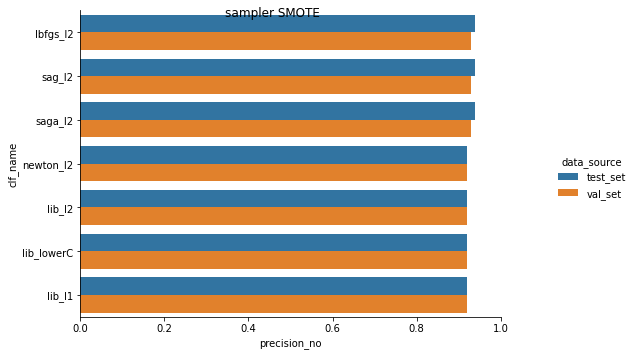

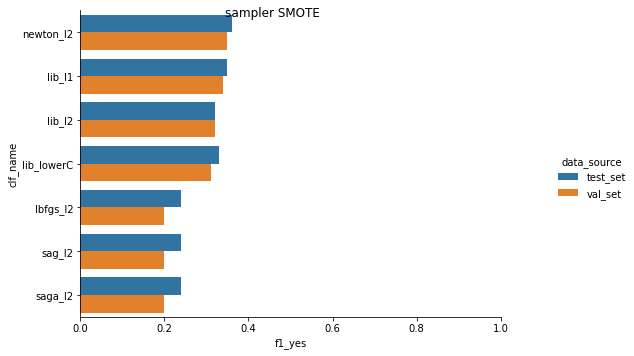

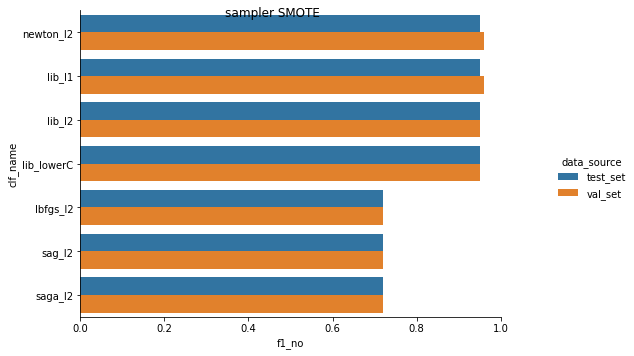

In [57]:
# Repeat it for CD_imb1
fun_split_val_multi_clf_all_tasks('SMOTE',lr_list,lr_name_list,X_train1_sm,y_train1_sm,X_val1,y_val1,X_test1,y_test1,'data_source')

overall_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
1   newton_l2             0.96            0.96
4      lib_l2             0.96            0.96
5  lib_lowerC             0.96            0.96
6      lib_l1             0.96            0.96
0    lbfgs_l2             0.60            0.58
2      sag_l2             0.60            0.58
3     saga_l2             0.60            0.58 

recall_yes from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0    lbfgs_l2             0.70            0.59
2      sag_l2             0.70            0.59
3     saga_l2             0.70            0.59
5  lib_lowerC             0.16            0.11
6      lib_l1             0.10            0.08
1   newton_l2             0.08            0.07
4      lib_l2             0.06            0.08 

recall_no from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
6      lib_l1        

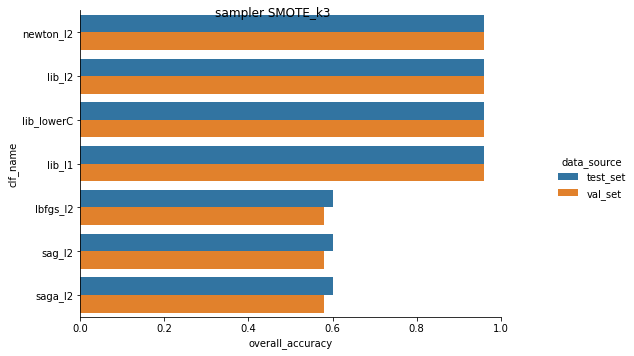

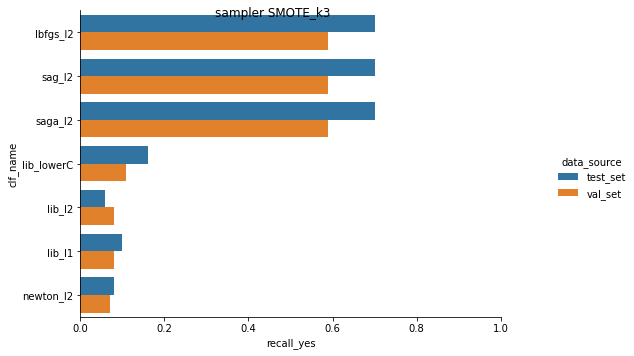

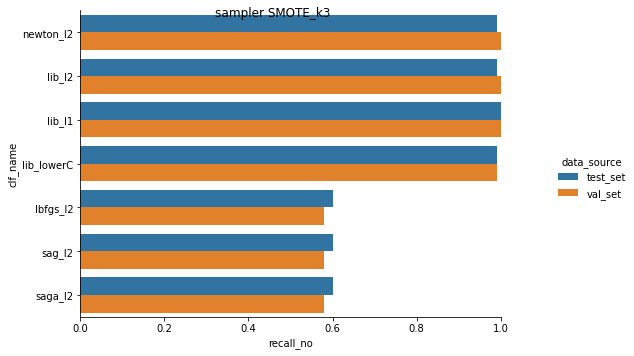

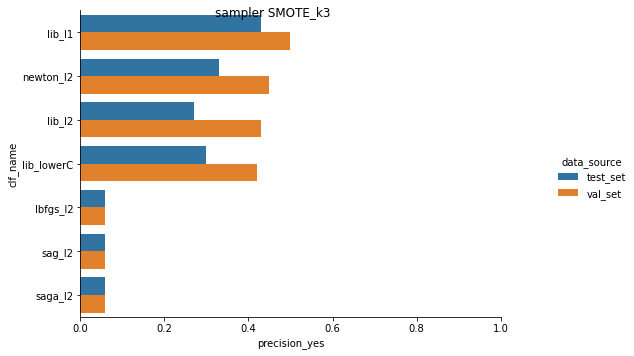

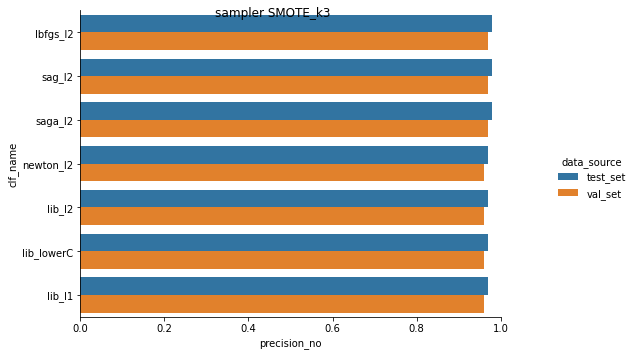

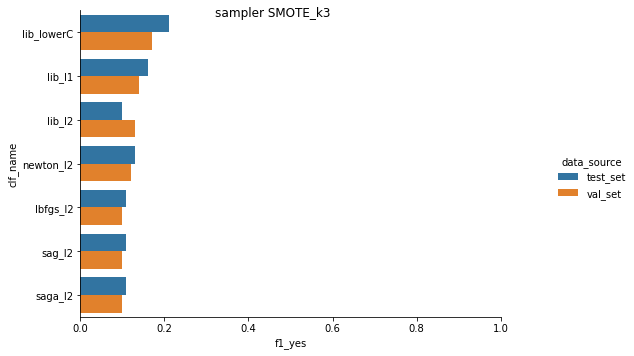

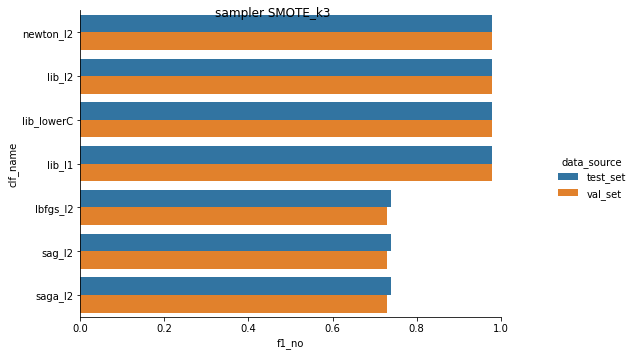

In [58]:
# Repeat it for df2
fun_split_val_multi_clf_all_tasks('SMOTE_k3',lr_list,lr_name_list,X_train2_smk3,y_train2_smk3,X_val2,y_val2,X_test2,y_test2,'data_source')

**Bagging list**

overall_accuracy from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0  Bagging_default             0.88            0.88
1       Bagging_20             0.88            0.88
3       Bagging_lr             0.79            0.77
2      Bagging_SVC             0.63            0.63 

recall_yes from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
2      Bagging_SVC             0.57            0.54
3       Bagging_lr             0.48            0.42
1       Bagging_20             0.27            0.23
0  Bagging_default             0.26            0.24 

recall_no from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0  Bagging_default             0.97            0.97
1       Bagging_20             0.97            0.97
3       Bagging_lr             0.84            0.82
2      Bagging_SVC             0.64            0.64 

precision_yes from test (left) and fro

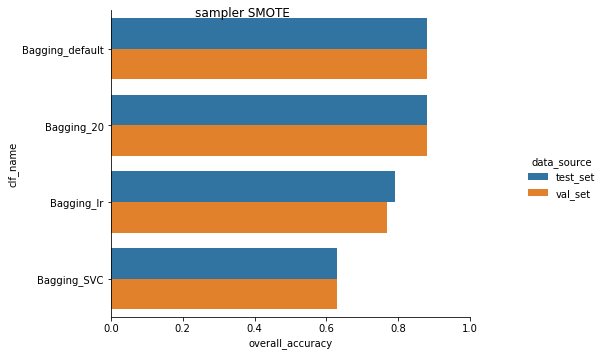

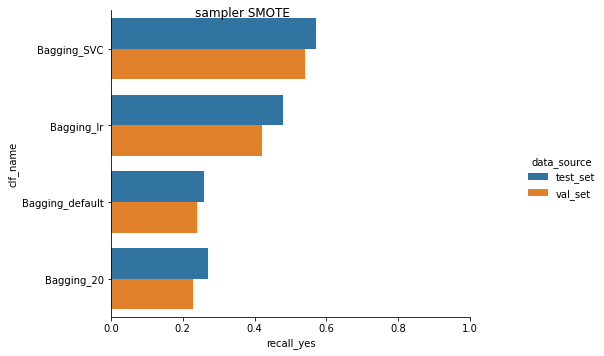

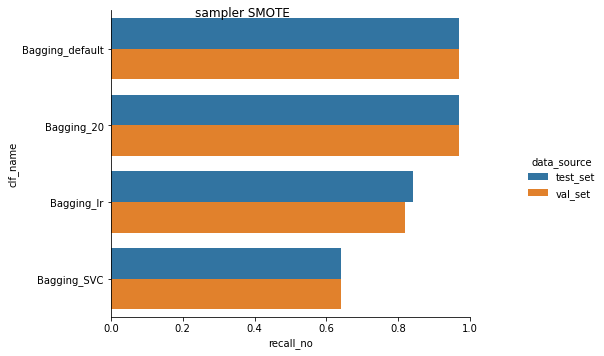

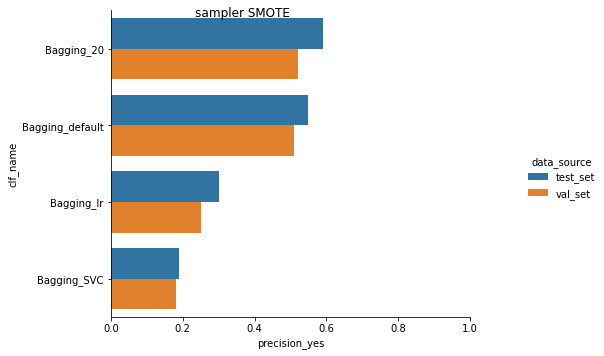

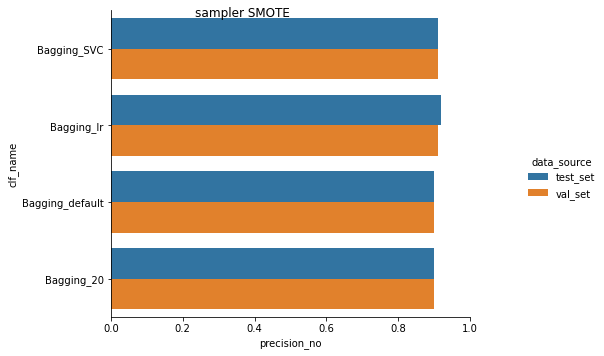

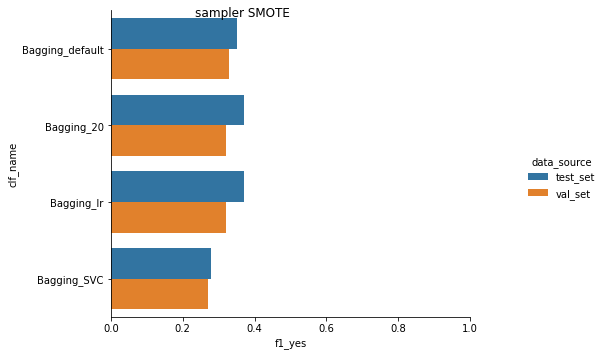

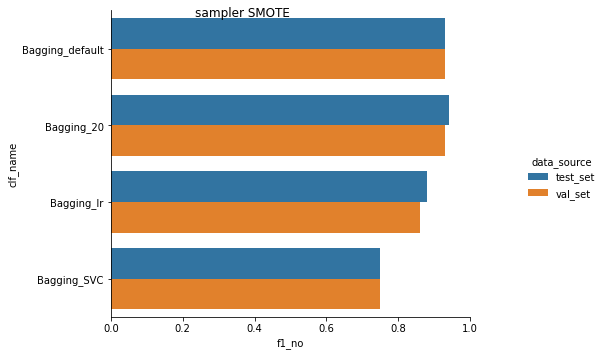

In [59]:
# bagging list on original df
fun_split_val_multi_clf_all_tasks('SMOTE',bag_list,bag_name_list,X_train_sm,y_train_sm,X_val,y_val,X_test,y_test,'data_source')

overall_accuracy from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
1       Bagging_20             0.91            0.90
0  Bagging_default             0.90            0.90
3       Bagging_lr             0.82            0.83
2      Bagging_SVC             0.59            0.59 

recall_yes from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
2      Bagging_SVC             0.63            0.54
3       Bagging_lr             0.36            0.34
0  Bagging_default             0.28            0.20
1       Bagging_20             0.28            0.20 

recall_no from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0  Bagging_default             0.98            0.97
1       Bagging_20             0.98            0.98
3       Bagging_lr             0.88            0.88
2      Bagging_SVC             0.59            0.60 

precision_yes from test (left) and fro

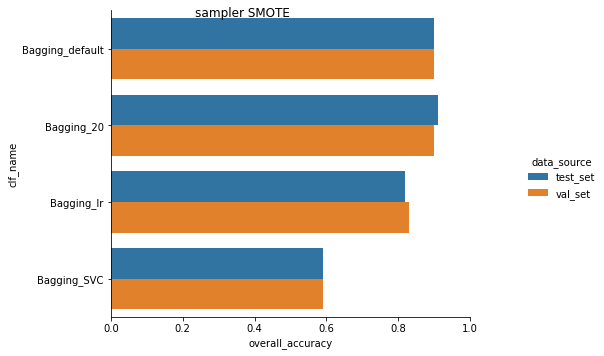

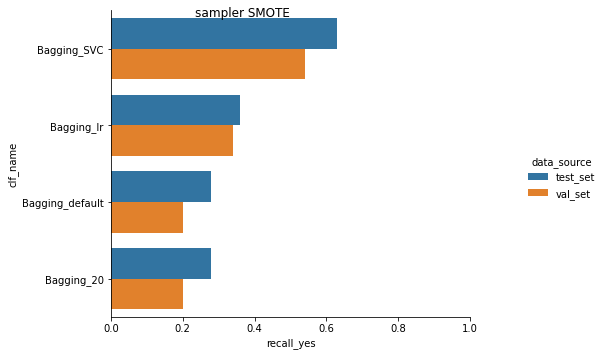

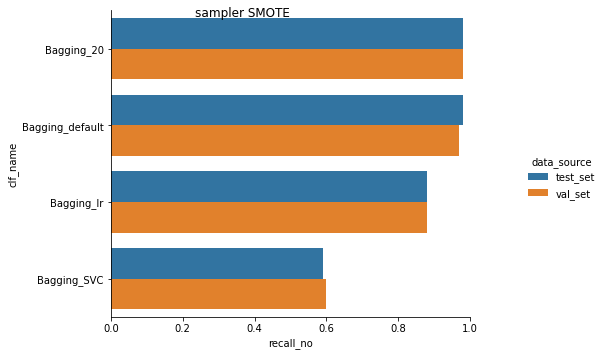

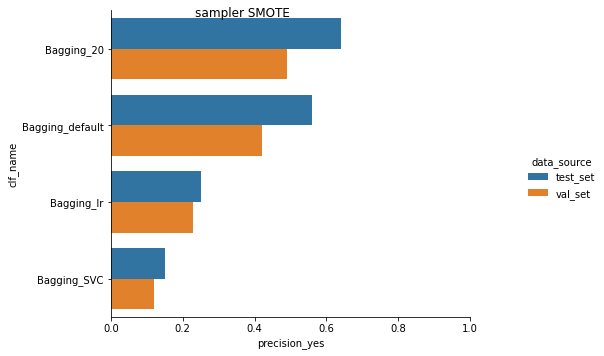

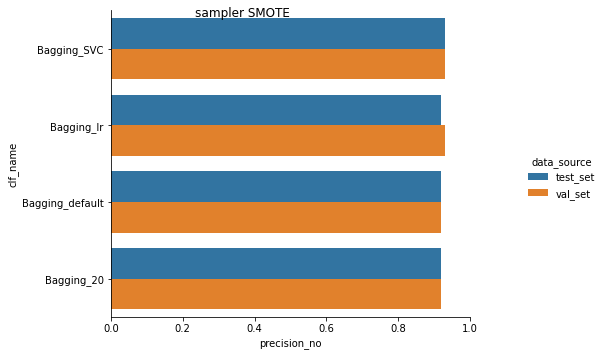

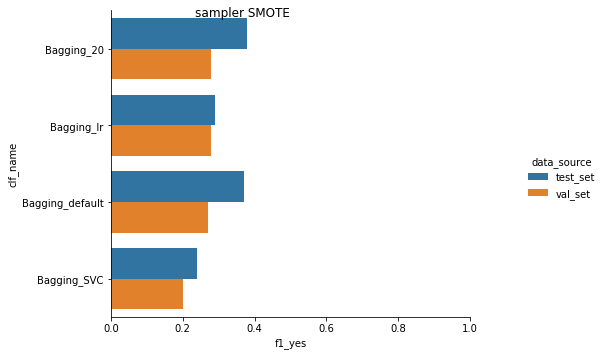

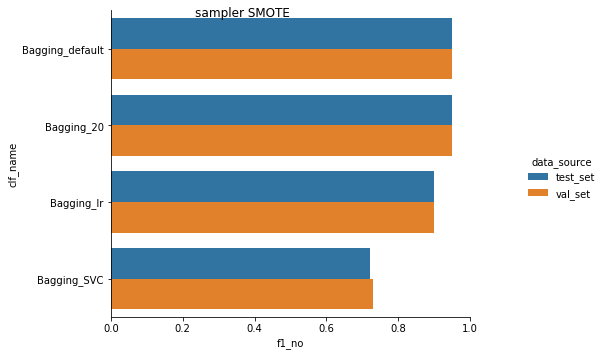

In [60]:
# bagging list on df1
fun_split_val_multi_clf_all_tasks('SMOTE',bag_list,bag_name_list,X_train1_sm,y_train1_sm,X_val1,y_val1,X_test1,y_test1,'data_source')

overall_accuracy from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0  Bagging_default             0.96            0.96
1       Bagging_20             0.96            0.95
3       Bagging_lr             0.88            0.86
2      Bagging_SVC             0.64            0.62 

recall_yes from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
2      Bagging_SVC             0.68            0.61
3       Bagging_lr             0.54            0.28
1       Bagging_20             0.24            0.16
0  Bagging_default             0.19            0.13 

recall_no from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0  Bagging_default             0.99            0.99
1       Bagging_20             0.99            0.99
3       Bagging_lr             0.89            0.88
2      Bagging_SVC             0.64            0.62 

precision_yes from test (left) and fro

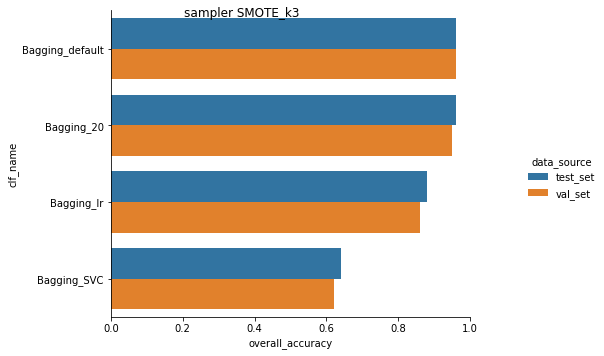

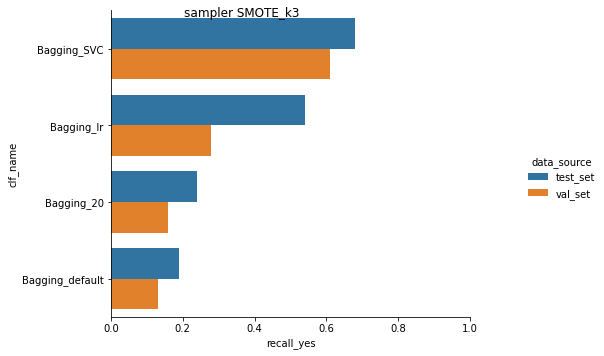

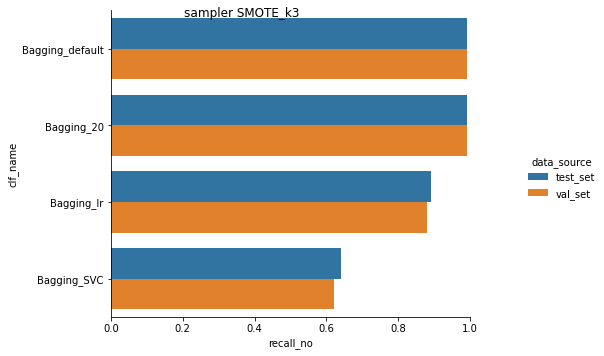

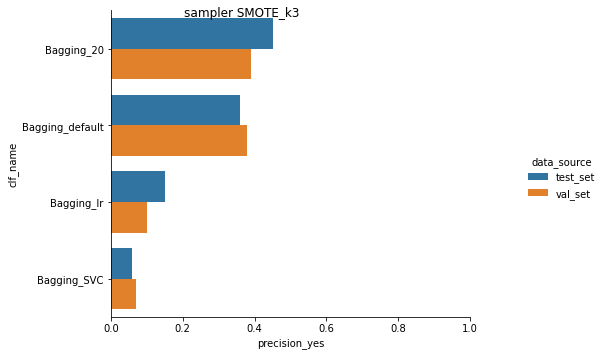

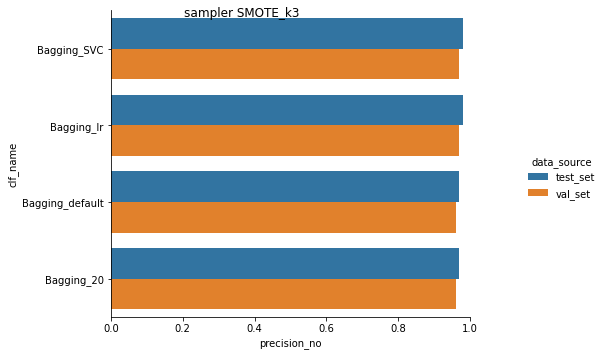

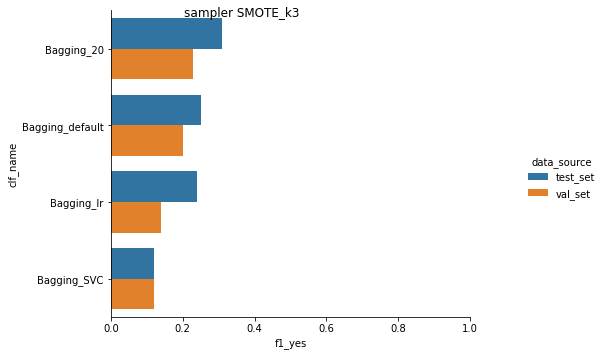

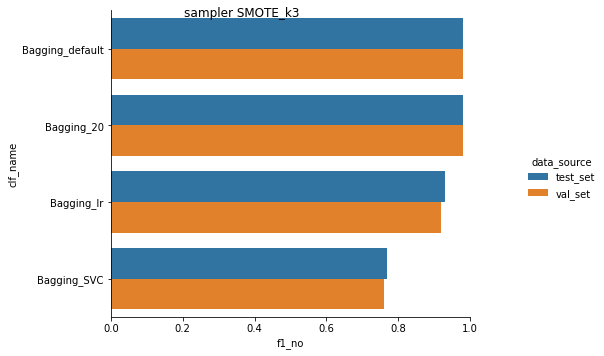

In [61]:
# bagging list on df2
fun_split_val_multi_clf_all_tasks('SMOTE_k3',bag_list,bag_name_list,X_train2_smk3,y_train2_smk3,X_val2,y_val2,X_test2,y_test2,'data_source')

**Boosting list**

overall_accuracy from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
1     Ada_dt_halflearning             0.90            0.88
0             Ada_default             0.89            0.88
2               Ada_lr_15             0.79            0.77
3  Ada_lr_15_halflearning             0.67            0.66 

recall_yes from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
3  Ada_lr_15_halflearning             0.59            0.54
2               Ada_lr_15             0.48            0.42
1     Ada_dt_halflearning             0.31            0.22
0             Ada_default             0.27            0.21 

recall_no from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0             Ada_default             0.98            0.98
1     Ada_dt_halflearning             0.98            0.98
2               Ada_lr_15             0.83           

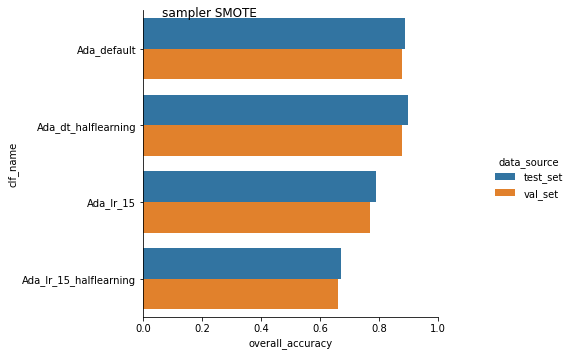

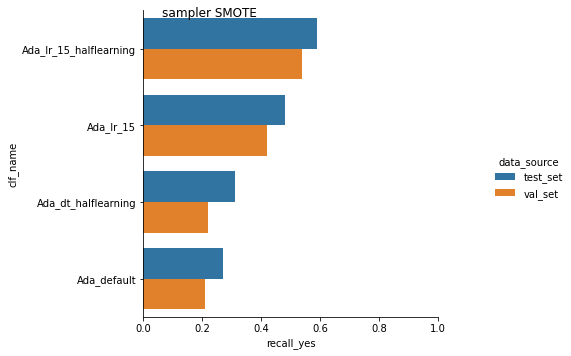

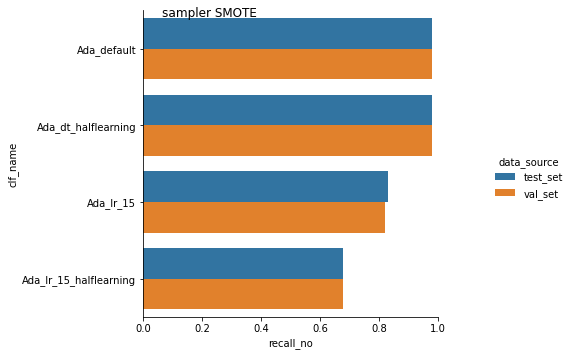

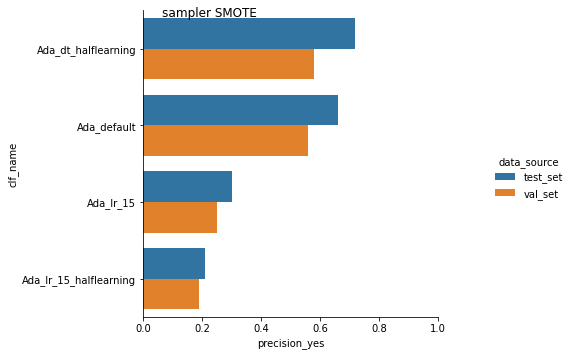

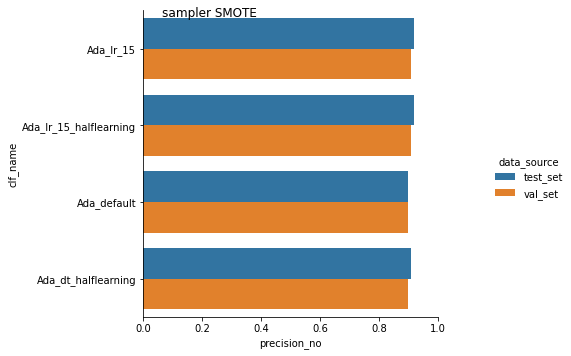

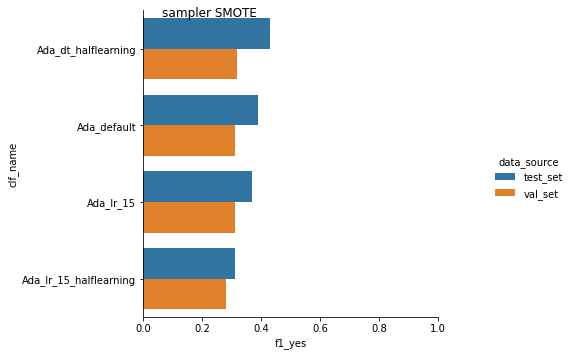

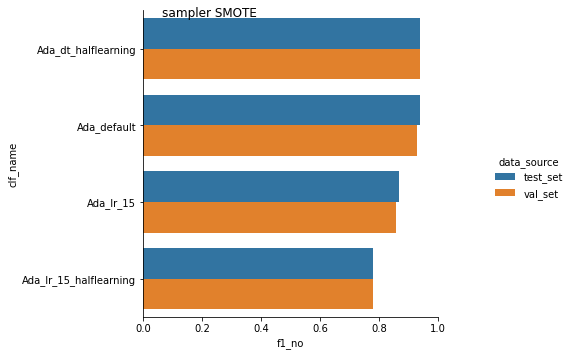

In [62]:
# boosting list on original df
fun_split_val_multi_clf_all_tasks('SMOTE',boost_list,boost_name_list,X_train_sm,y_train_sm,X_val,y_val,X_test,y_test,'data_source')

overall_accuracy from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0             Ada_default             0.96            0.95
1     Ada_dt_halflearning             0.95            0.95
2               Ada_lr_15             0.87            0.86
3  Ada_lr_15_halflearning             0.71            0.71 

recall_yes from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
3  Ada_lr_15_halflearning             0.65            0.55
2               Ada_lr_15             0.54            0.31
0             Ada_default             0.22            0.13
1     Ada_dt_halflearning             0.22            0.17 

recall_no from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0             Ada_default             0.99            0.99
1     Ada_dt_halflearning             0.98            0.98
2               Ada_lr_15             0.88           

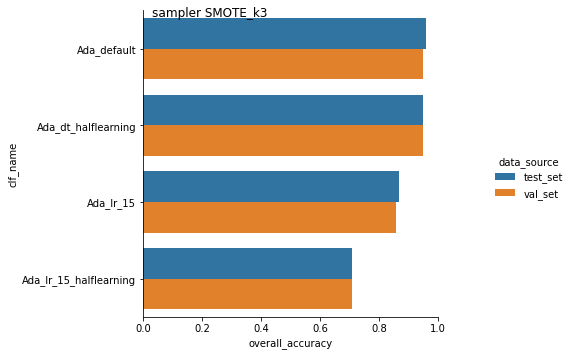

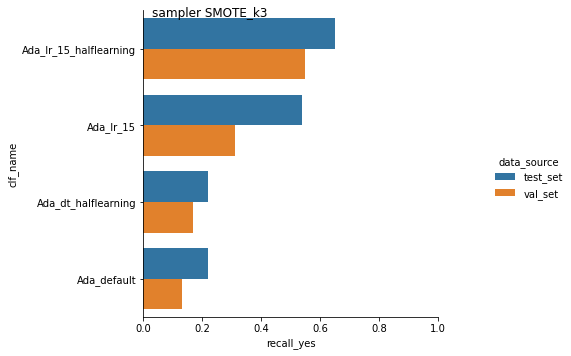

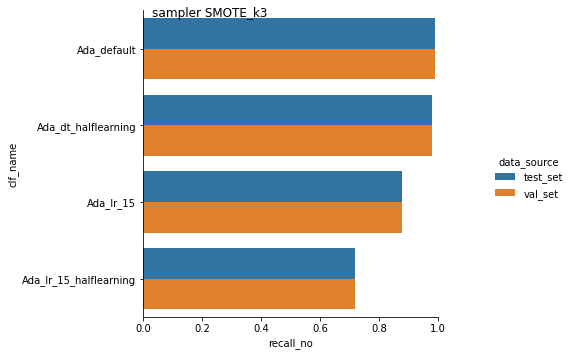

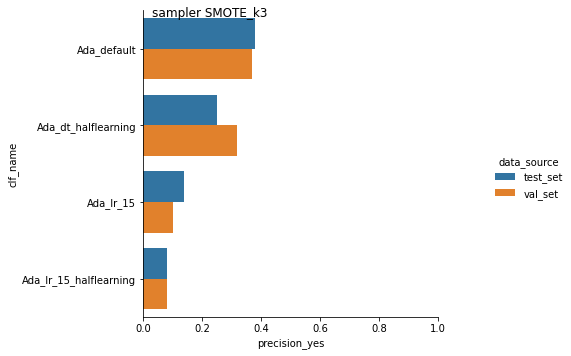

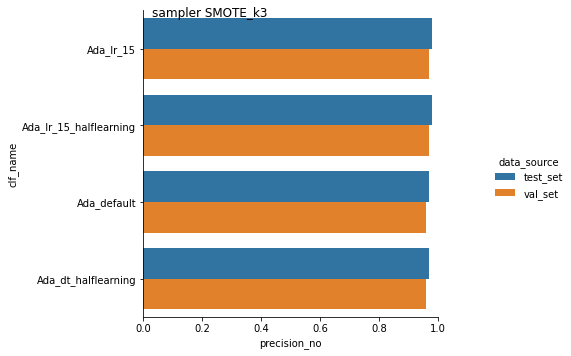

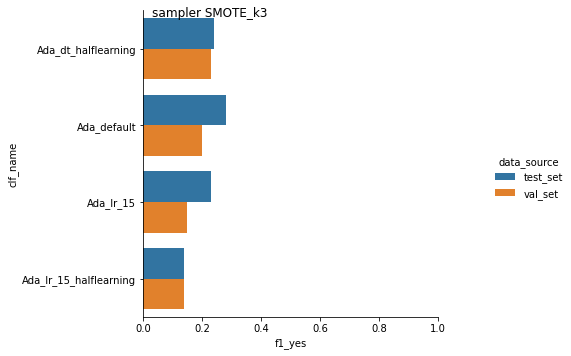

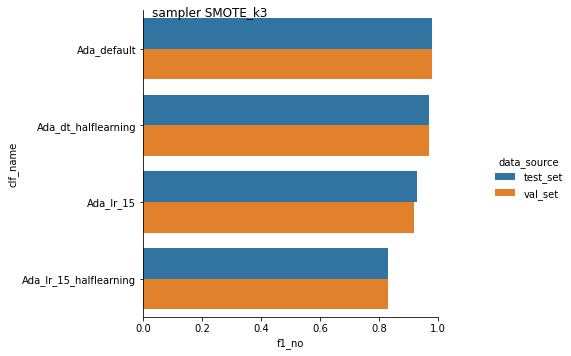

In [63]:
# boosting list on df1
fun_split_val_multi_clf_all_tasks('SMOTE_k3',boost_list,boost_name_list,X_train2_smk3,y_train2_smk3,X_val2,y_val2,X_test2,y_test2,'data_source')

overall_accuracy from test (left) and from validation (right)

             clf_name  test_set_result  val_set_result
0          rf_default             0.89            0.89
1  rf_entropy_default             0.89            0.88
2               rf_50             0.89            0.88
3       rf_entropy_50             0.89            0.88
4             rf_max7             0.89            0.87
5     rf_entropy_max7             0.89            0.88 

recall_yes from test (left) and from validation (right)

             clf_name  test_set_result  val_set_result
4             rf_max7             0.29            0.26
5     rf_entropy_max7             0.29            0.25
1  rf_entropy_default             0.28            0.23
3       rf_entropy_50             0.28            0.23
0          rf_default             0.27            0.24
2               rf_50             0.27            0.22 

recall_no from test (left) and from validation (right)

             clf_name  test_set_result  val_set_re

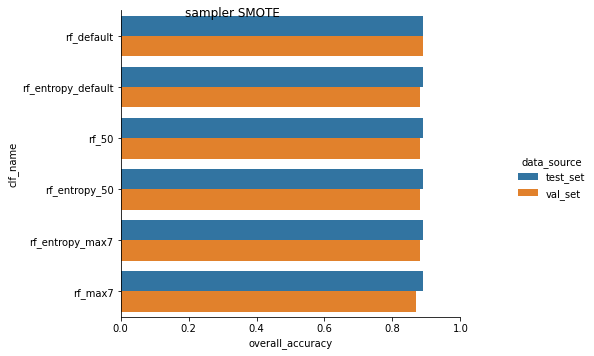

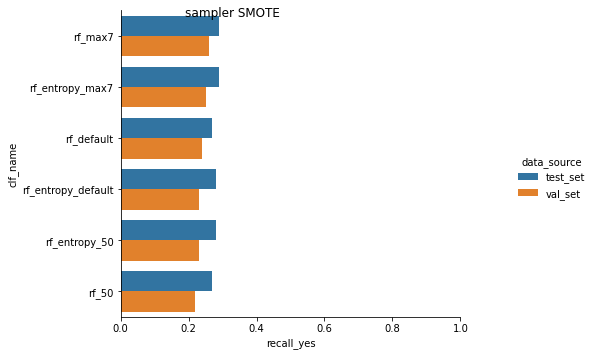

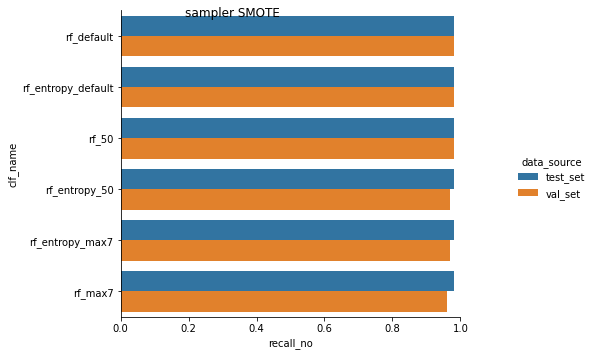

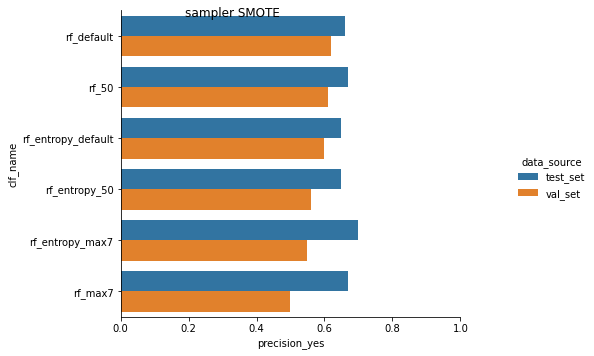

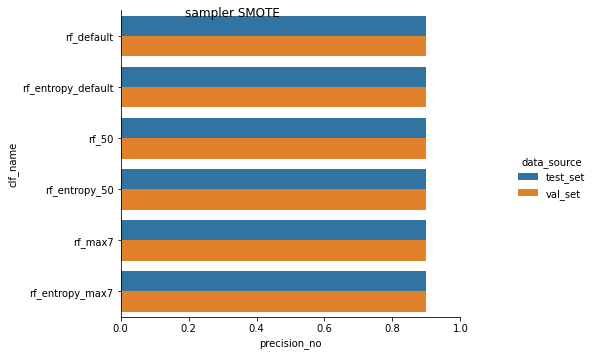

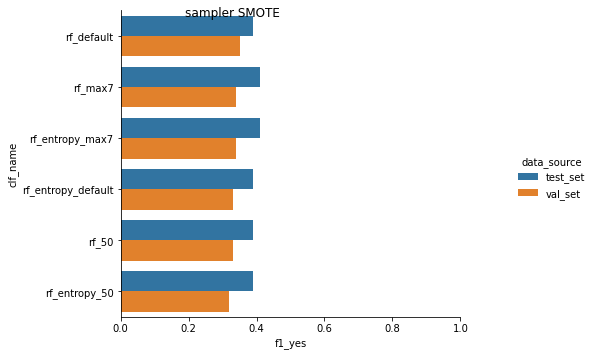

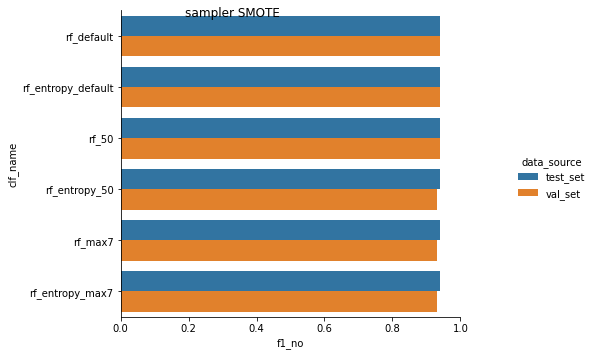

In [64]:
# boosting list on df2
fun_split_val_multi_clf_all_tasks('SMOTE',rf_list,rf_name_list,X_train_sm,y_train_sm,X_val,y_val,X_test,y_test,'data_source')

**Random forest list**

overall_accuracy from test (left) and from validation (right)

             clf_name  test_set_result  val_set_result
0          rf_default             0.89            0.89
1  rf_entropy_default             0.89            0.88
2               rf_50             0.89            0.88
3       rf_entropy_50             0.89            0.88
4             rf_max7             0.89            0.87
5     rf_entropy_max7             0.89            0.88 

recall_yes from test (left) and from validation (right)

             clf_name  test_set_result  val_set_result
4             rf_max7             0.29            0.26
5     rf_entropy_max7             0.29            0.25
1  rf_entropy_default             0.28            0.23
3       rf_entropy_50             0.28            0.23
0          rf_default             0.27            0.24
2               rf_50             0.27            0.22 

recall_no from test (left) and from validation (right)

             clf_name  test_set_result  val_set_re

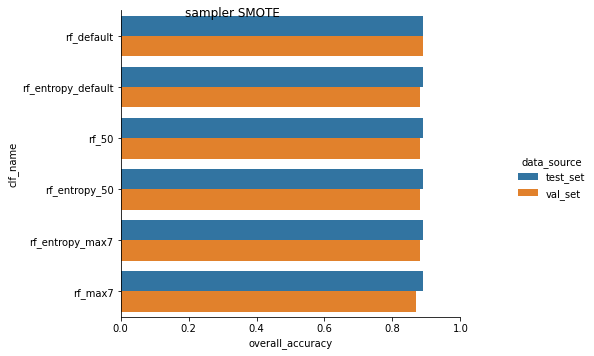

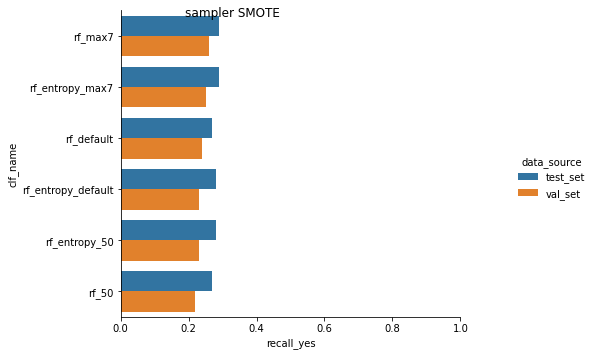

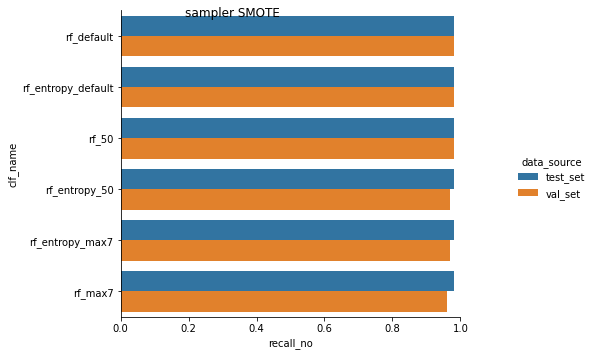

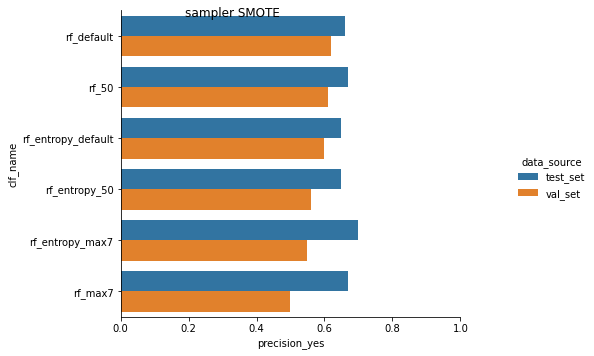

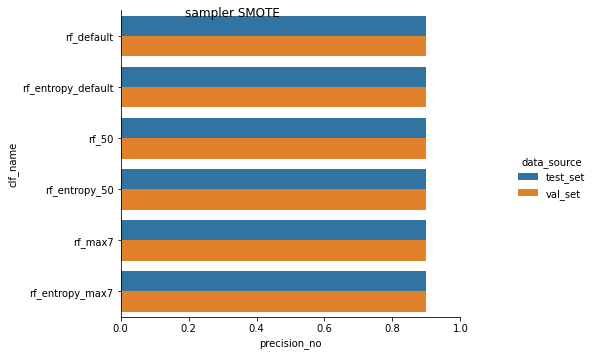

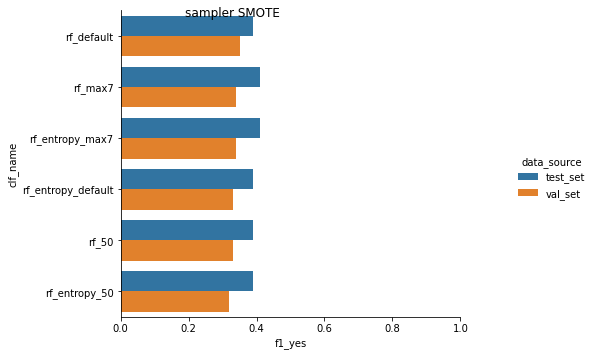

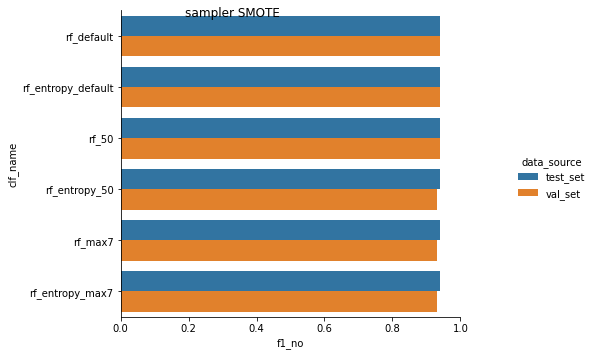

In [65]:
# logistic regression list original df
fun_split_val_multi_clf_all_tasks('SMOTE',rf_list,rf_name_list,X_train_sm,y_train_sm,X_val,y_val,X_test,y_test,'data_source')

overall_accuracy from test (left) and from validation (right)

             clf_name  test_set_result  val_set_result
1  rf_entropy_default             0.92            0.91
3       rf_entropy_50             0.92            0.91
0          rf_default             0.91            0.91
2               rf_50             0.91            0.91
4             rf_max7             0.91            0.91
5     rf_entropy_max7             0.91            0.91 

recall_yes from test (left) and from validation (right)

             clf_name  test_set_result  val_set_result
4             rf_max7             0.28            0.24
5     rf_entropy_max7             0.28            0.24
1  rf_entropy_default             0.27            0.22
0          rf_default             0.26            0.23
3       rf_entropy_50             0.26            0.22
2               rf_50             0.24            0.23 

recall_no from test (left) and from validation (right)

             clf_name  test_set_result  val_set_re

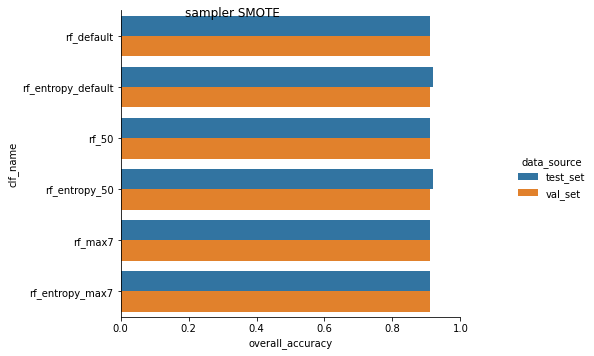

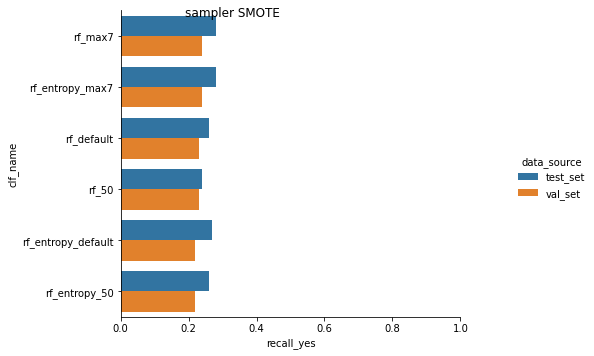

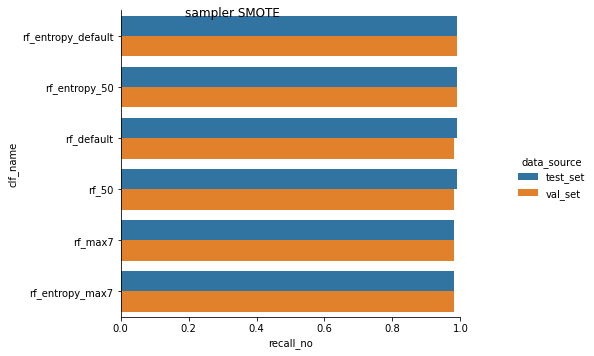

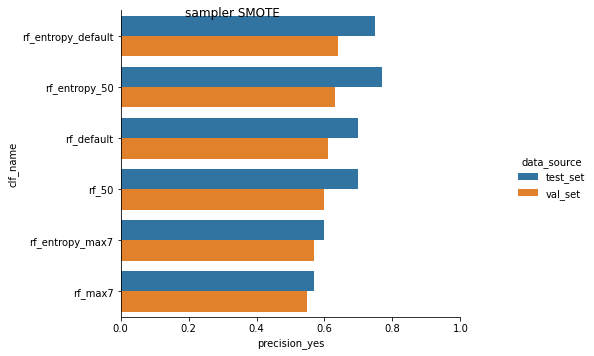

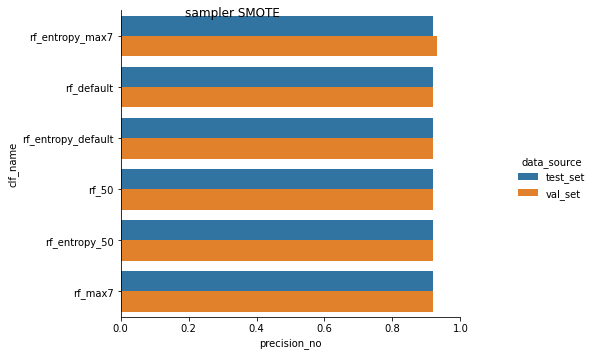

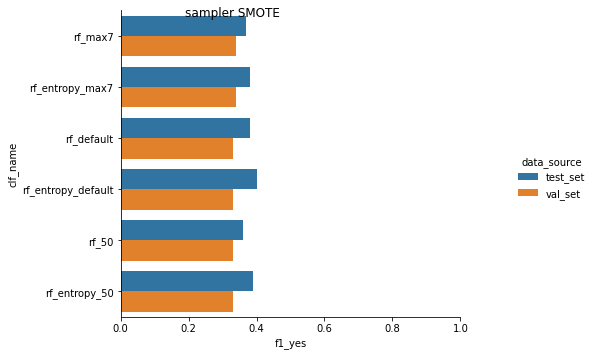

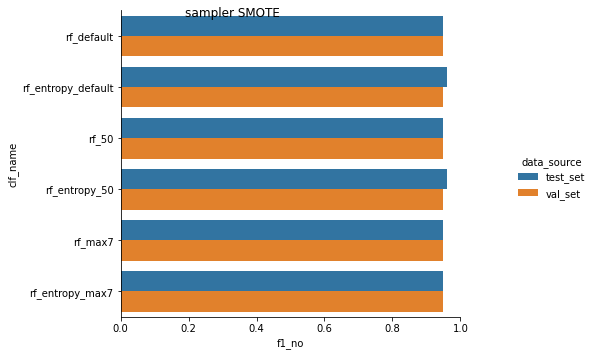

In [66]:
# logistic regression list on df1
fun_split_val_multi_clf_all_tasks('SMOTE',rf_list,rf_name_list,X_train1_sm,y_train1_sm,X_val1,y_val1,X_test1,y_test1,'data_source')

overall_accuracy from test (left) and from validation (right)

             clf_name  test_set_result  val_set_result
0          rf_default             0.97            0.96
1  rf_entropy_default             0.97            0.96
2               rf_50             0.97            0.96
3       rf_entropy_50             0.97            0.96
4             rf_max7             0.96            0.95
5     rf_entropy_max7             0.96            0.96 

recall_yes from test (left) and from validation (right)

             clf_name  test_set_result  val_set_result
5     rf_entropy_max7             0.30            0.19
4             rf_max7             0.27            0.15
2               rf_50             0.17            0.13
3       rf_entropy_50             0.17            0.11
0          rf_default             0.16            0.11
1  rf_entropy_default             0.16            0.11 

recall_no from test (left) and from validation (right)

             clf_name  test_set_result  val_set_re

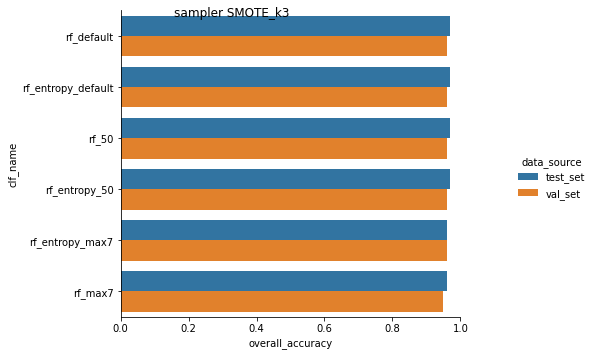

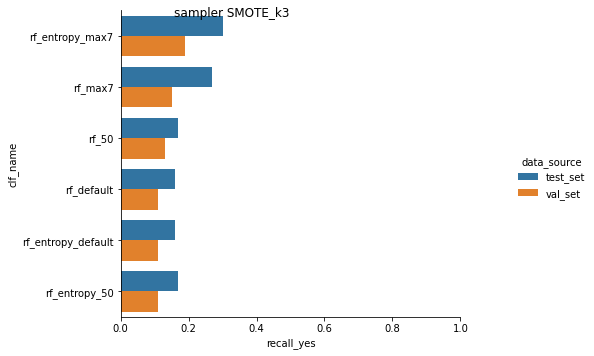

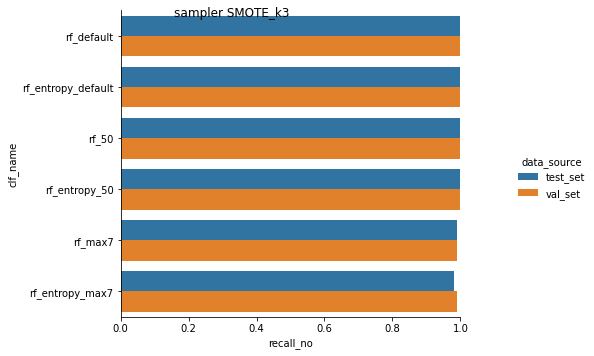

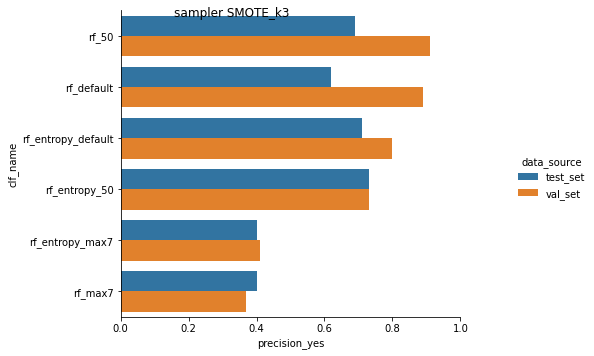

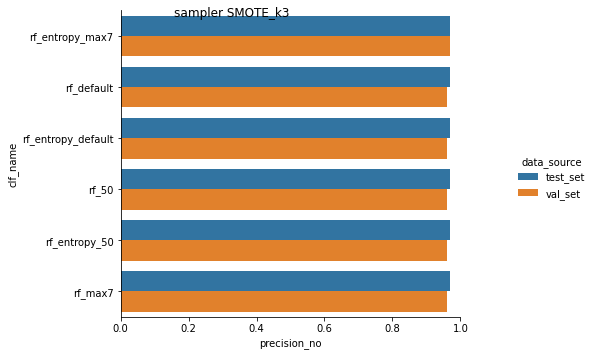

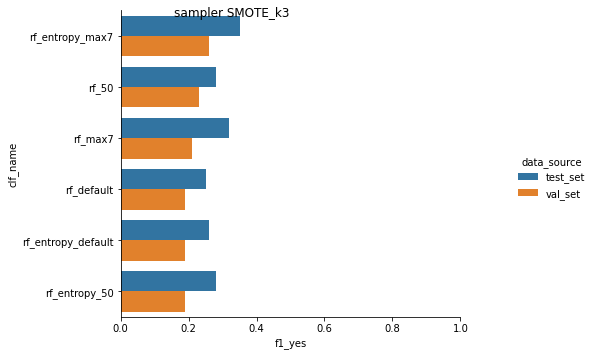

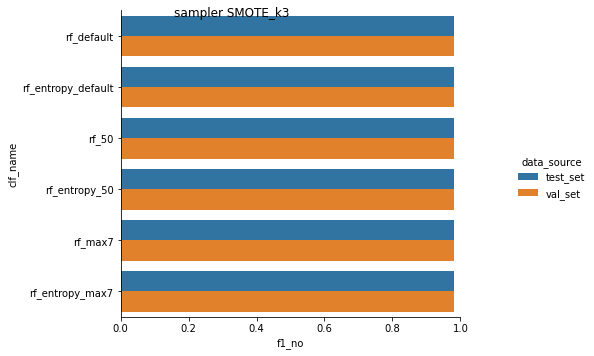

In [67]:
# logistic regression list on df2
fun_split_val_multi_clf_all_tasks('SMOTE_k3',rf_list,rf_name_list,X_train2_smk3,y_train2_smk3,X_val2,y_val2,X_test2,y_test2,'data_source')

# Evaluate different sampling strategies  
We can now run the "all tasks" function for multiple oversampling objects, undersampling objects, and objects that combine the two sampling strategies. 

In [68]:
# create a new version of the "all tasks" function that evaluates different resampling techniques
def fun_multi_clf_sampler_all_tasks(sampler_list,sampler_name_list,clf_list, clf_name_list,X_train,y_train,X_val, y_val,X_test,y_test,comp_name):
  for i in range(0, len(sampler_list)):
    # assign each sampler, and its name to a variable
    sam = sampler_list[i]
    sam_name = sampler_name_list[i]

    # perform the resampling on the training set 
    X_train_sam, y_train_sam = sam.fit_resample(X_train, y_train)

    # display the value counts after resampling
    print('Sampler: ',sam,'\n')
    print('y value counts of resampled train set\n',pd.Series(y_train_sam).value_counts(),'\n')

    # func for fitting multiple models on the train set, predicting on the validation and test sets, and reporting the results
    multi_clf_results_df = fun_split_val_multi_clf(clf_list, clf_name_list,X_train_sam,y_train_sam,X_val,y_val,X_test,y_test)

    # combine all the validation reports and combine the test reports for each classifier
    multi_clf_val_report_df, multi_clf_test_report_df = fun_multi_clf_reports(multi_clf_results_df)

    # get a list of the classifier names
    clf_name_df = multi_clf_test_report_df.clf_name[multi_clf_test_report_df['scorer'].str.match('precision')].reset_index(drop=True)

    # generate tables and graphs comparing validation and test performance
    fun_split_val_test_comparison4(sam_name,clf_name_df,multi_clf_val_report_df,multi_clf_test_report_df,comp_name)

**Evaluating oversampling techniques on the three datasets**

For df:

Sampler:  RandomOverSampler(random_state=42) 

y value counts of resampled train set
 Yes    5213
No     5213
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
3           Bagging_20             0.88            0.87
2     lr_lib_l1_lowerc             0.75            0.74
5              rf_max7             0.75            0.76
0                 DTC1             0.70            0.71
4  Ada_lr_15_halflearn             0.62            0.62
1          SVC_default             0.61            0.61 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
0                 DTC1             0.61            0.59
4  Ada_lr_15_halflearn             0.61            0.59
2     lr_lib_l1_lowerc             0.59            0.57
1          SVC_default             0.58            0.57
5              rf_max7             0.57            0.55


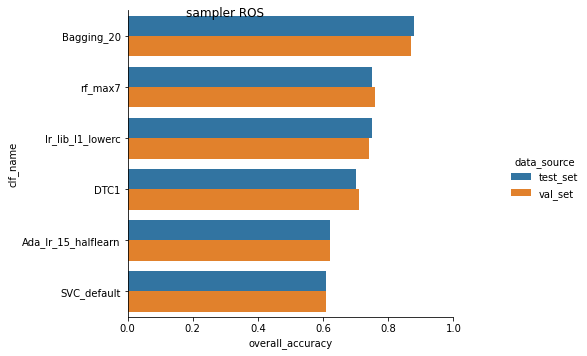

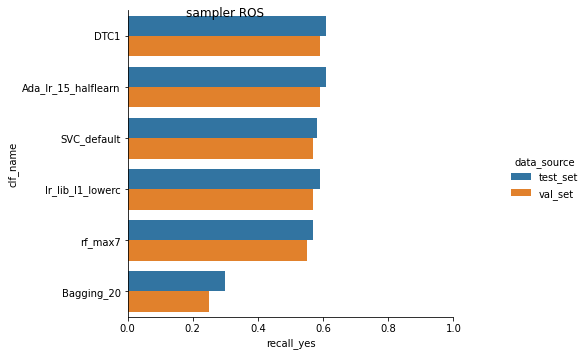

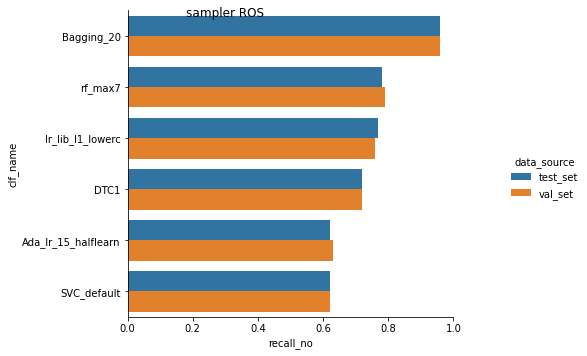

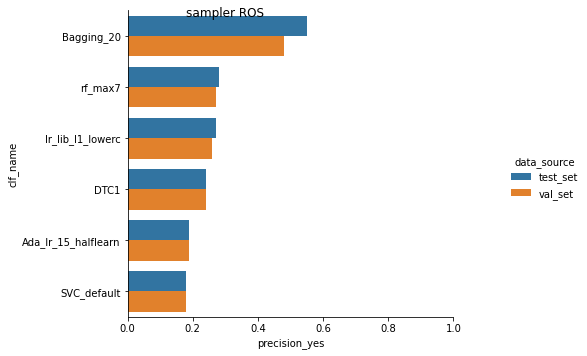

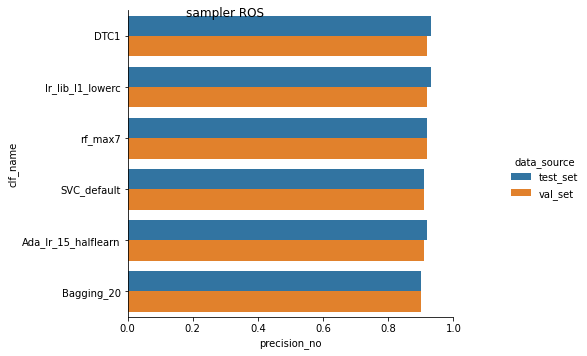

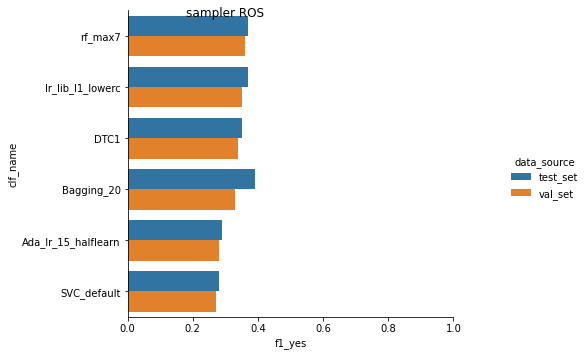

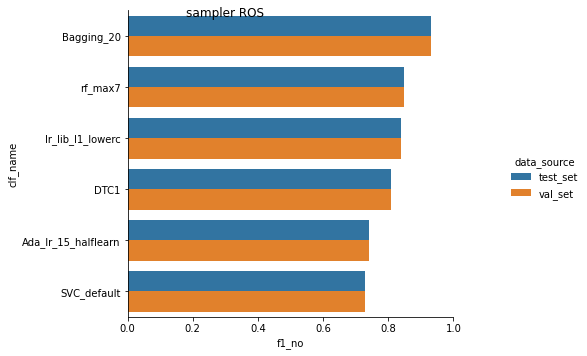

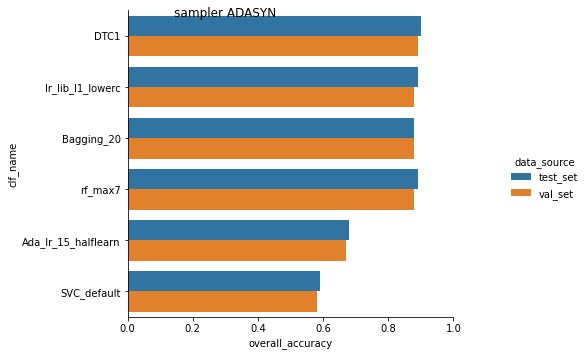

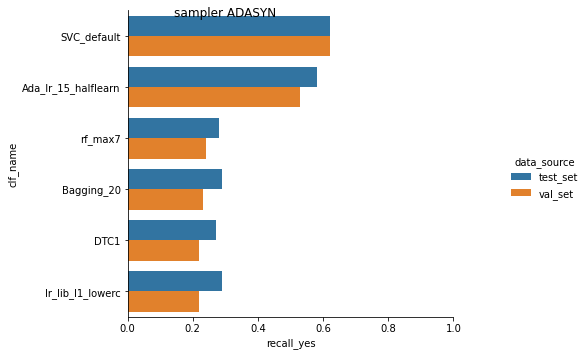

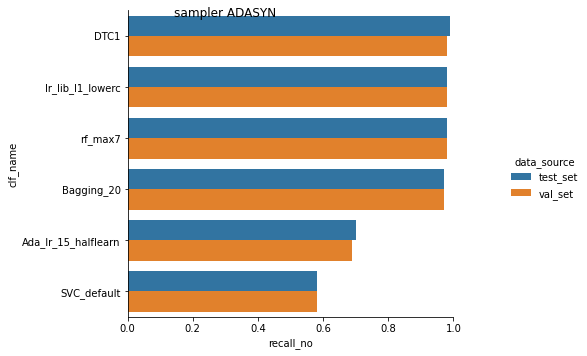

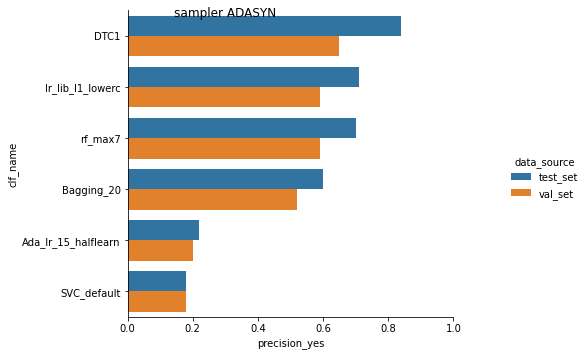

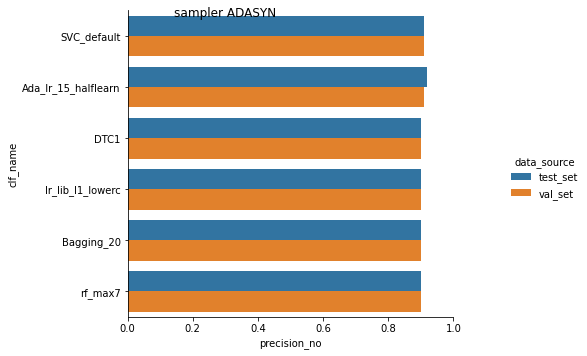

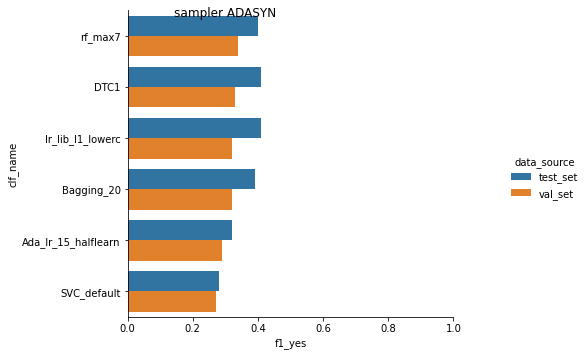

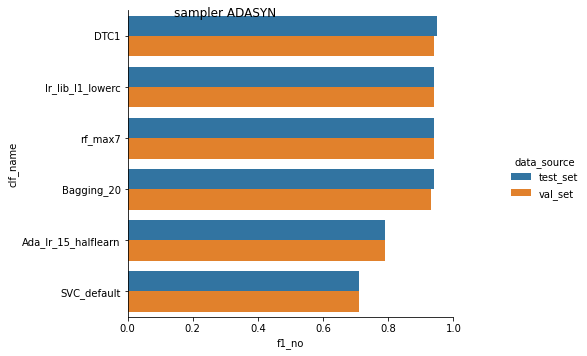

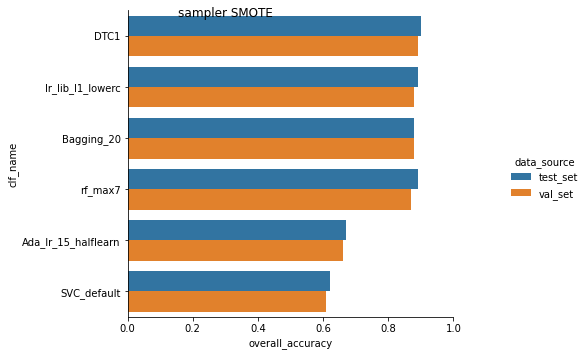

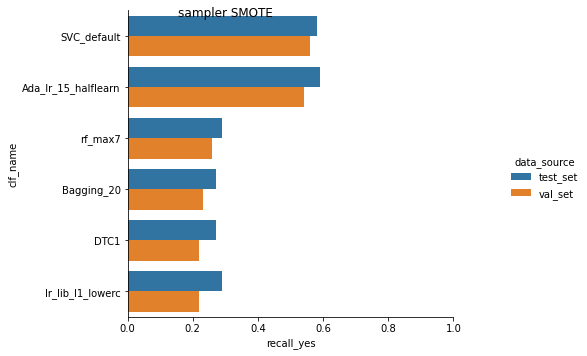

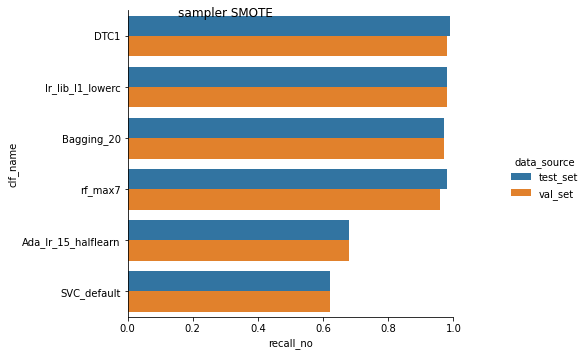

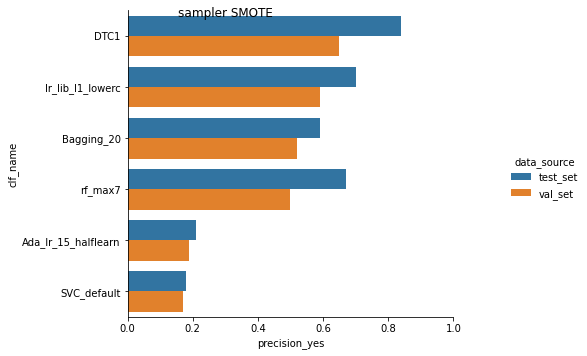

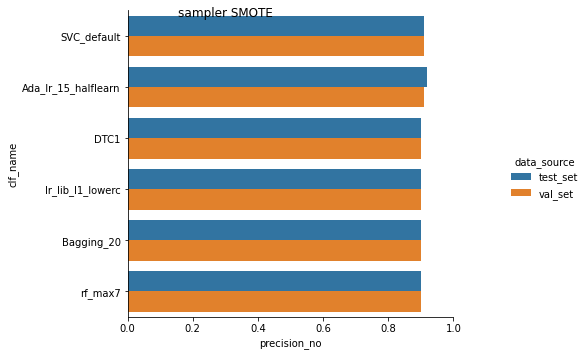

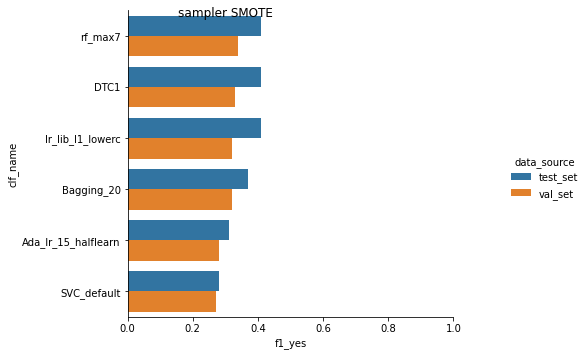

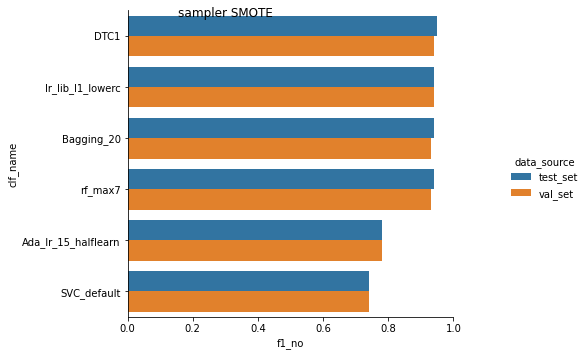

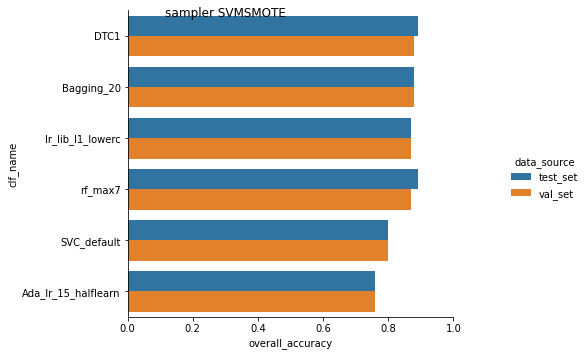

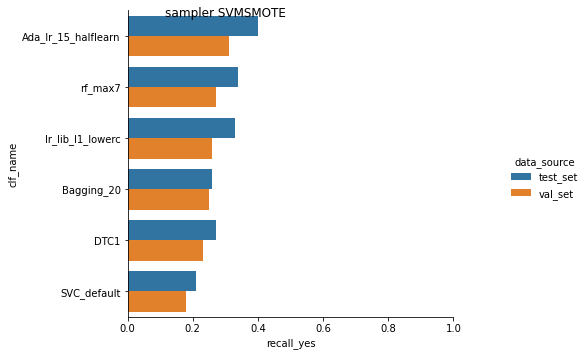

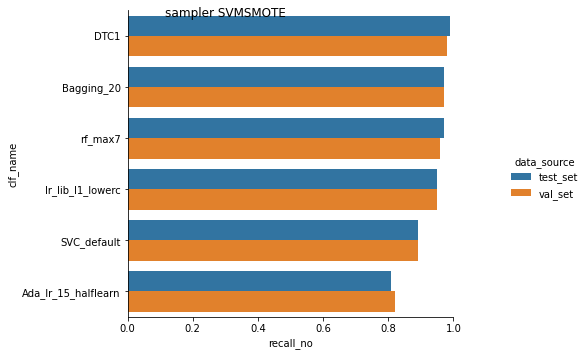

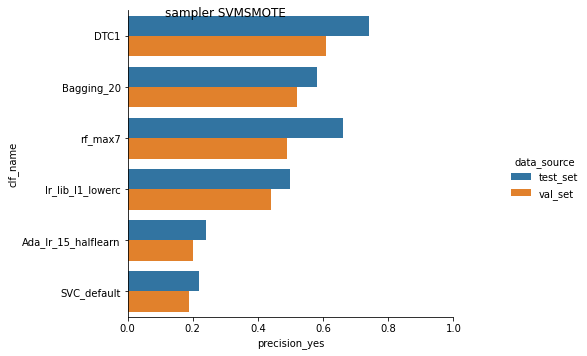

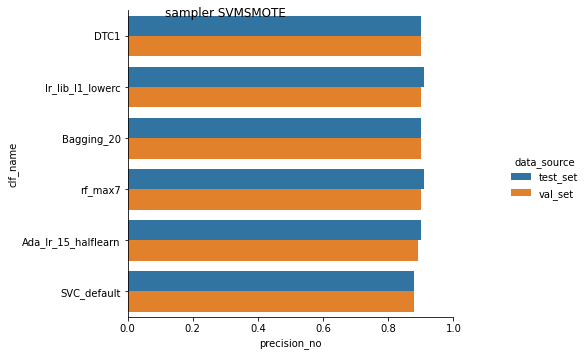

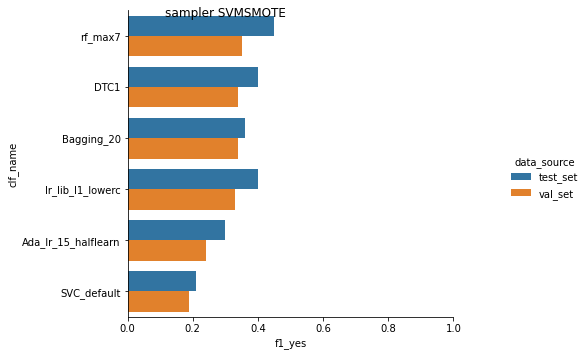

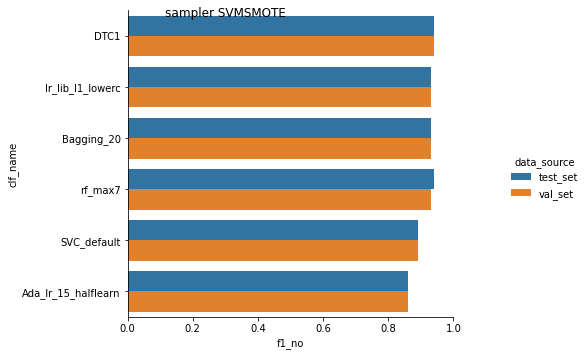

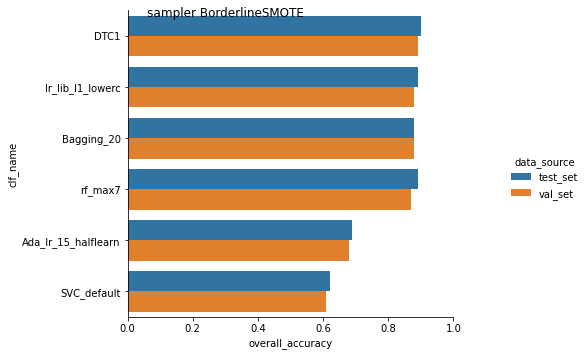

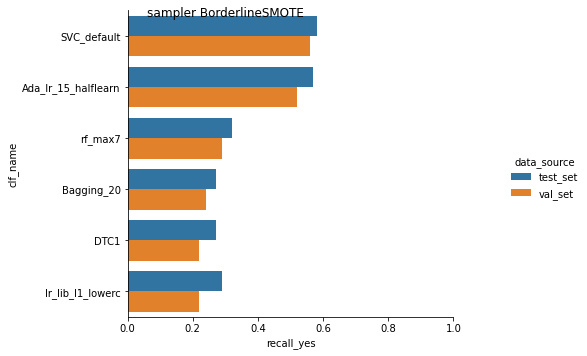

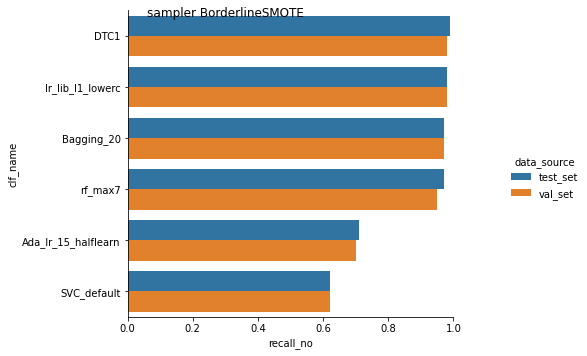

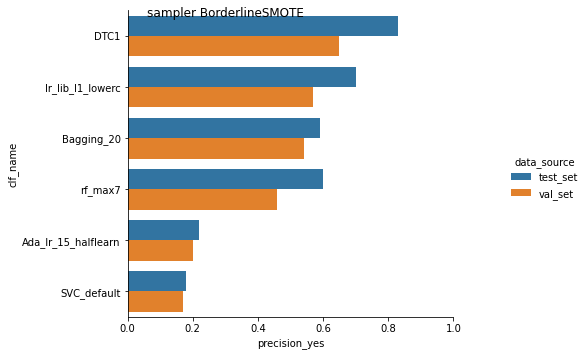

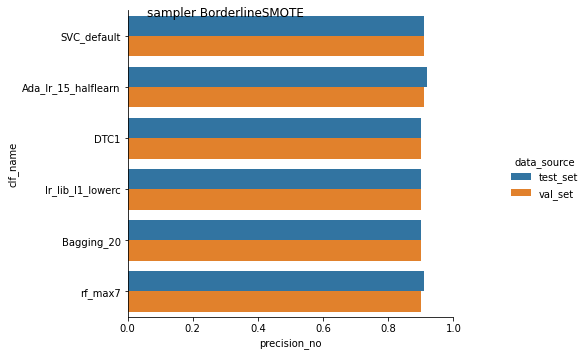

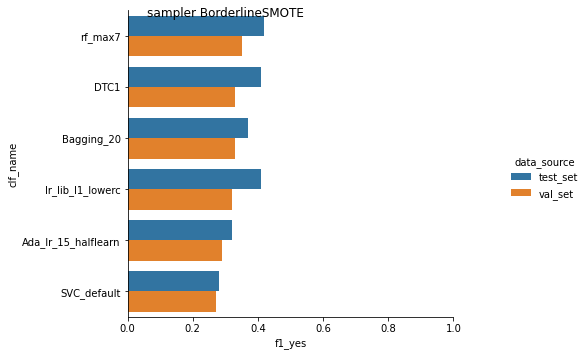

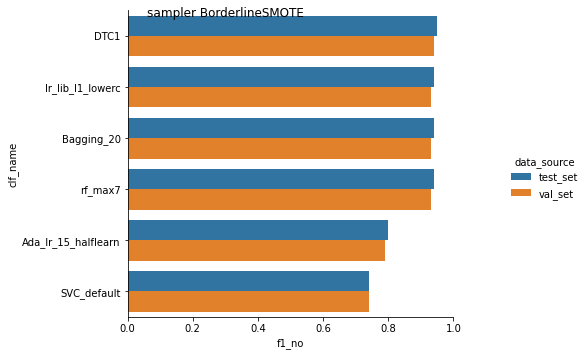

In [69]:
# Evaluate oversampling techniques on original df
print('For df:\n')
fun_multi_clf_sampler_all_tasks(osampler_list,osampler_name_list,clf_list4,clf_name_list4,X_train.values,y_train,X_val,y_val,X_test,y_test,'data_source')

For df1:

Sampler:  RandomOverSampler(random_state=42) 

y value counts of resampled train set
 No     5214
Yes    5214
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
3           Bagging_20             0.90            0.90
5              rf_max7             0.79            0.79
2     lr_lib_l1_lowerc             0.75            0.75
0                 DTC1             0.66            0.66
1          SVC_default             0.61            0.61
4  Ada_lr_15_halflearn             0.61            0.60 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
0                 DTC1             0.68            0.60
4  Ada_lr_15_halflearn             0.65            0.62
2     lr_lib_l1_lowerc             0.62            0.57
1          SVC_default             0.61            0.54
5              rf_max7             0.57            0.55

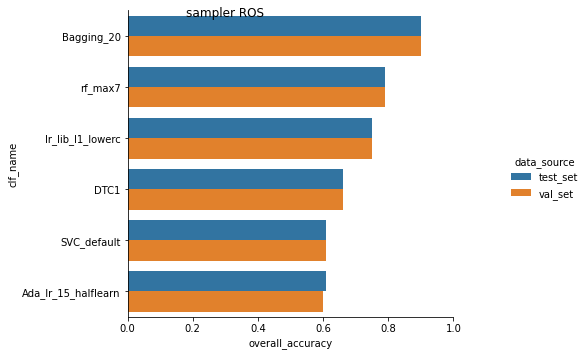

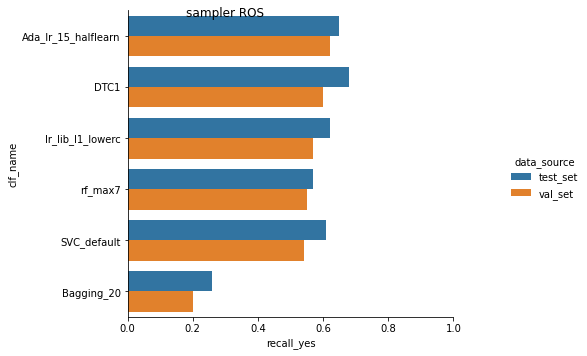

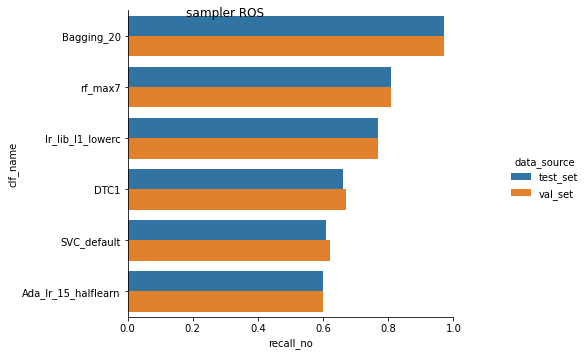

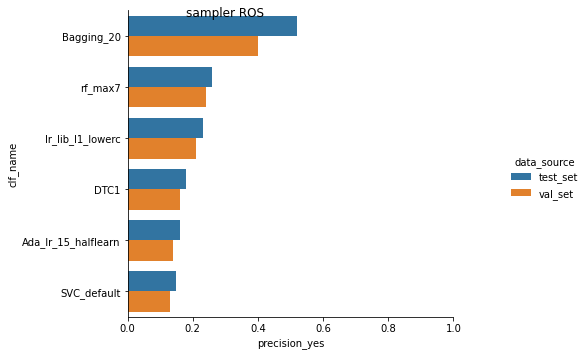

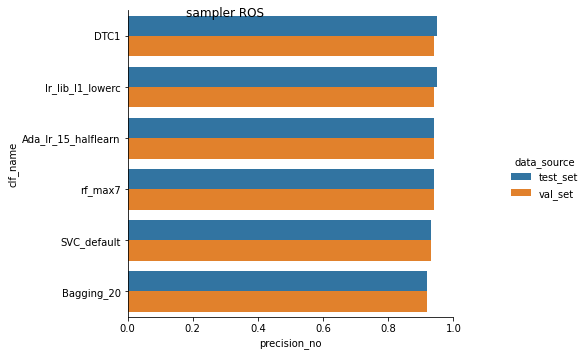

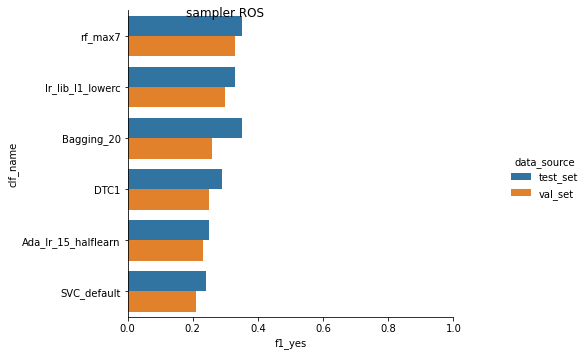

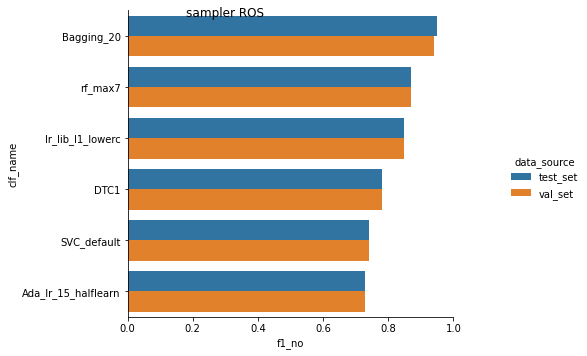

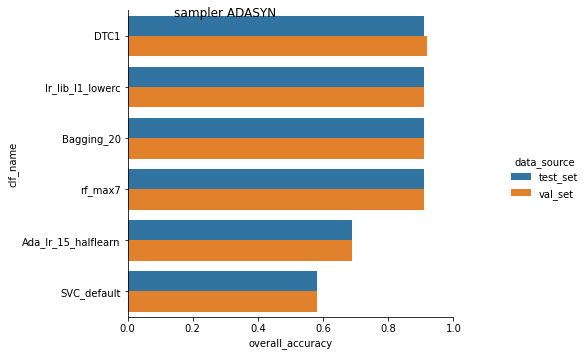

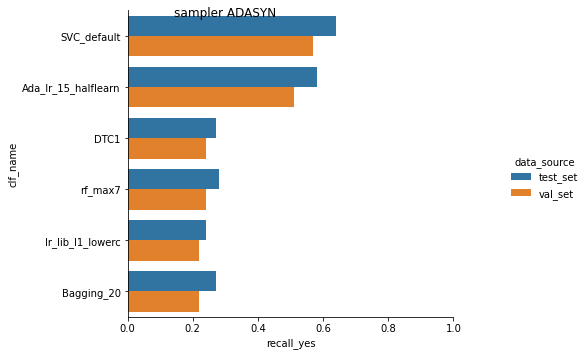

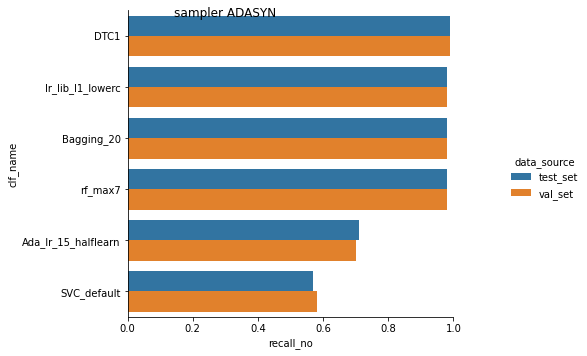

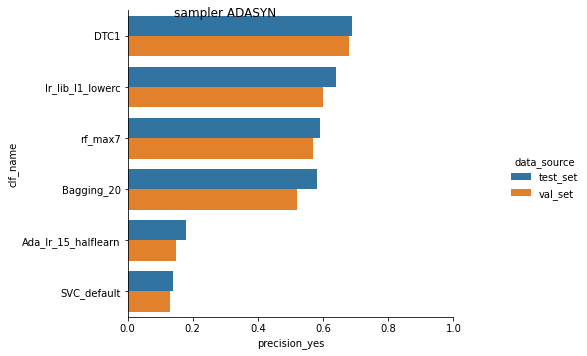

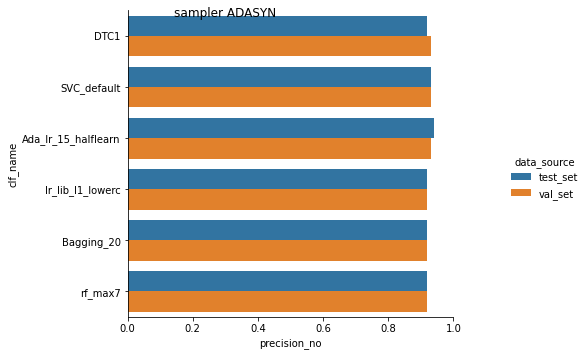

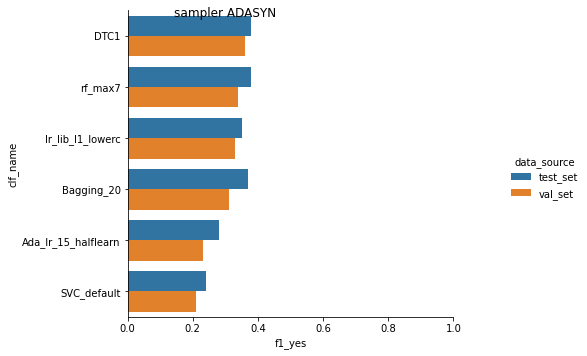

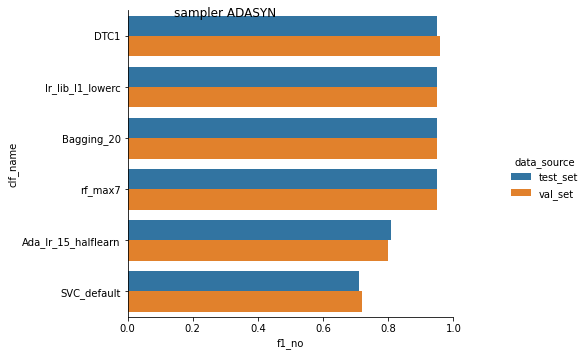

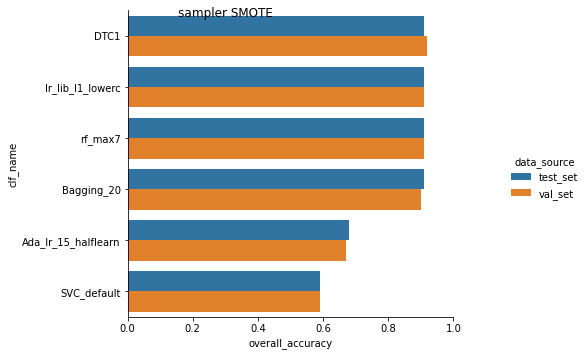

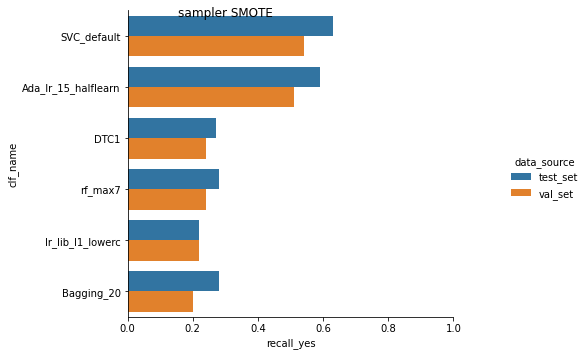

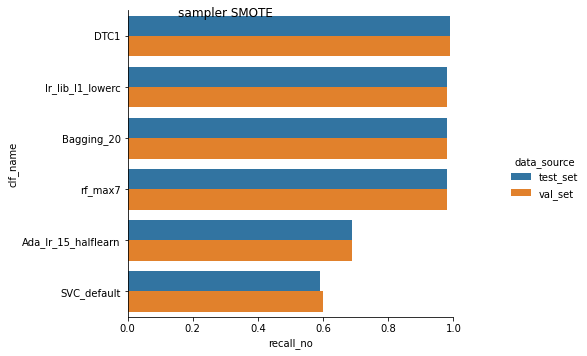

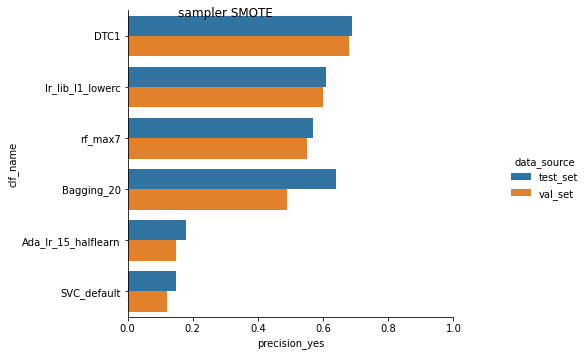

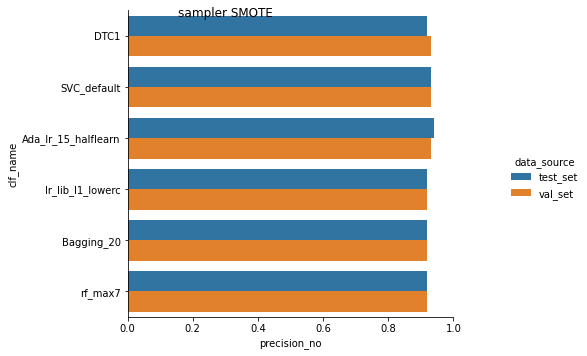

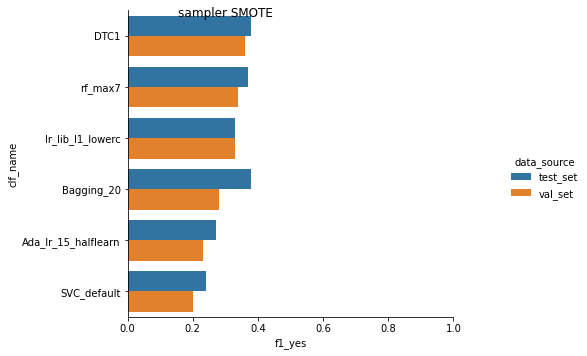

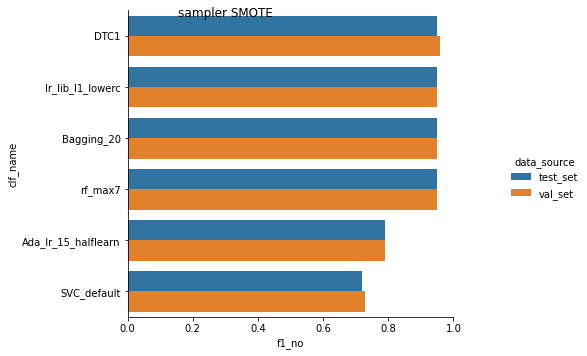

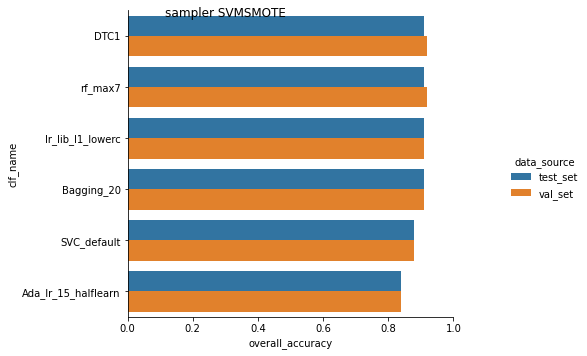

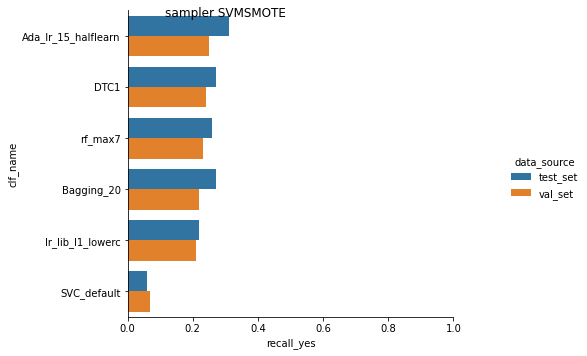

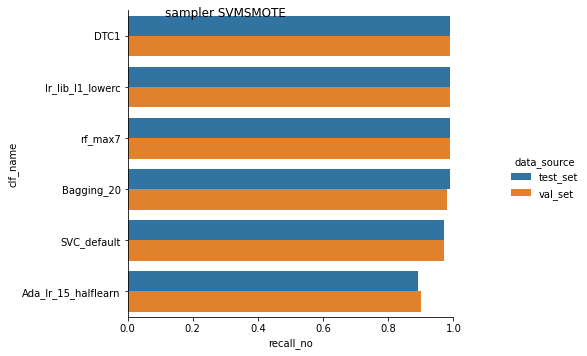

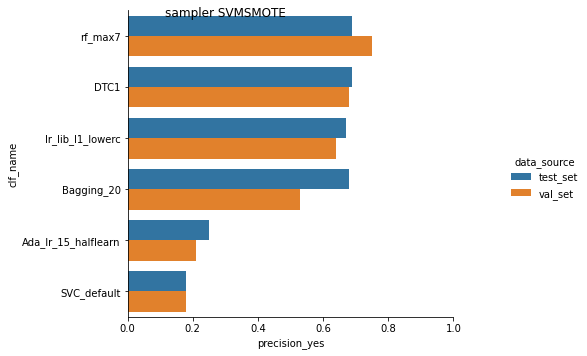

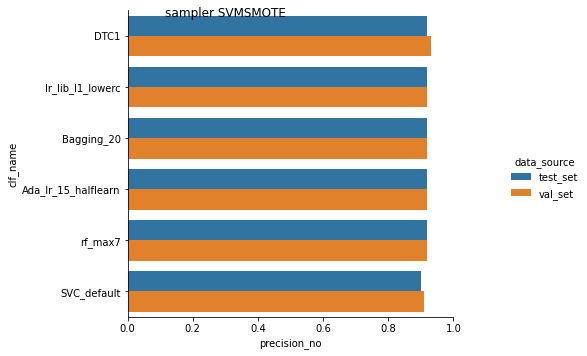

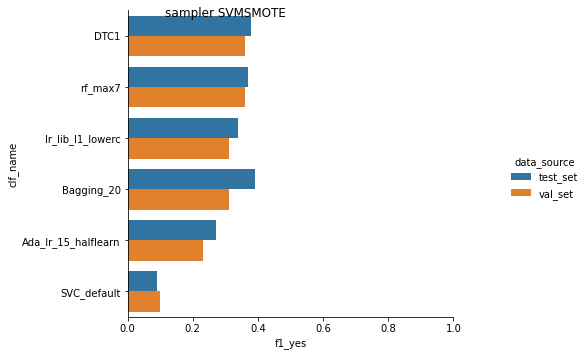

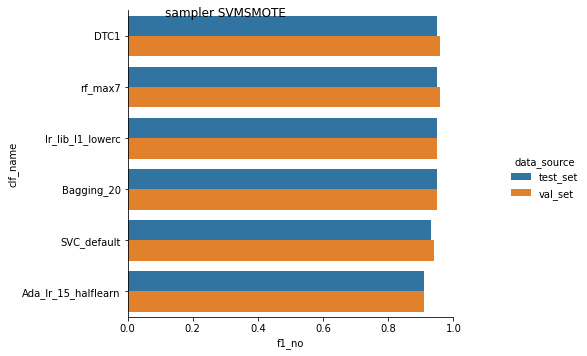

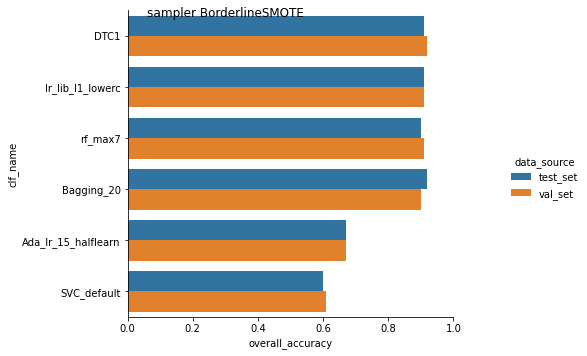

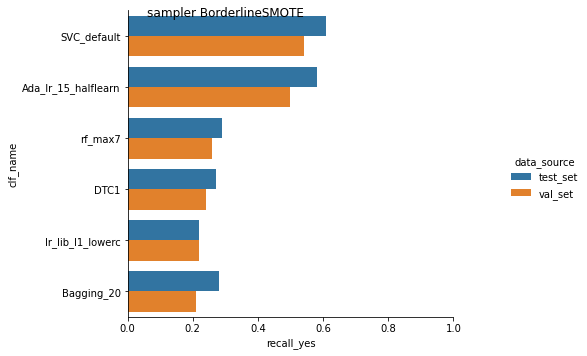

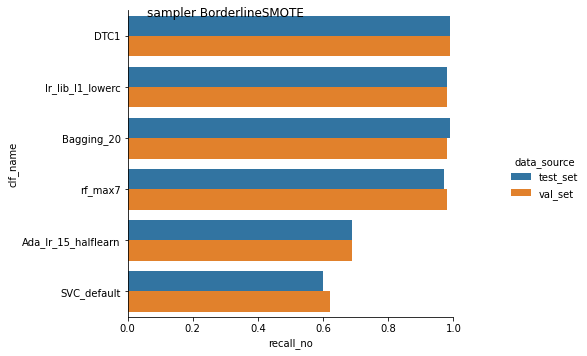

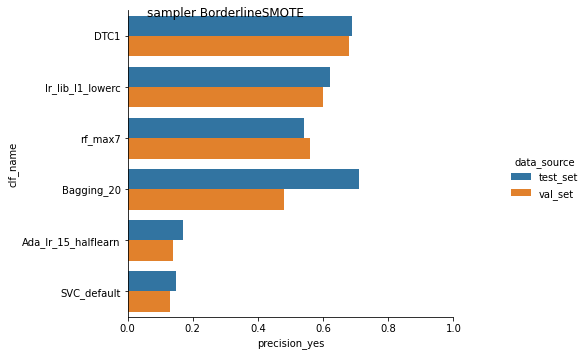

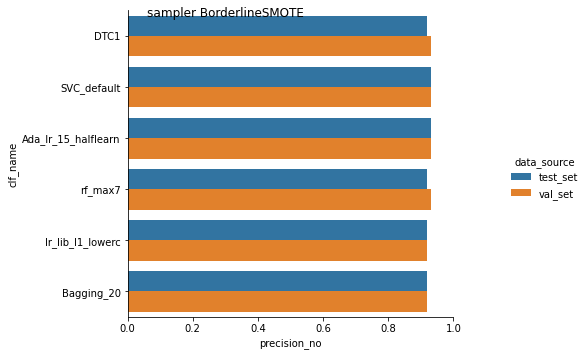

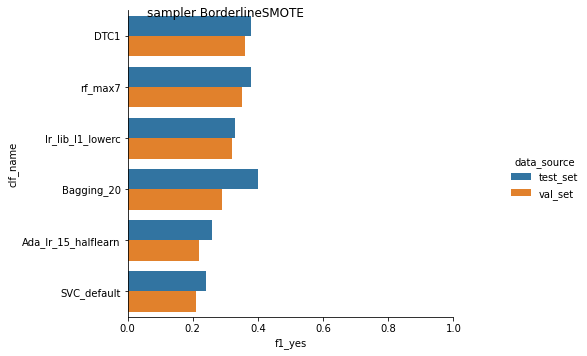

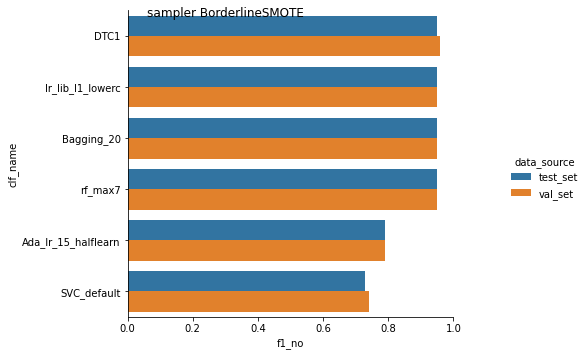

In [70]:
# Evaluate oversampling techniques on df1
print('For df1:\n')
fun_multi_clf_sampler_all_tasks(osampler_list,osampler_name_list,clf_list4,clf_name_list4,X_train1.values,y_train1,X_val1,y_val1,X_test1,y_test1,'data_source')

For df2:

Sampler:  RandomOverSampler(random_state=42) 

y value counts of resampled train set
 No     5231
Yes    5231
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
3           Bagging_20             0.96            0.96
5              rf_max7             0.89            0.90
2     lr_lib_l1_lowerc             0.76            0.77
0                 DTC1             0.73            0.75
1          SVC_default             0.67            0.64
4  Ada_lr_15_halflearn             0.63            0.63 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
4  Ada_lr_15_halflearn             0.68            0.65
1          SVC_default             0.67            0.59
0                 DTC1             0.62            0.63
2     lr_lib_l1_lowerc             0.60            0.65
5              rf_max7             0.49            0.41

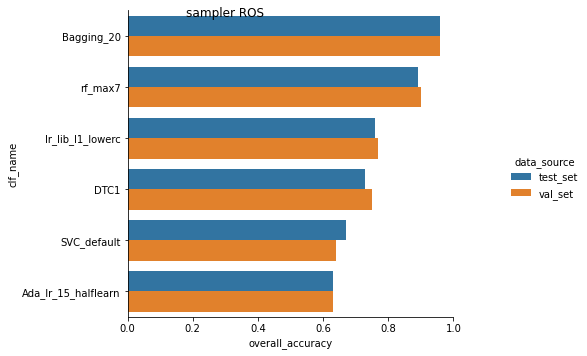

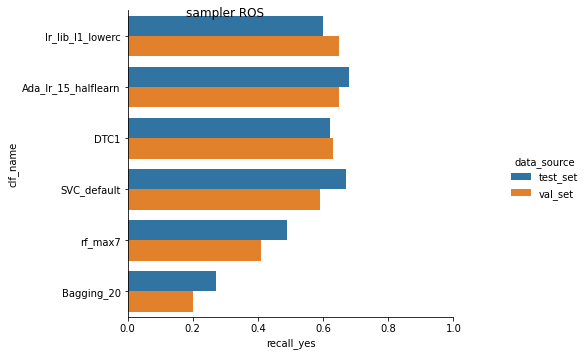

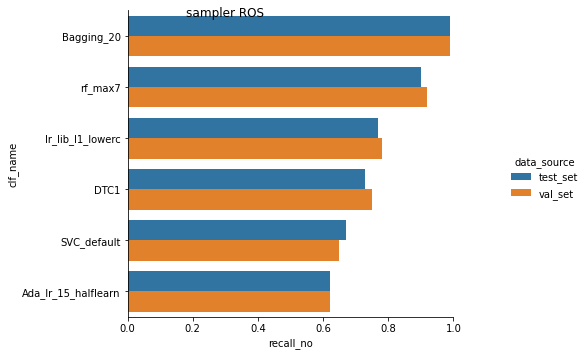

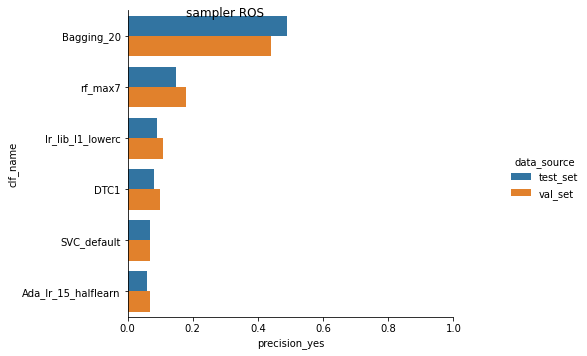

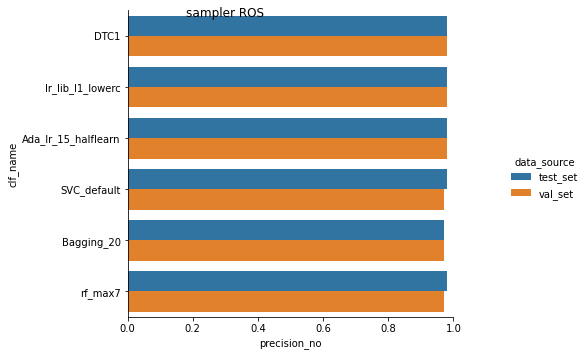

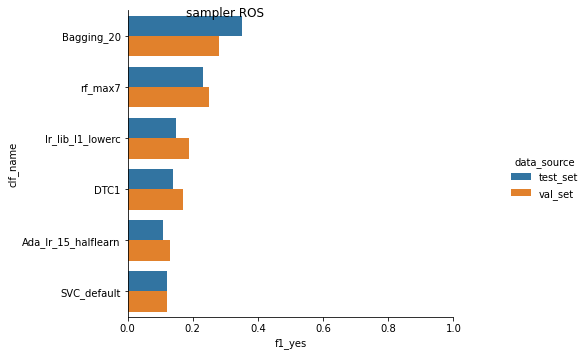

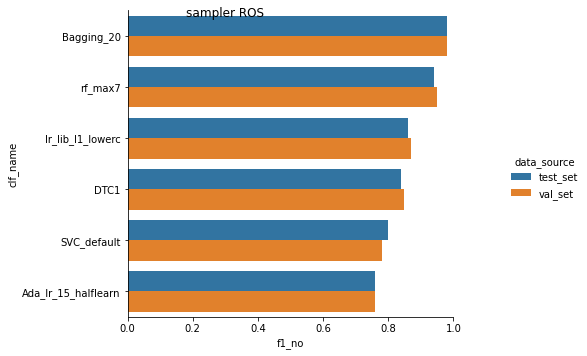

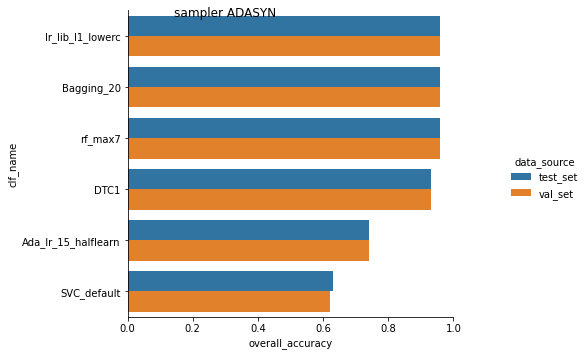

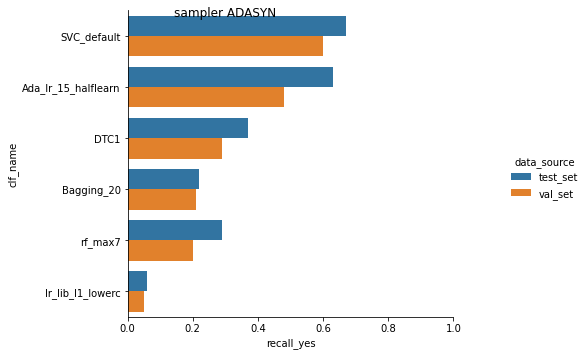

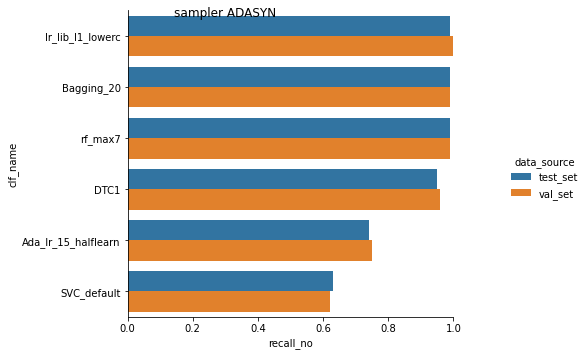

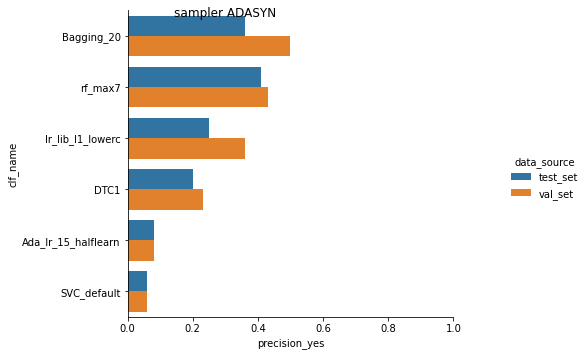

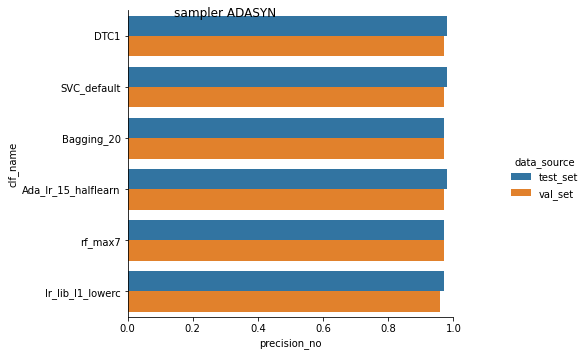

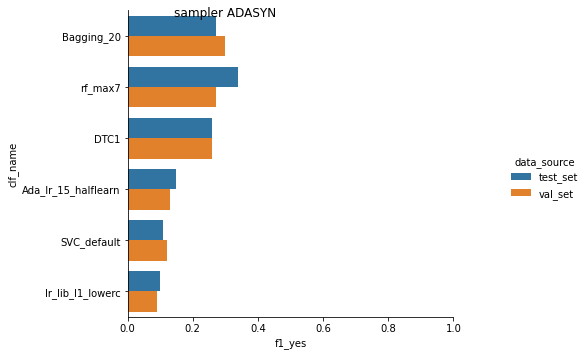

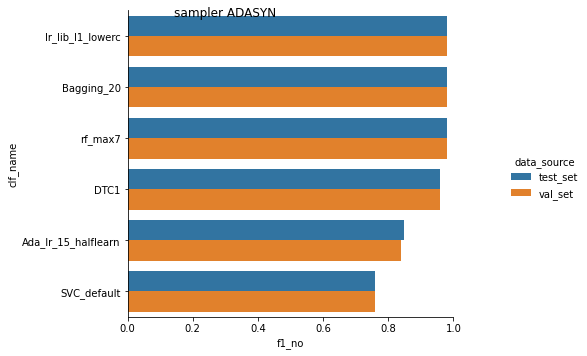

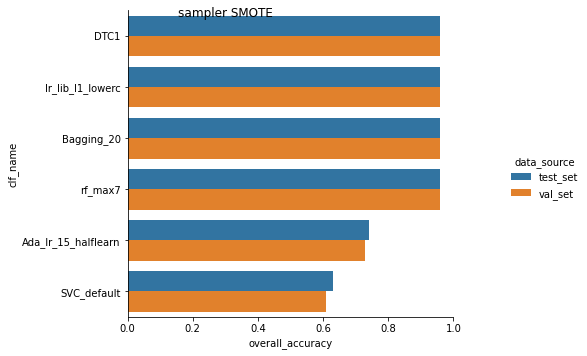

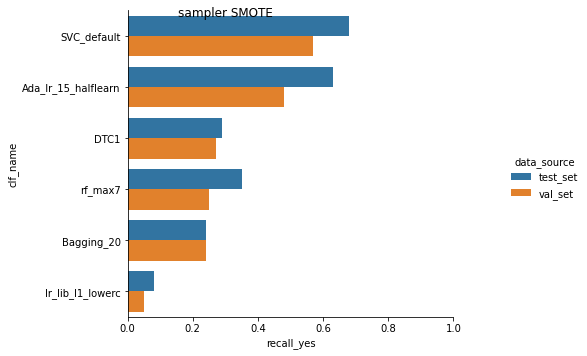

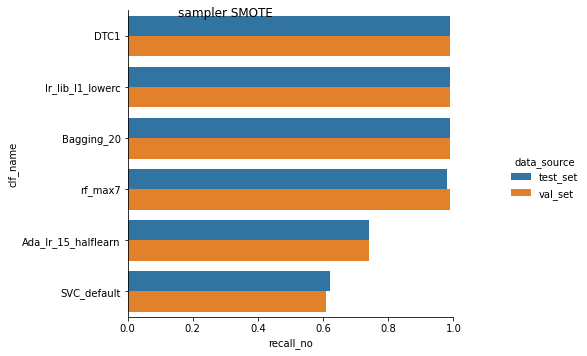

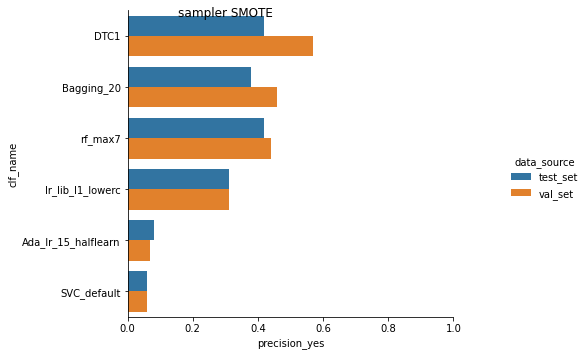

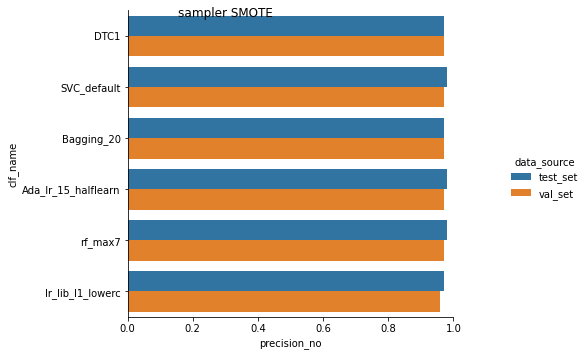

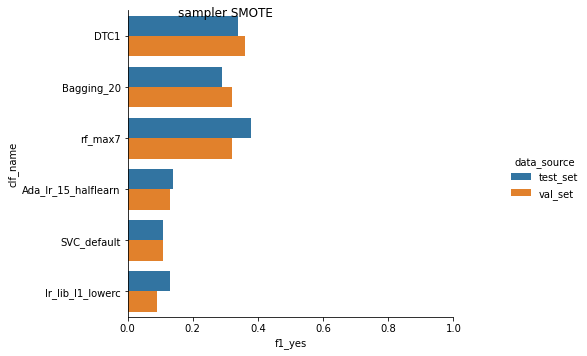

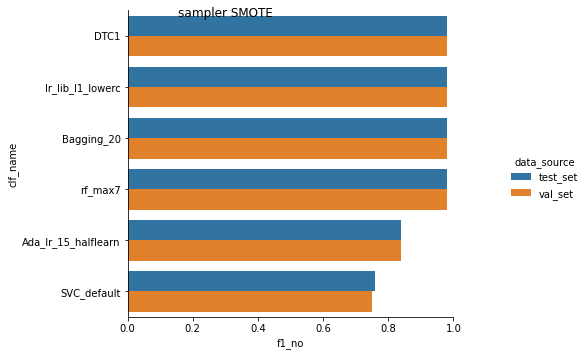

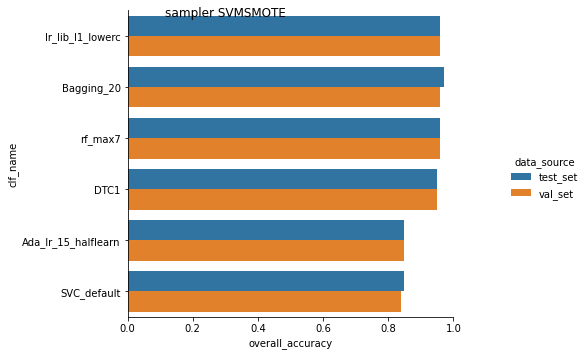

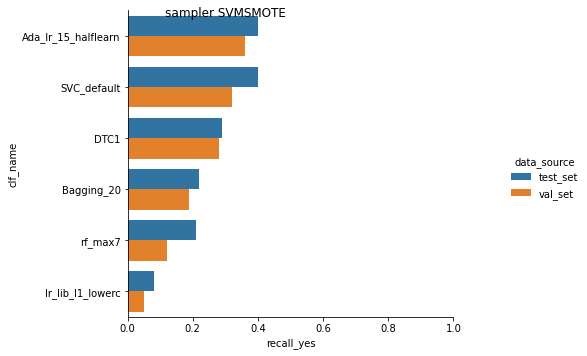

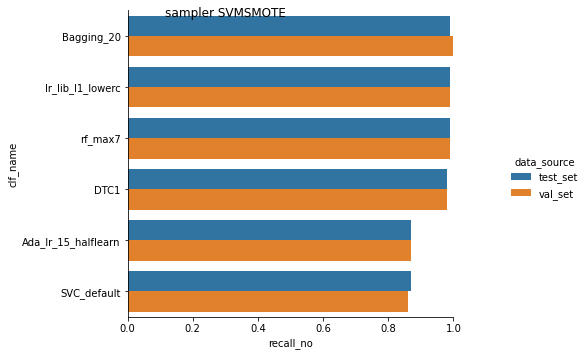

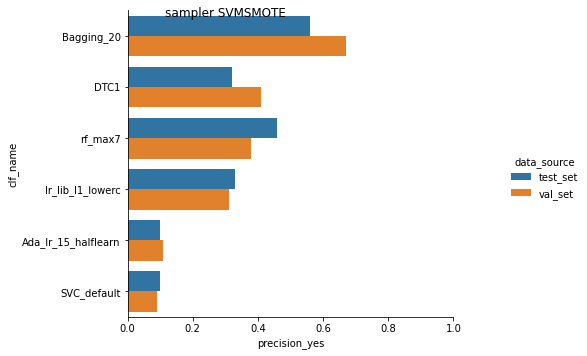

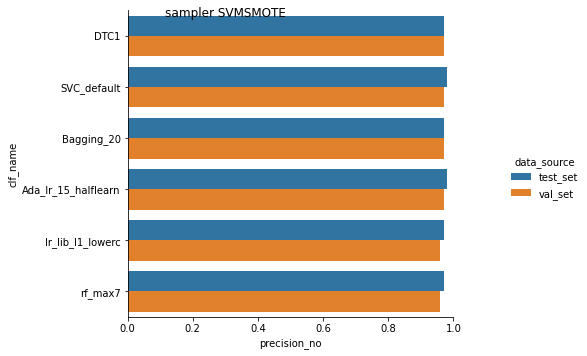

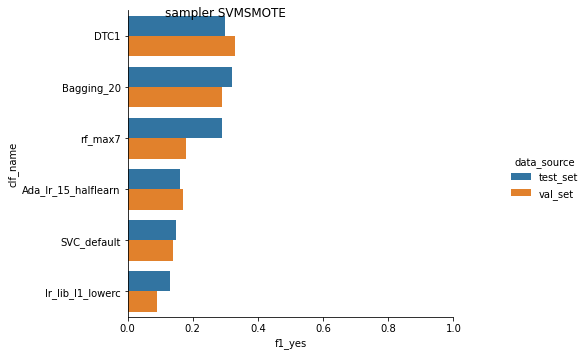

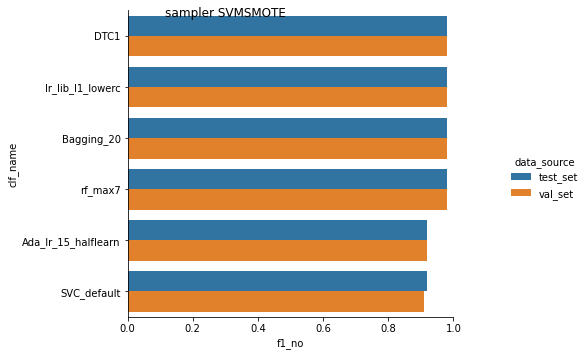

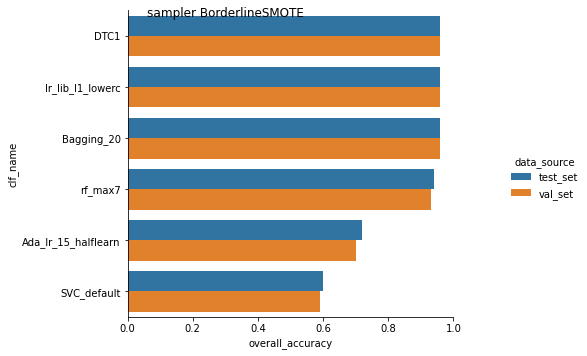

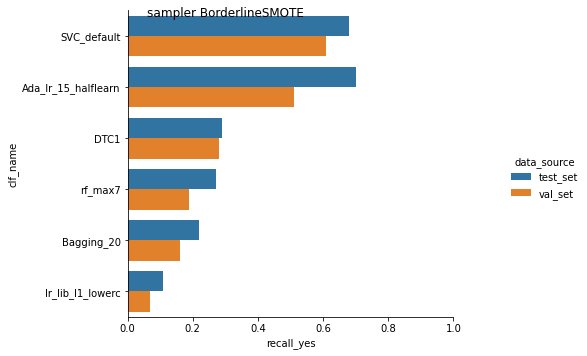

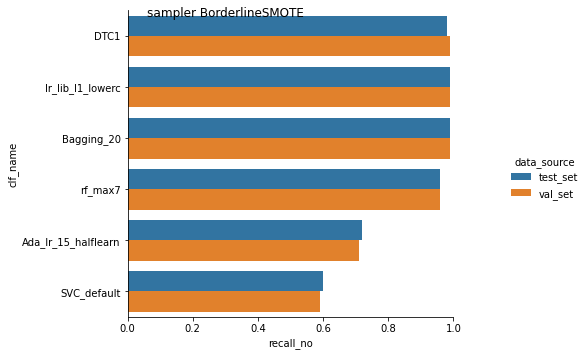

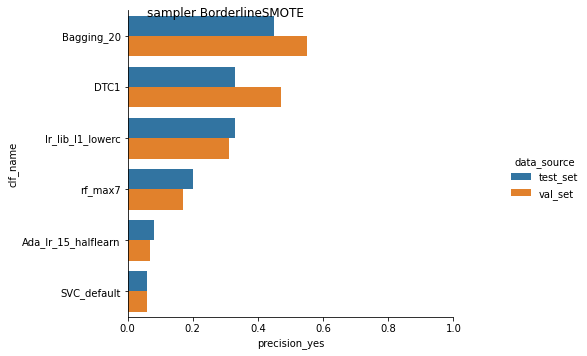

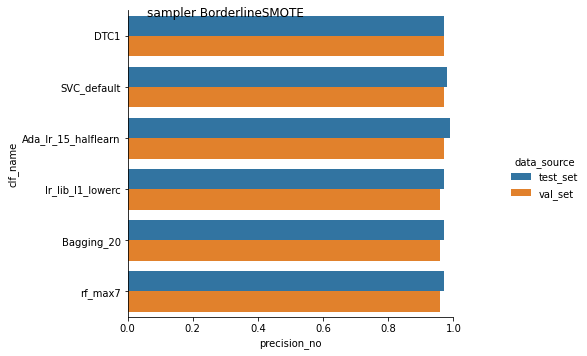

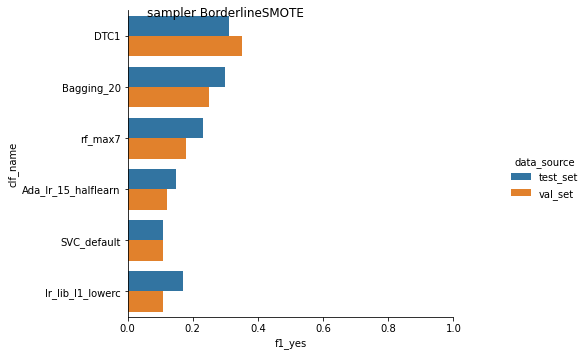

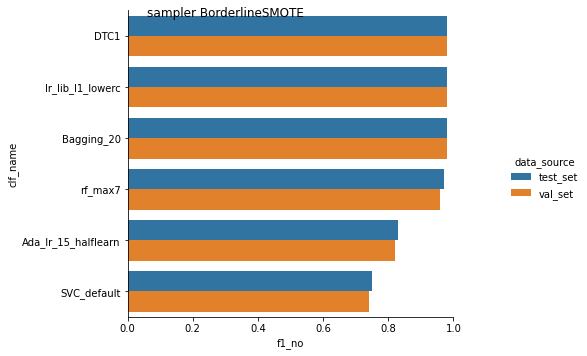

In [71]:
# Evaluate oversampling techniques on df2
print('For df2:\n')
fun_multi_clf_sampler_all_tasks(osampler_list,osampler_name_list,clf_list4,clf_name_list4,X_train2.values,y_train2,X_val2,y_val2,X_test2,y_test2,'data_source')

**Evaluating undersampling techniques on the three datasets**

For df:

Sampler:  RandomUnderSampler(random_state=42) 

y value counts of resampled train set
 No     787
Yes    787
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
2     lr_lib_l1_lowerc             0.72            0.72
5              rf_max7             0.72            0.71
3           Bagging_20             0.70            0.70
0                 DTC1             0.64            0.64
1          SVC_default             0.61            0.62
4  Ada_lr_15_halflearn             0.61            0.61 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
0                 DTC1             0.66            0.62
4  Ada_lr_15_halflearn             0.65            0.59
5              rf_max7             0.63            0.58
2     lr_lib_l1_lowerc             0.60            0.54
3           Bagging_20             0.59            0.56
1

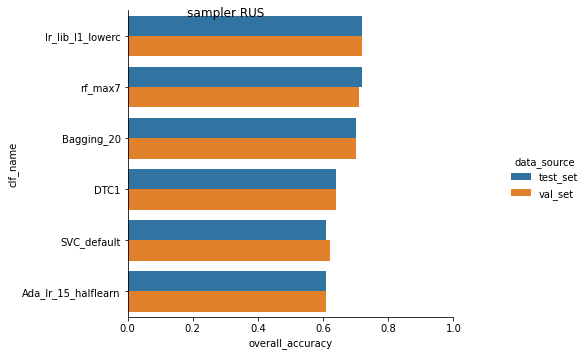

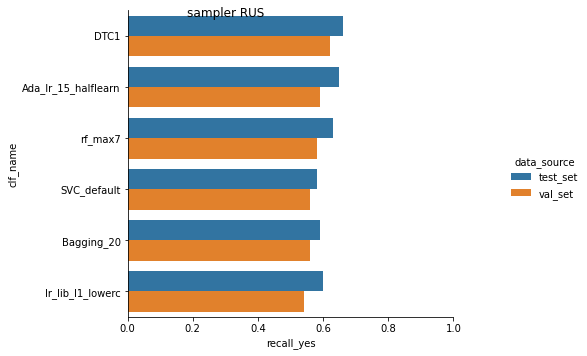

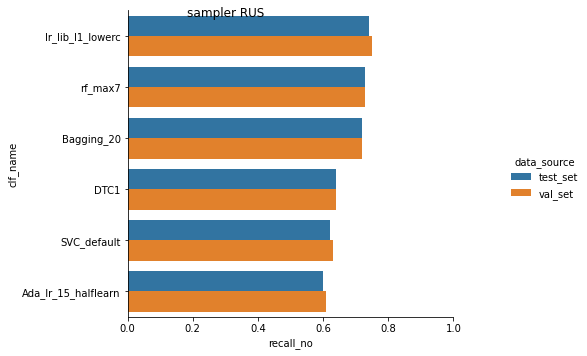

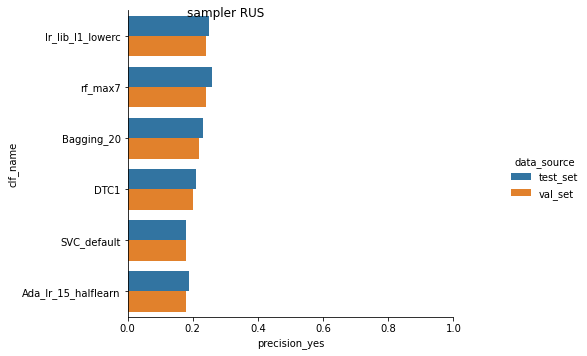

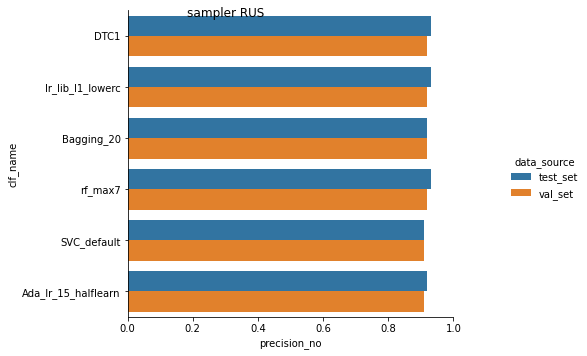

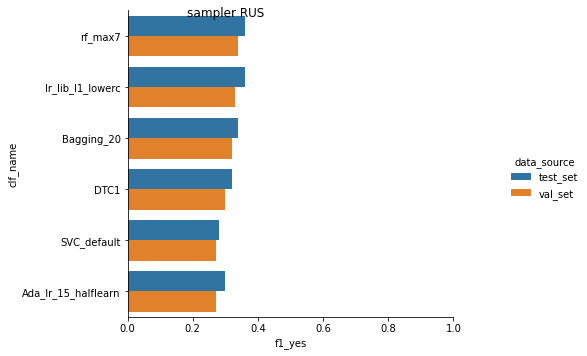

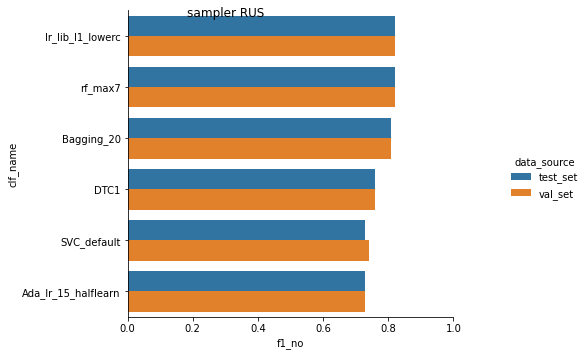

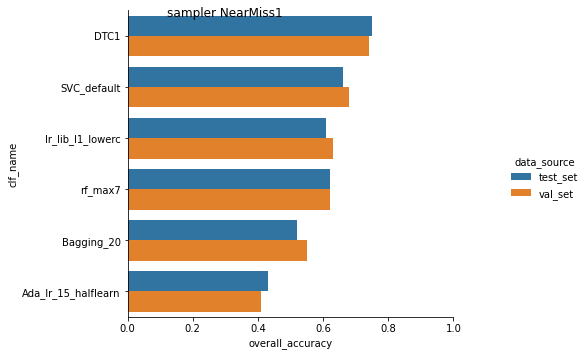

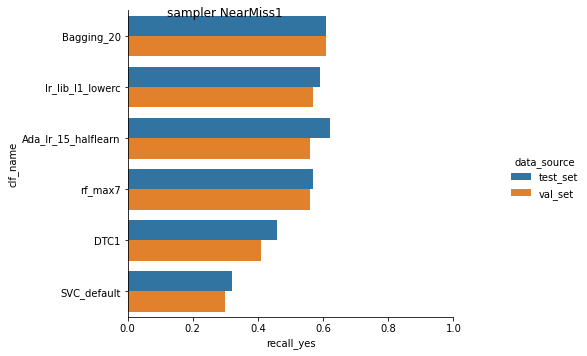

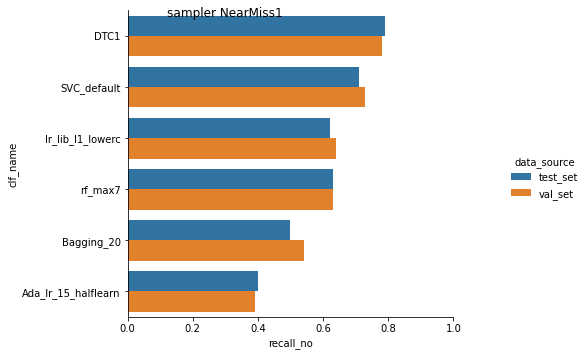

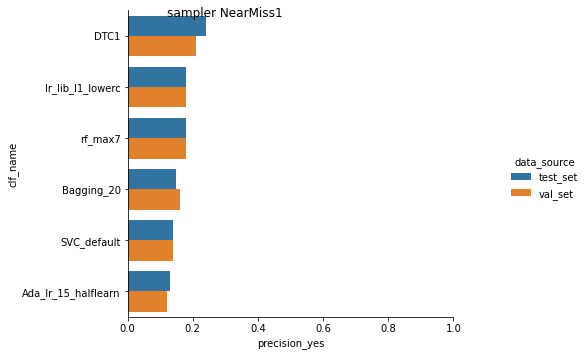

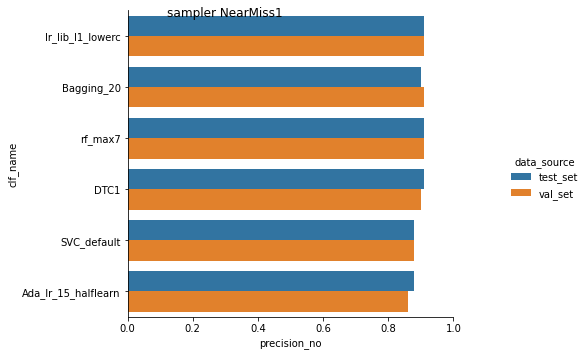

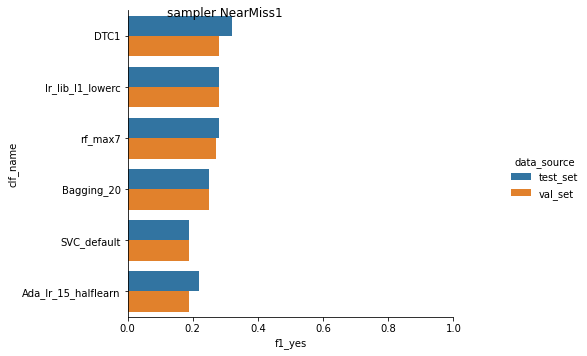

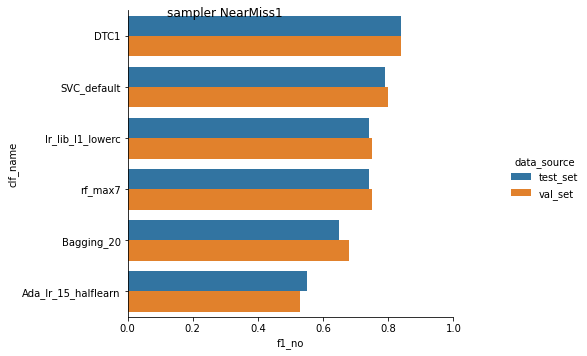

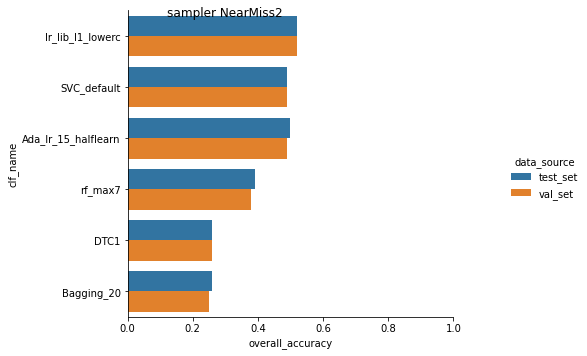

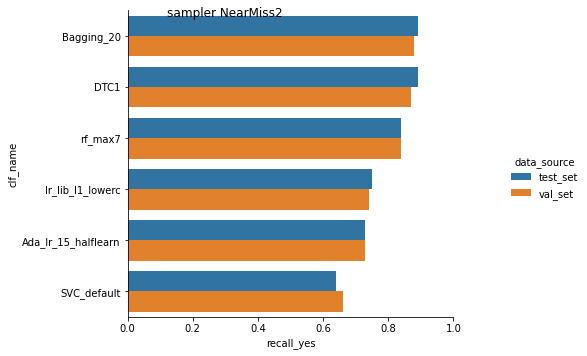

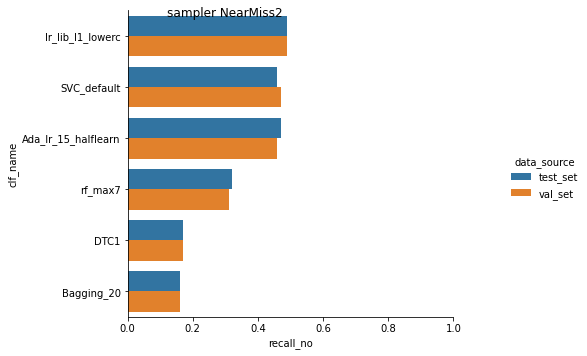

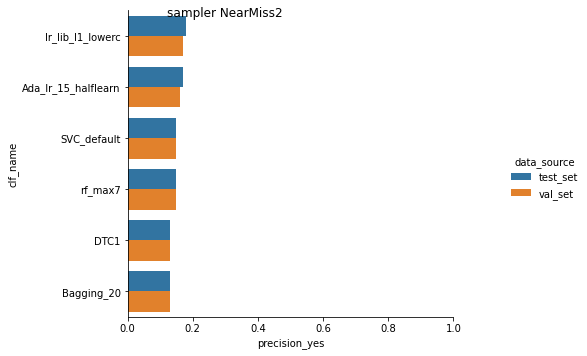

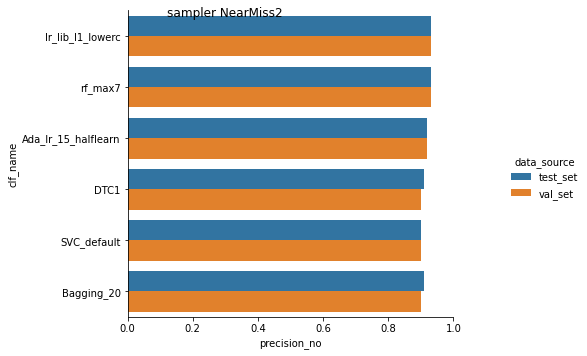

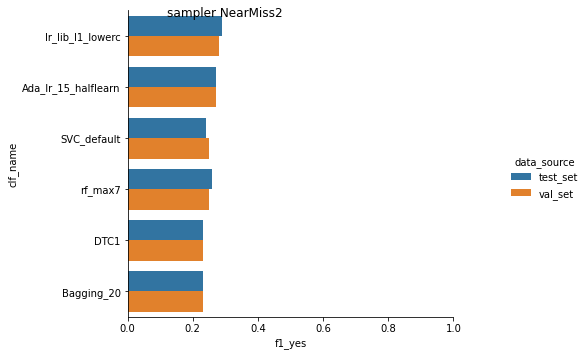

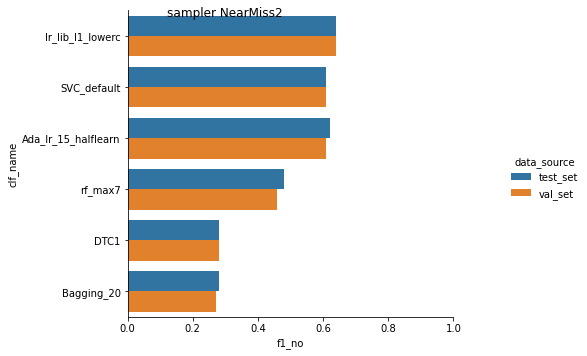

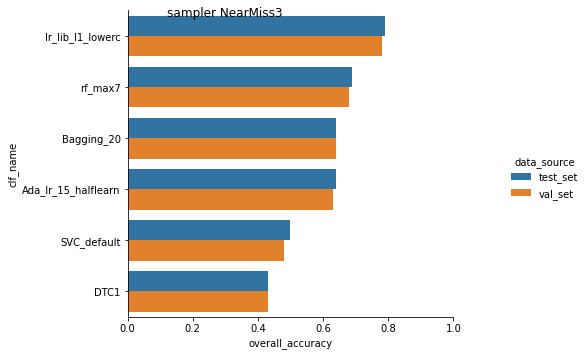

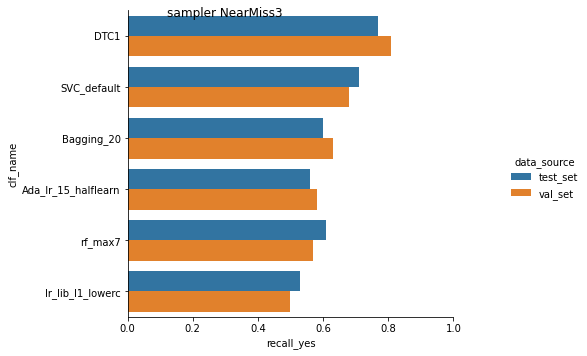

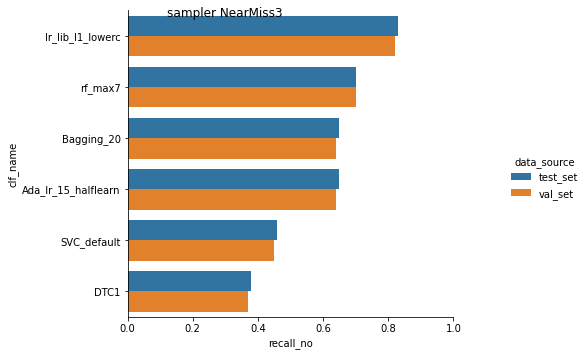

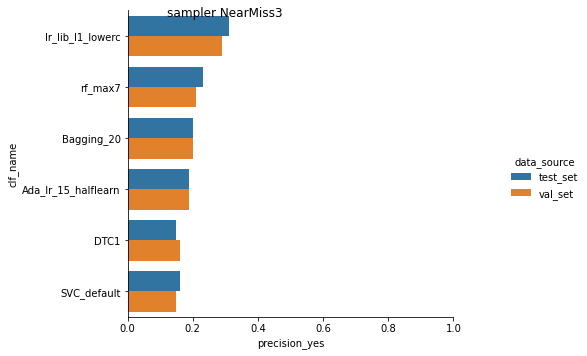

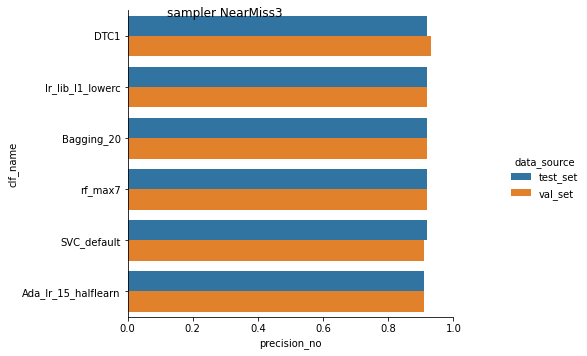

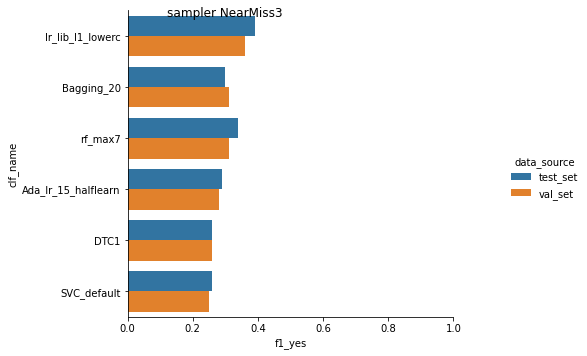

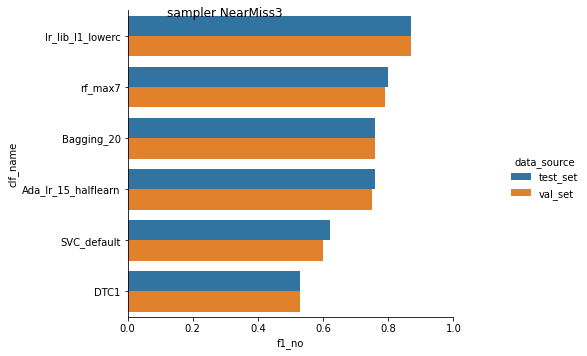

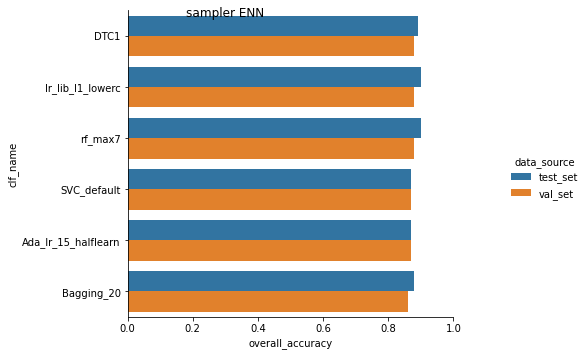

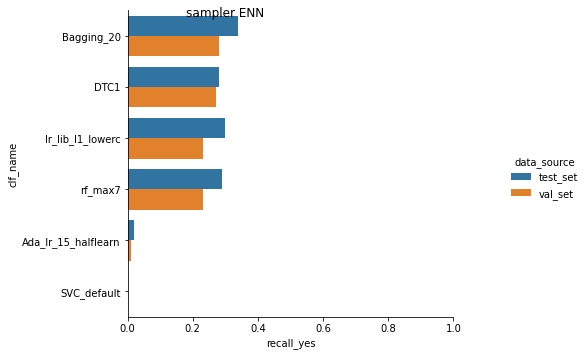

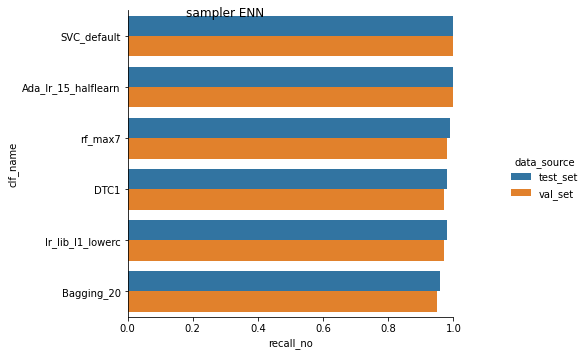

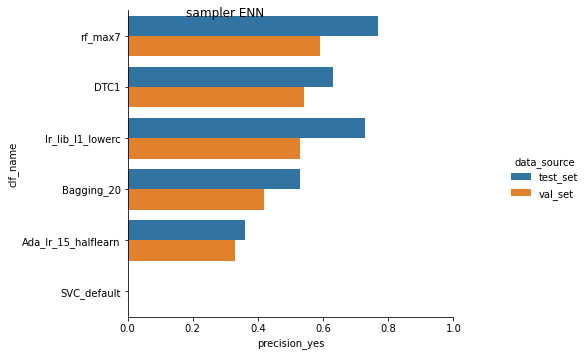

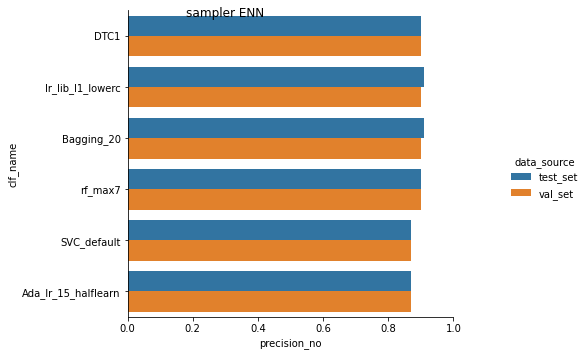

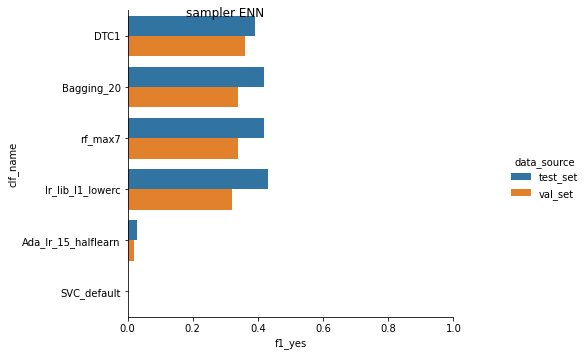

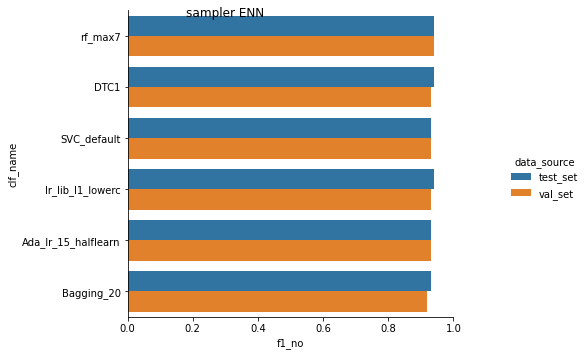

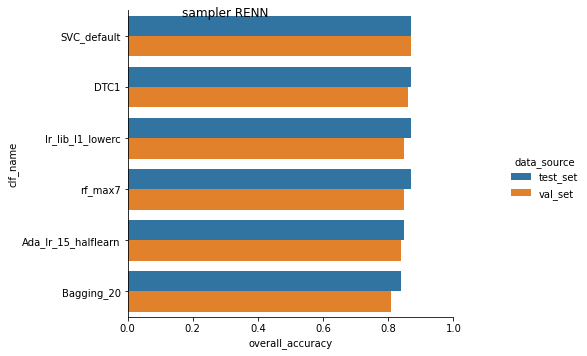

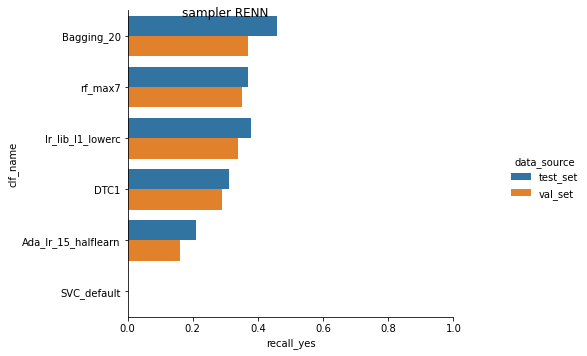

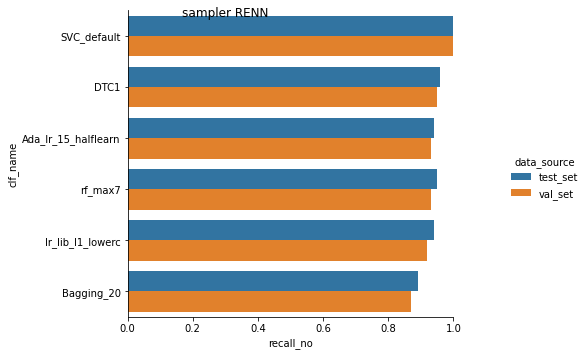

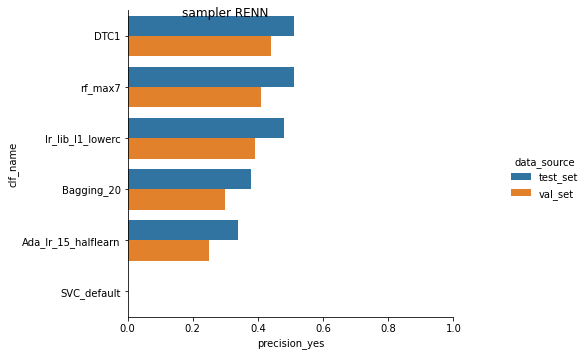

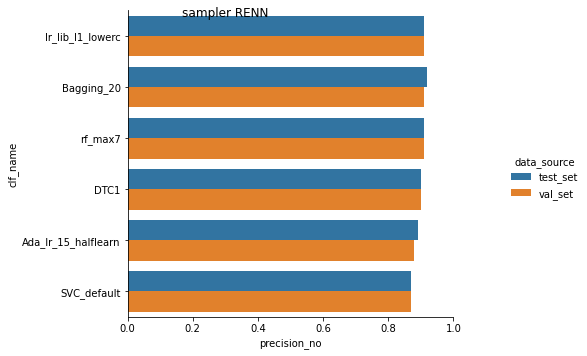

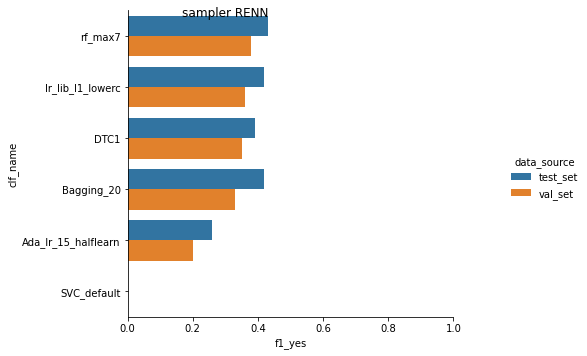

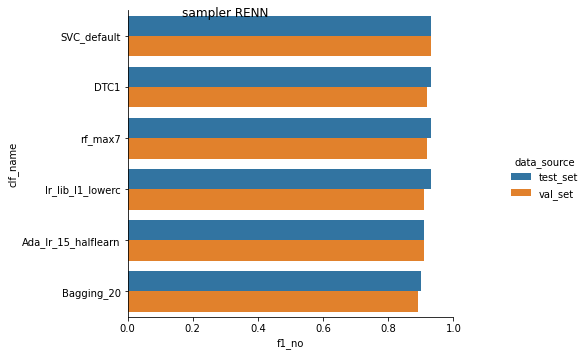

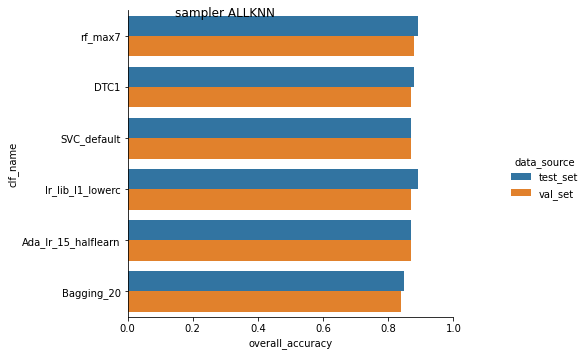

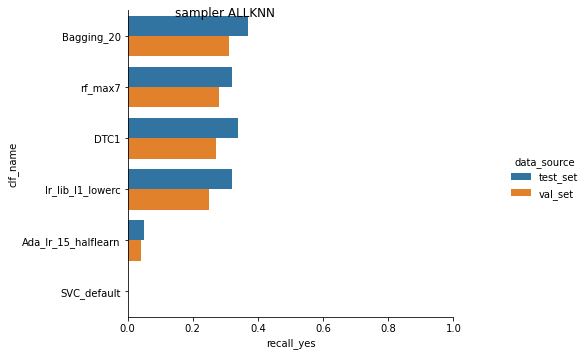

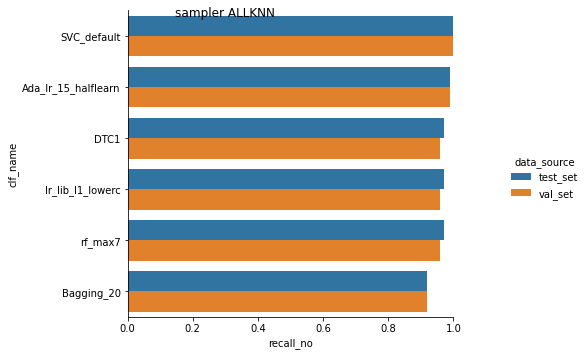

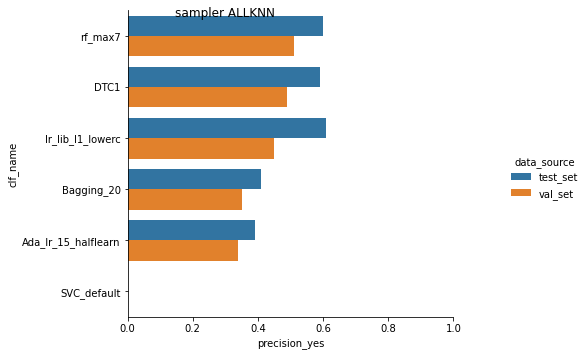

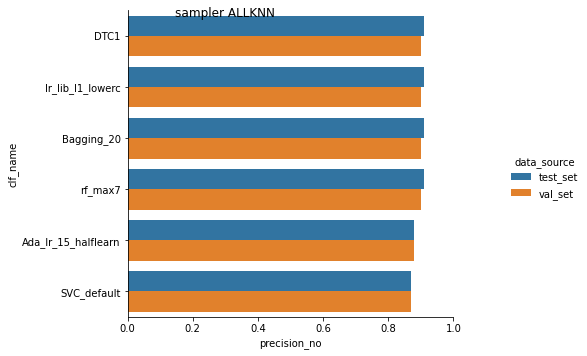

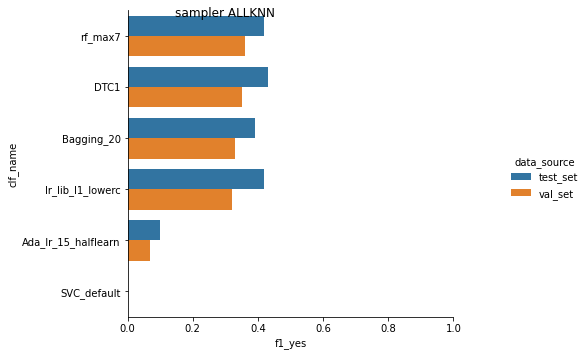

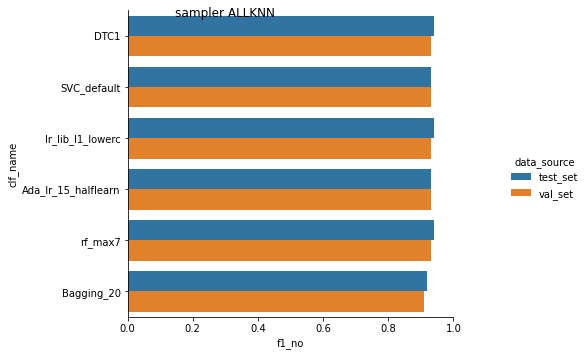

In [72]:
# Evaluate undersampling techniques on original df
print('For df:\n')
fun_multi_clf_sampler_all_tasks(usampler_list,usampler_name_list,clf_list4,clf_name_list4,X_train.values,y_train,X_val,y_val,X_test,y_test,'data_source')


For df1:

Sampler:  RandomUnderSampler(random_state=42) 

y value counts of resampled train set
 No     592
Yes    592
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
2     lr_lib_l1_lowerc             0.70            0.71
3           Bagging_20             0.68            0.67
0                 DTC1             0.66            0.65
5              rf_max7             0.65            0.66
4  Ada_lr_15_halflearn             0.60            0.58
1          SVC_default             0.58            0.58 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
5              rf_max7             0.69            0.67
0                 DTC1             0.68            0.64
4  Ada_lr_15_halflearn             0.67            0.63
2     lr_lib_l1_lowerc             0.64            0.59
1          SVC_default             0.62            0.59


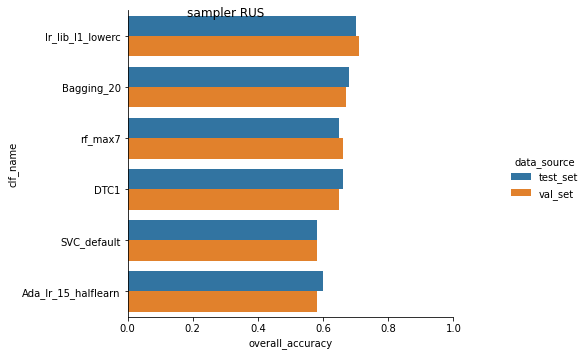

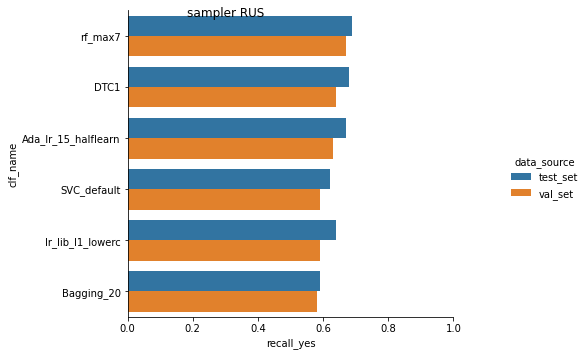

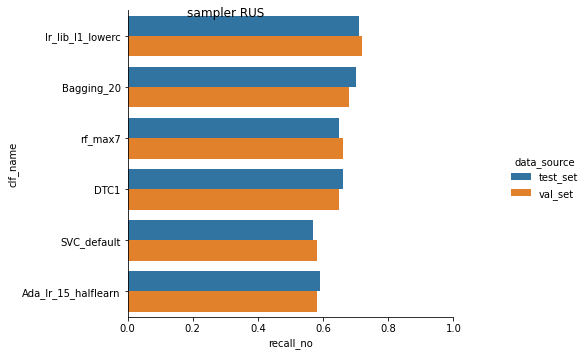

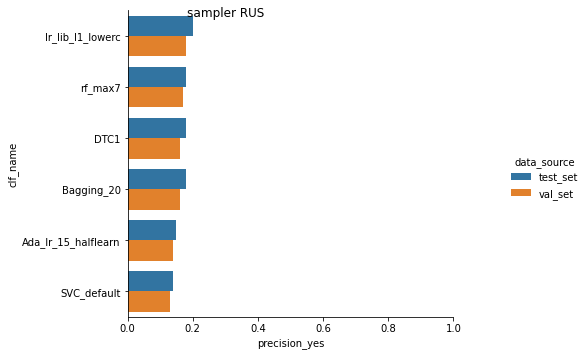

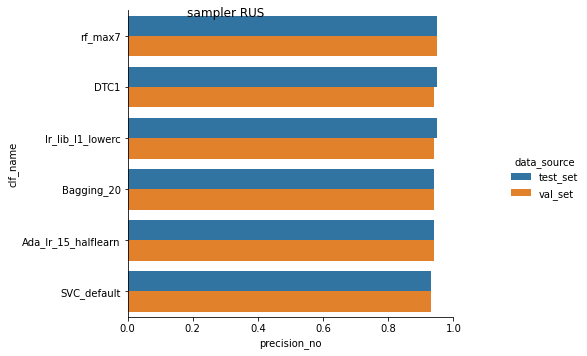

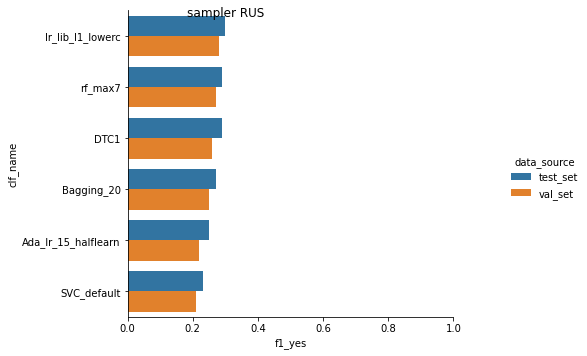

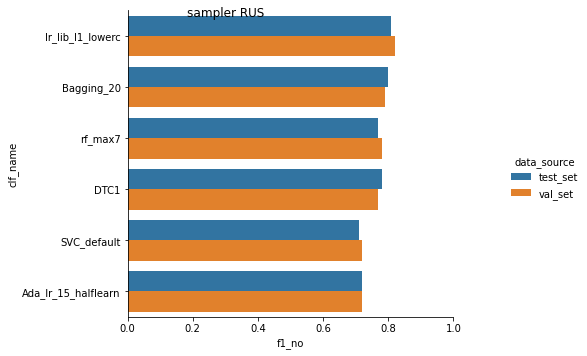

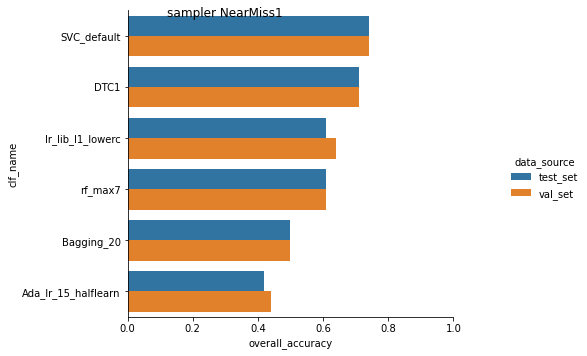

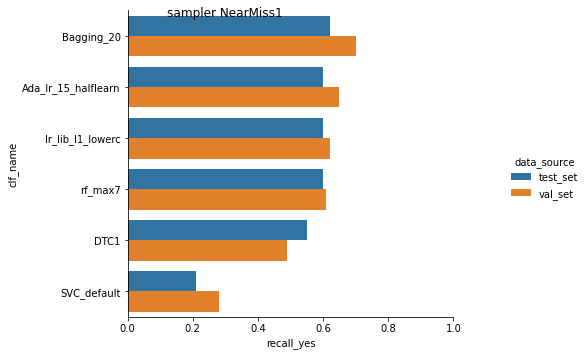

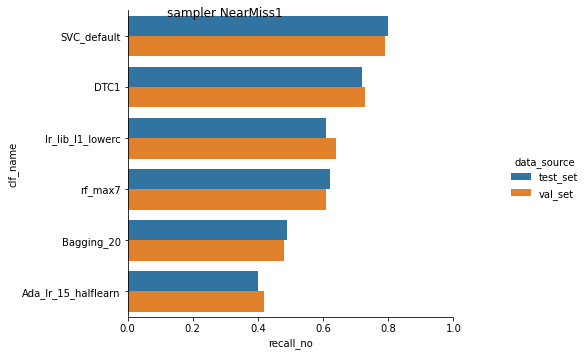

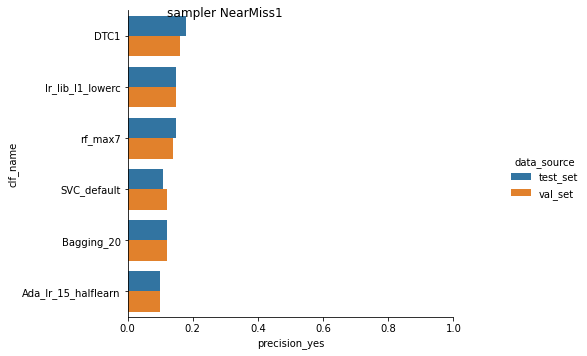

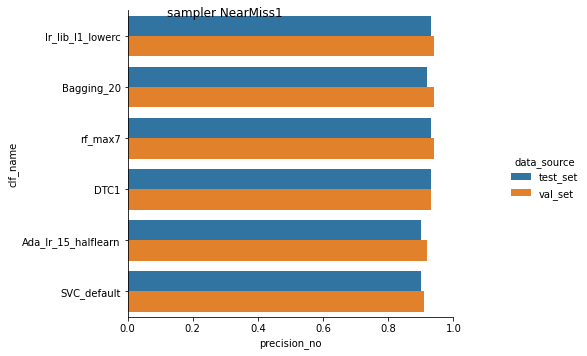

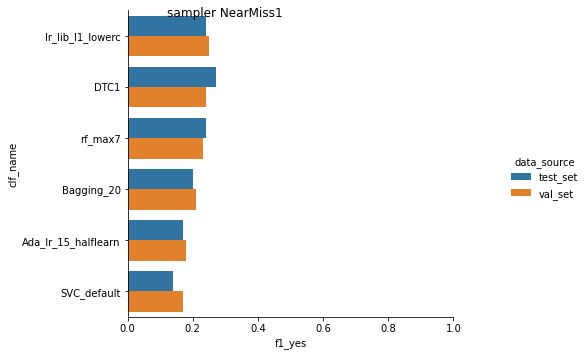

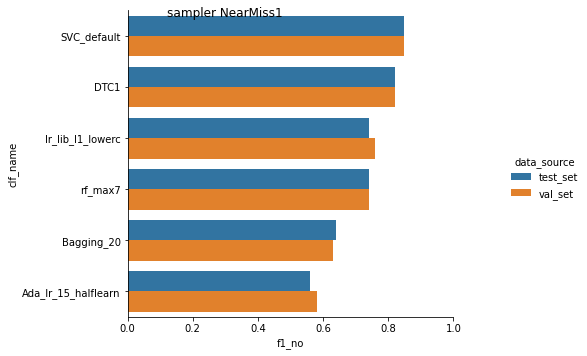

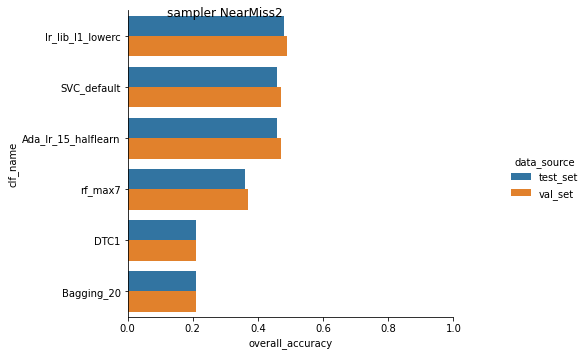

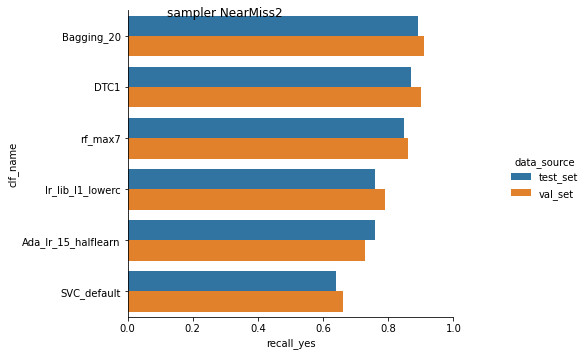

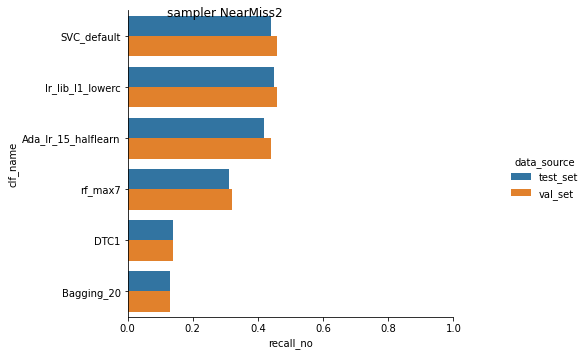

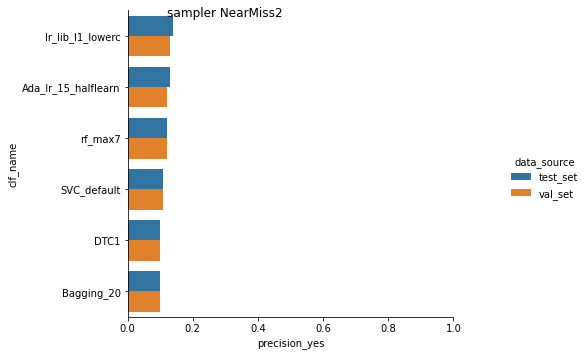

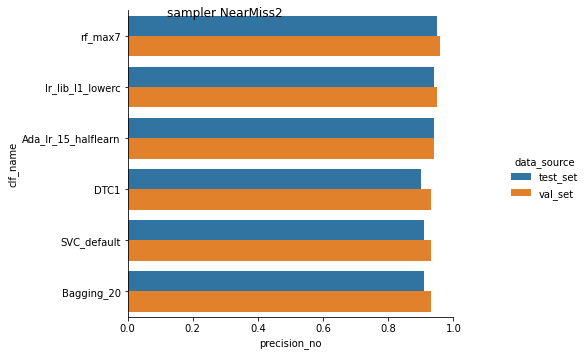

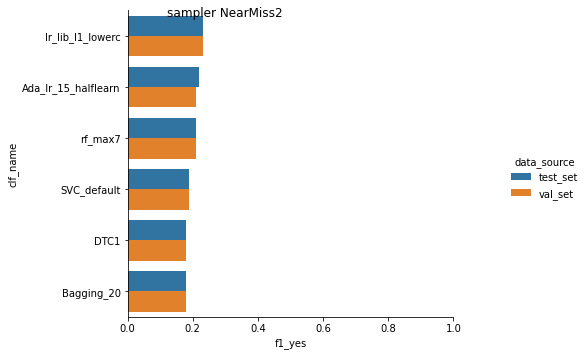

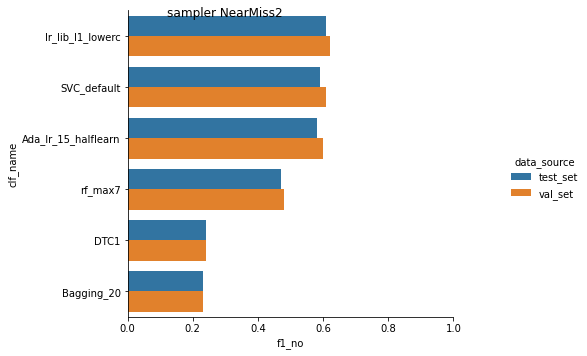

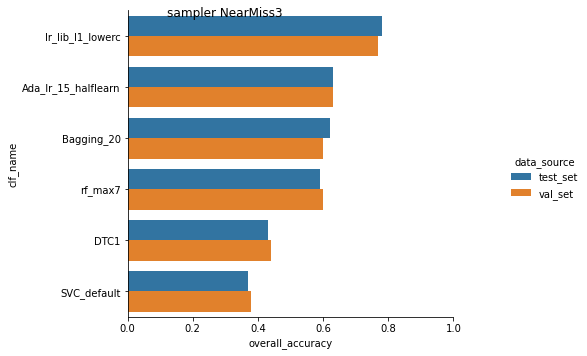

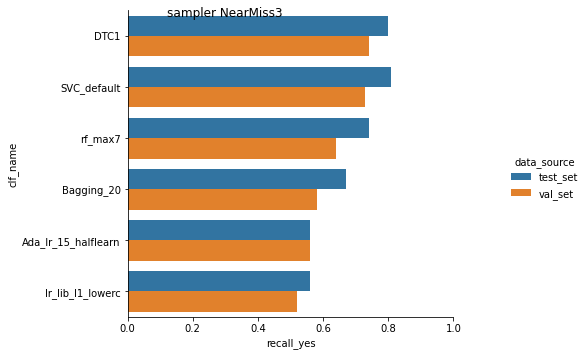

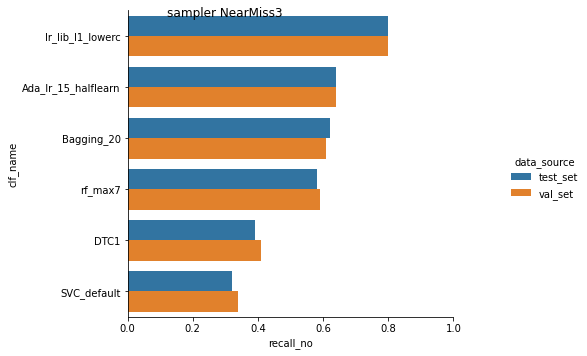

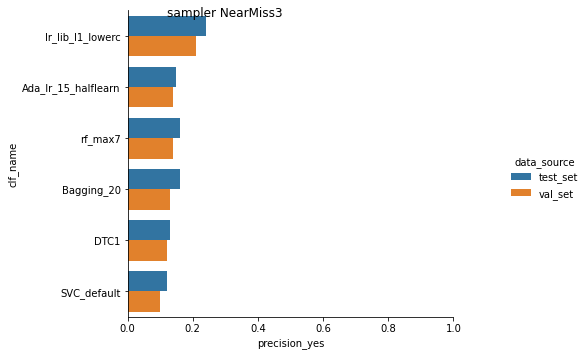

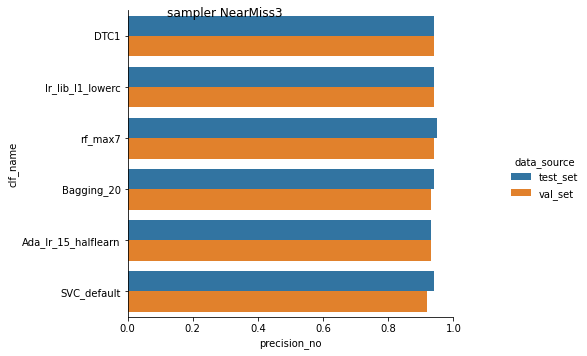

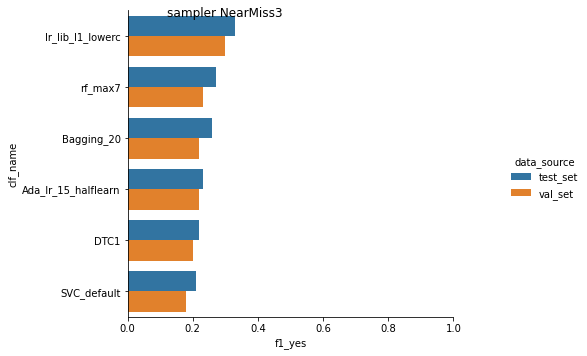

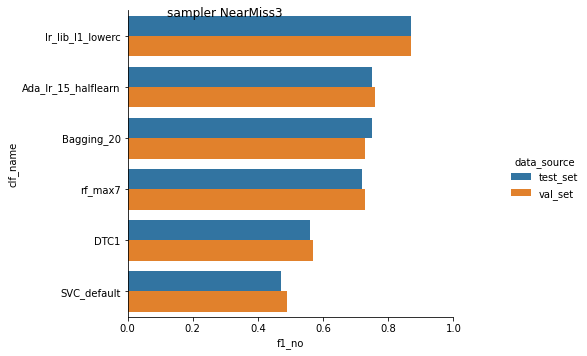

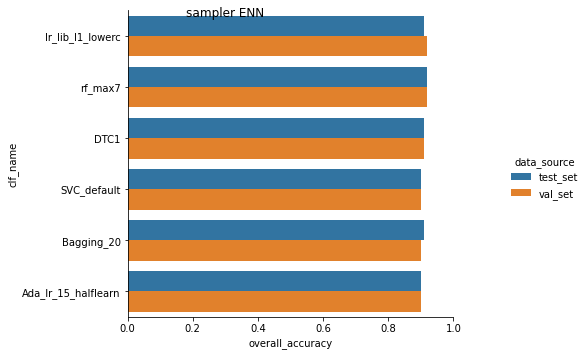

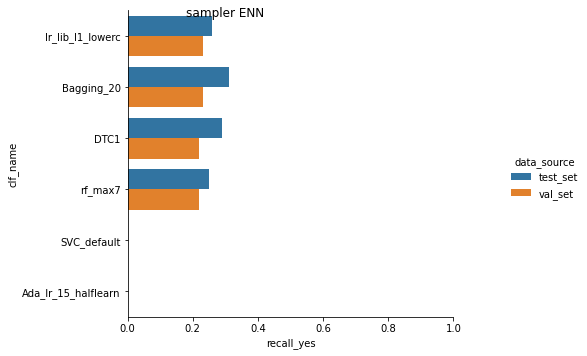

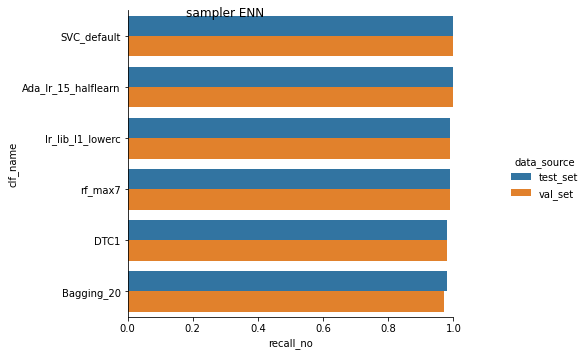

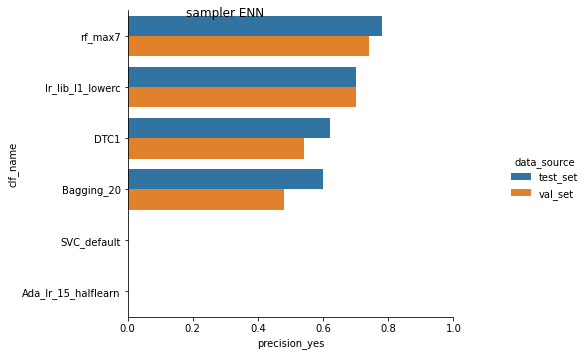

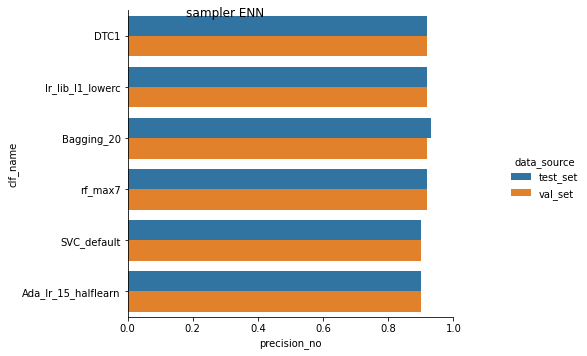

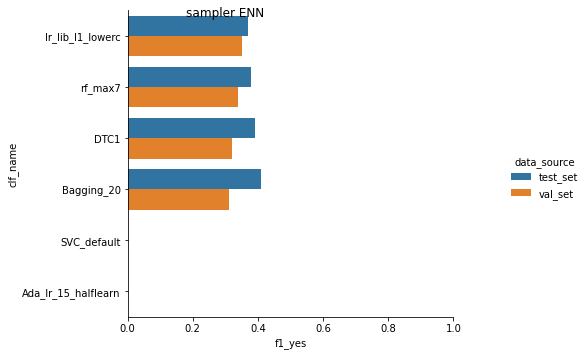

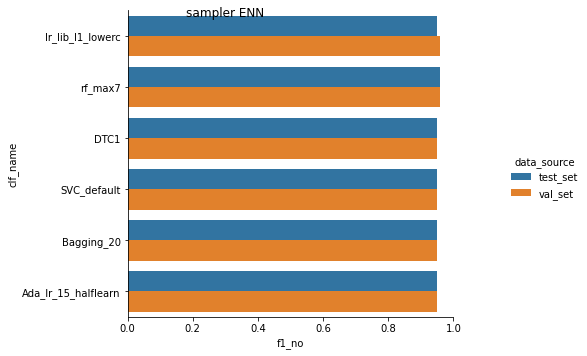

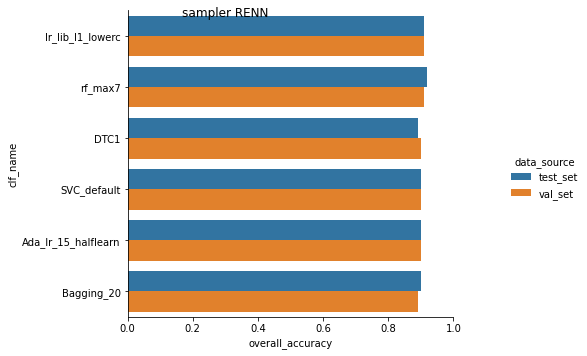

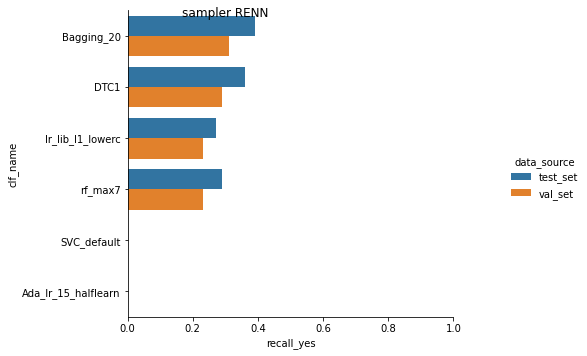

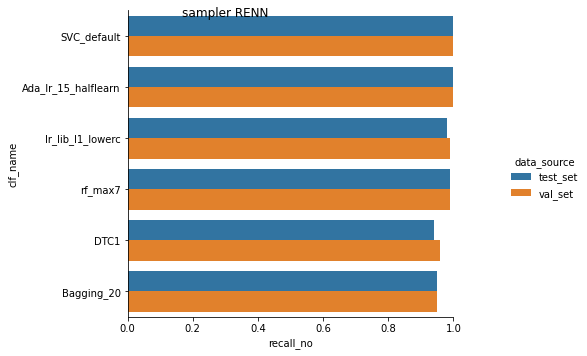

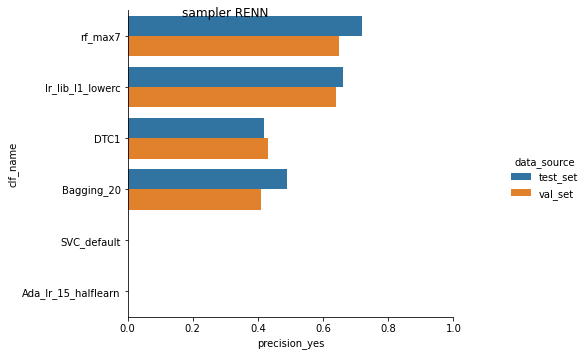

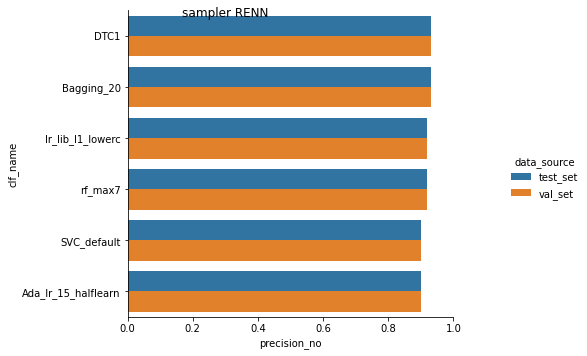

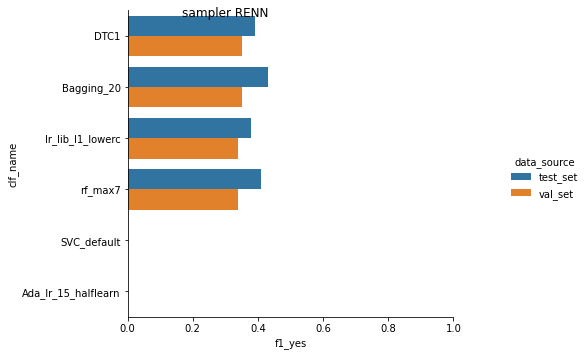

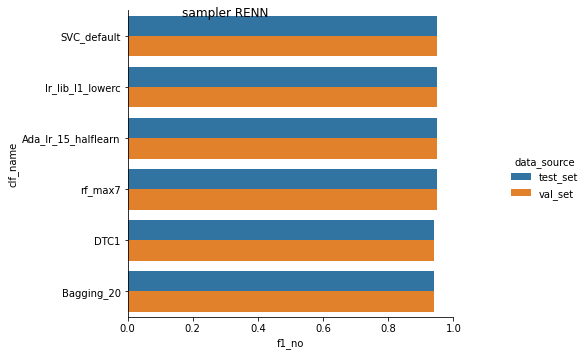

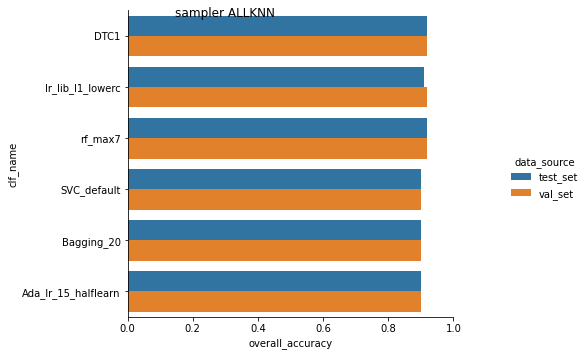

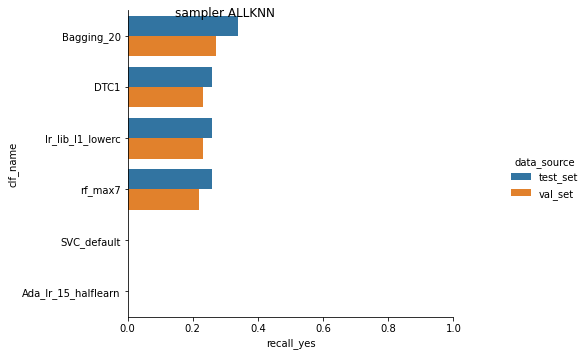

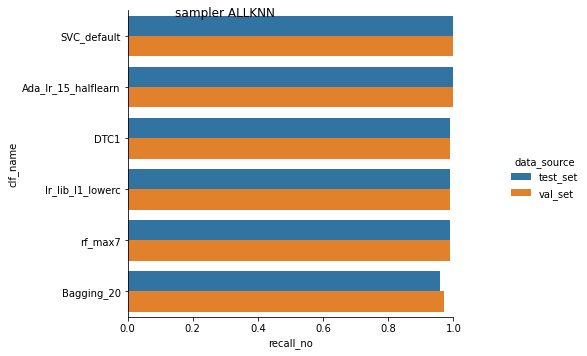

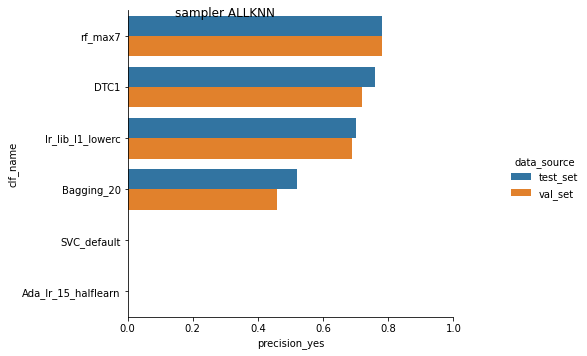

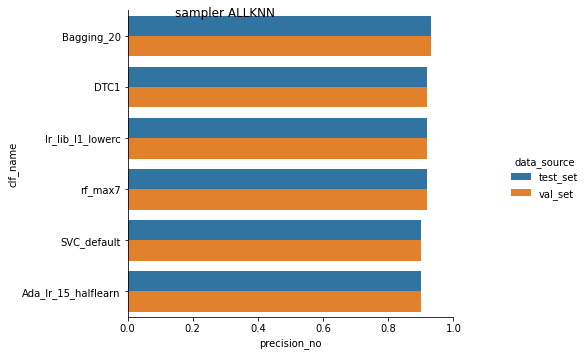

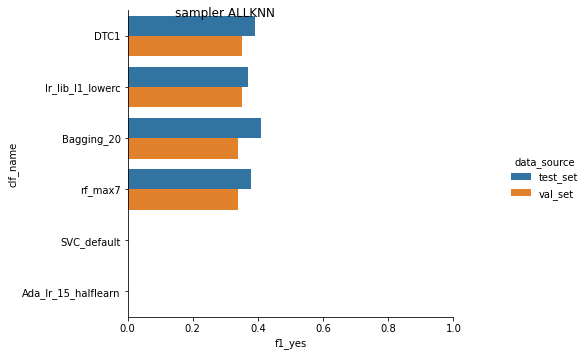

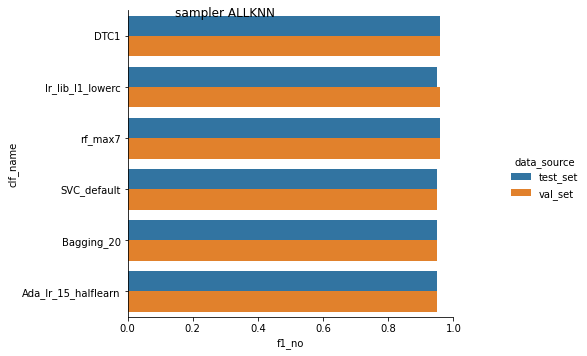

In [73]:
# Evaluate undersampling techniques on df1
print('For df1:\n')
fun_multi_clf_sampler_all_tasks(usampler_list,usampler_name_list,clf_list4,clf_name_list4,X_train1.values,y_train1,X_val1,y_val1,X_test1,y_test1,'data_source')

For df2:

Sampler:  RandomUnderSampler(random_state=42) 

y value counts of resampled train set
 No     185
Yes    185
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
5              rf_max7             0.76            0.79
2     lr_lib_l1_lowerc             0.74            0.75
0                 DTC1             0.72            0.73
3           Bagging_20             0.72            0.73
4  Ada_lr_15_halflearn             0.63            0.61
1          SVC_default             0.48            0.46 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
1          SVC_default             0.75            0.65
4  Ada_lr_15_halflearn             0.68            0.56
0                 DTC1             0.65            0.67
5              rf_max7             0.65            0.57
2     lr_lib_l1_lowerc             0.60            0.67


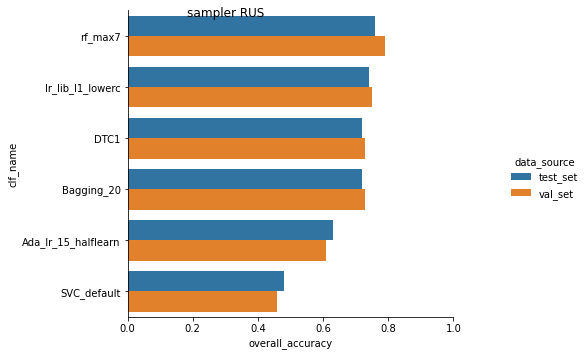

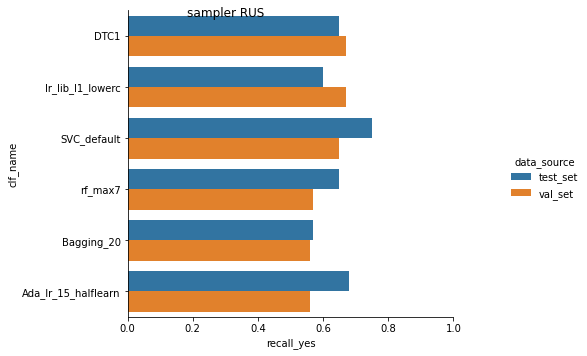

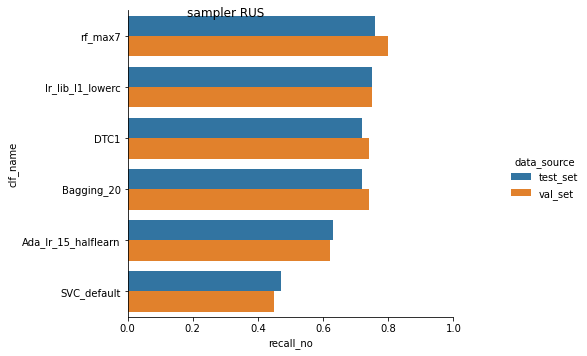

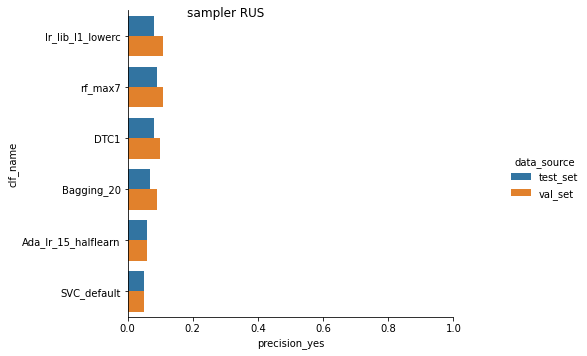

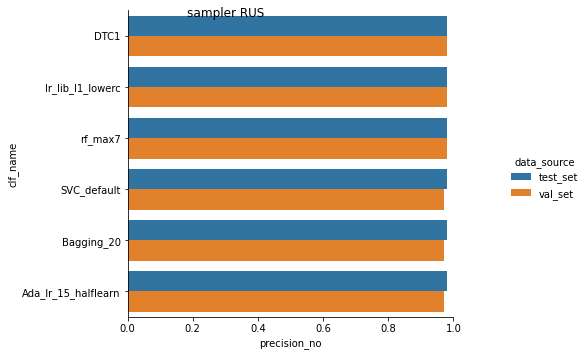

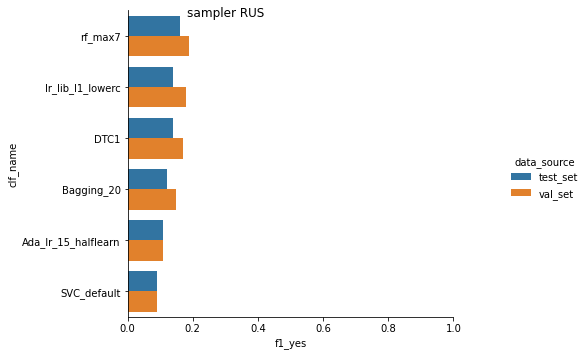

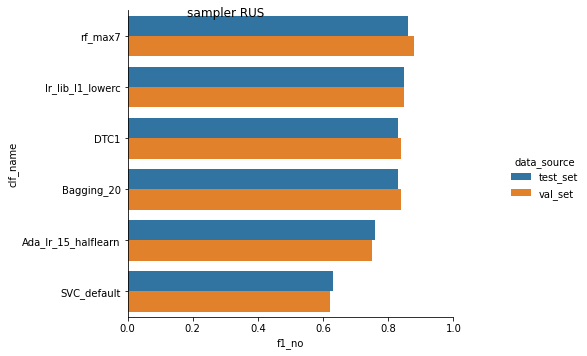

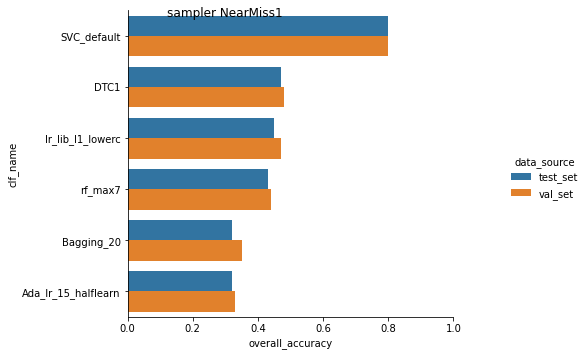

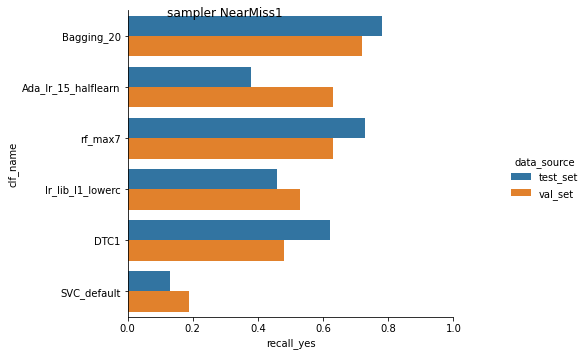

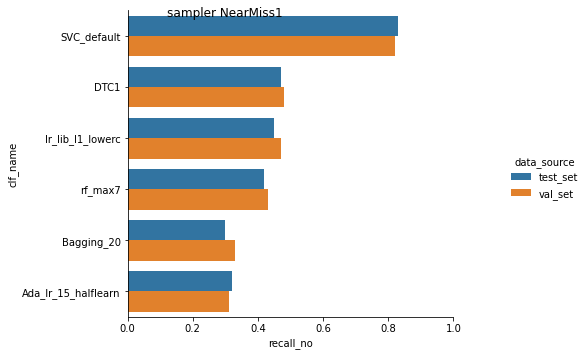

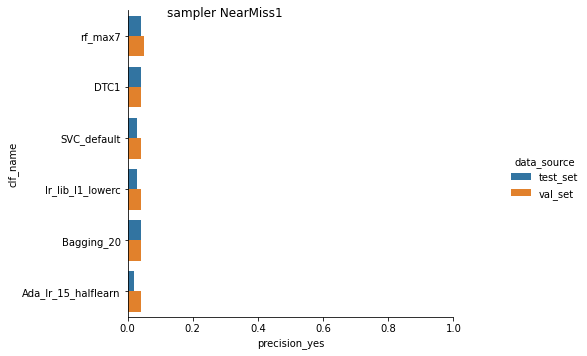

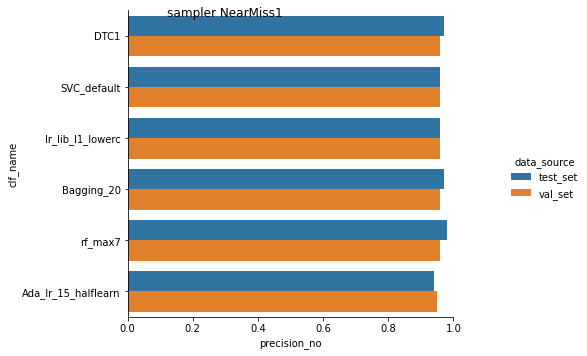

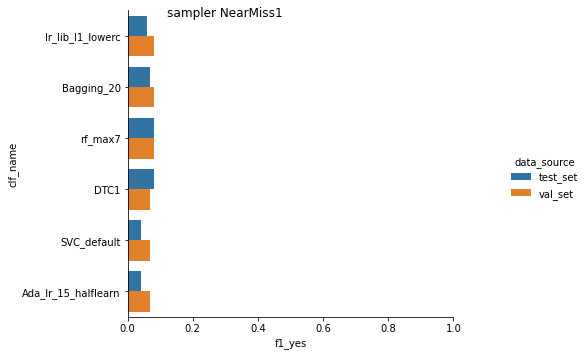

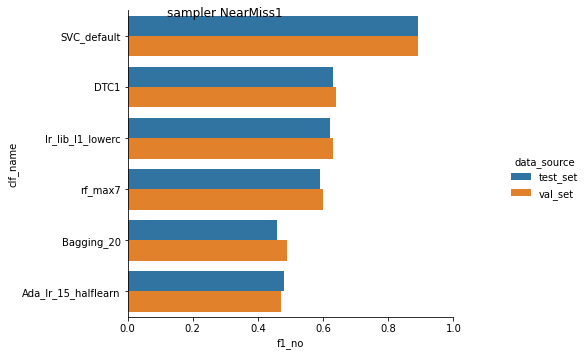

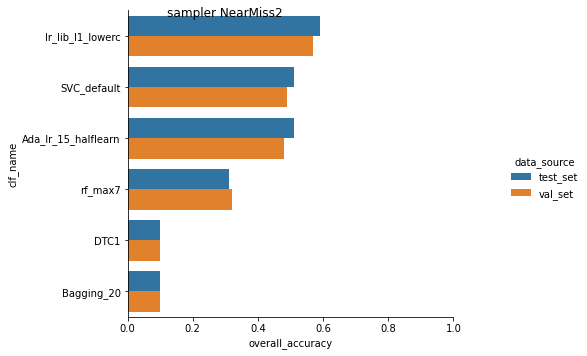

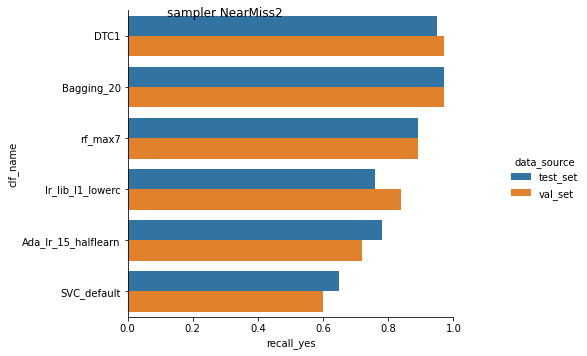

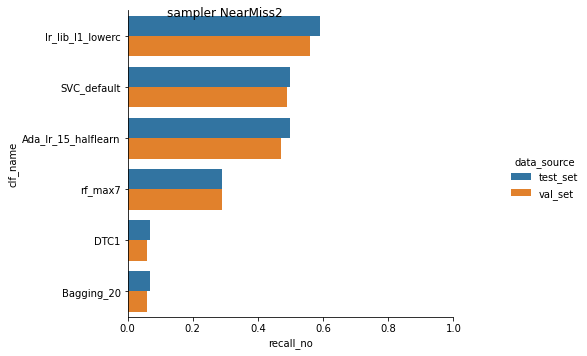

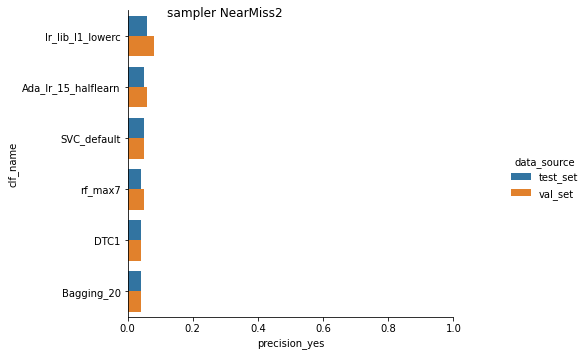

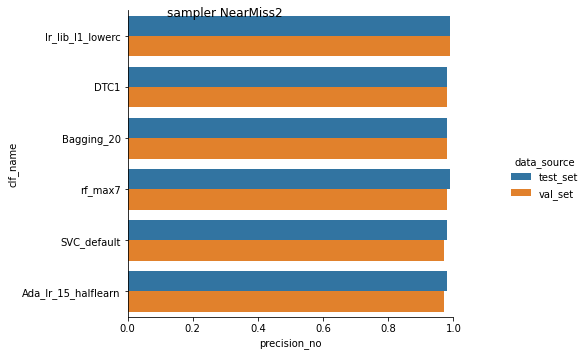

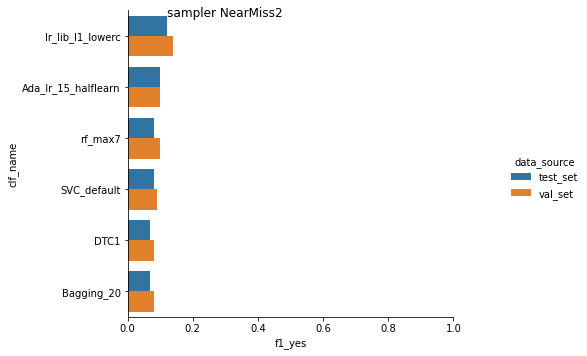

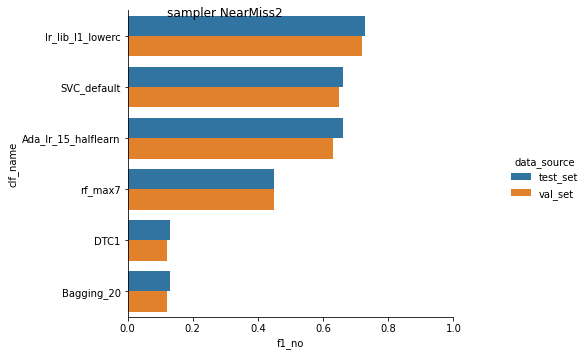

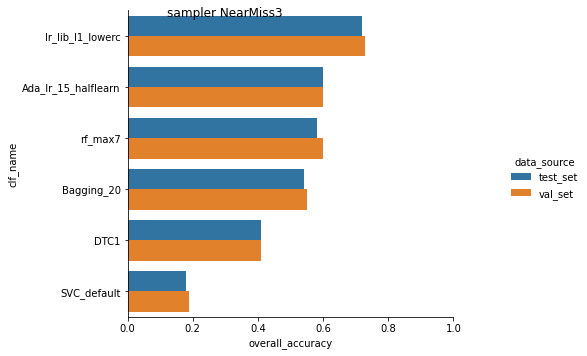

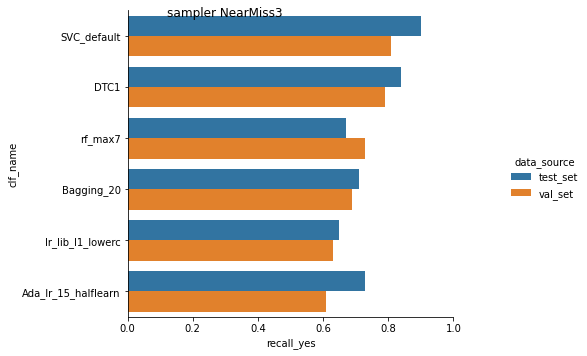

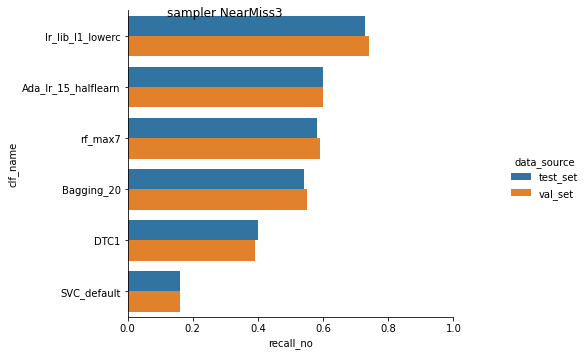

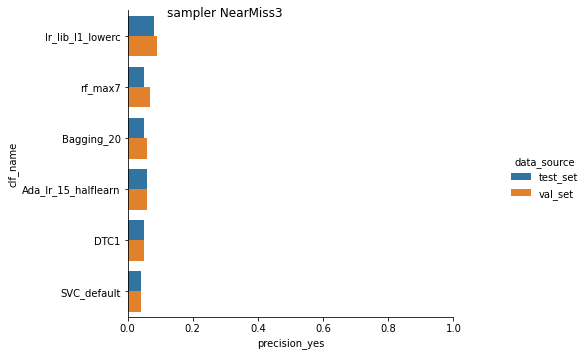

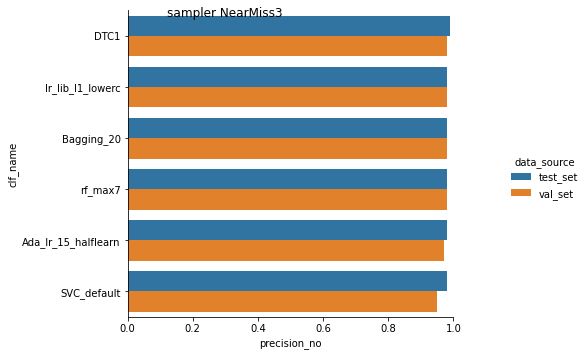

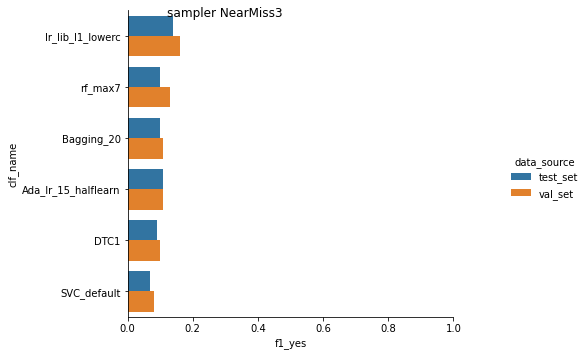

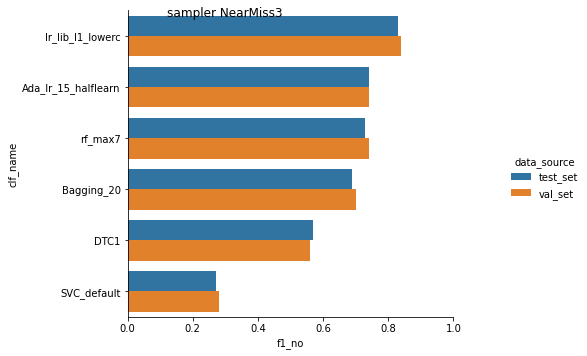

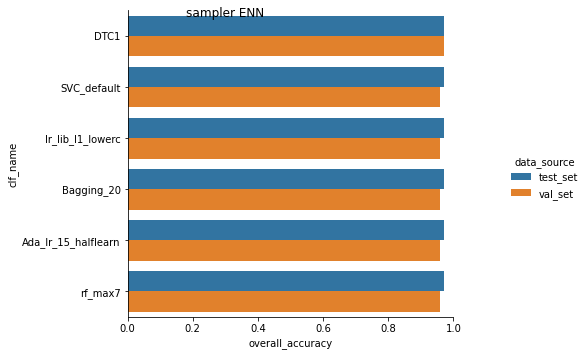

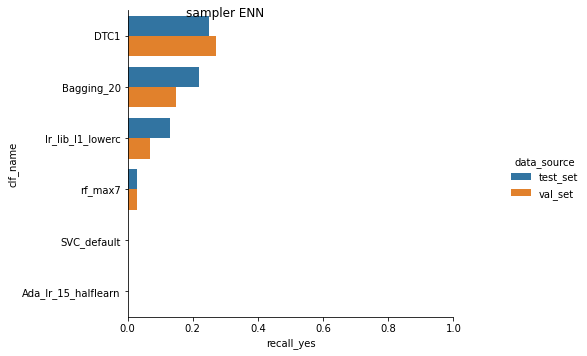

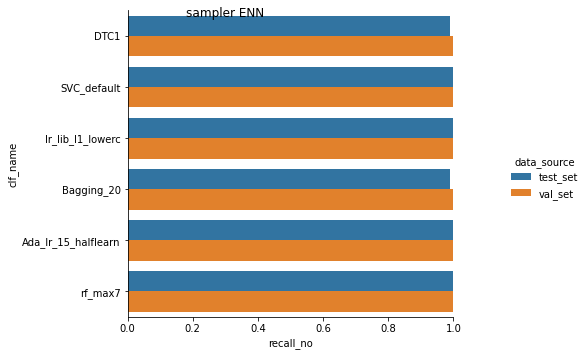

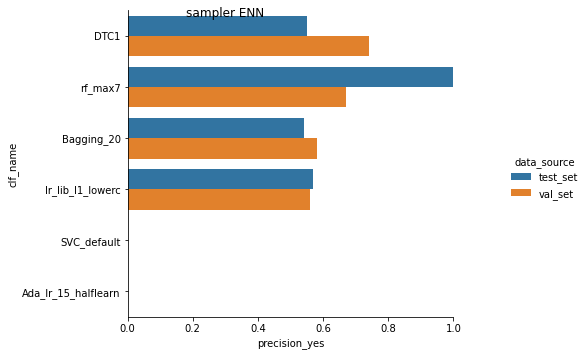

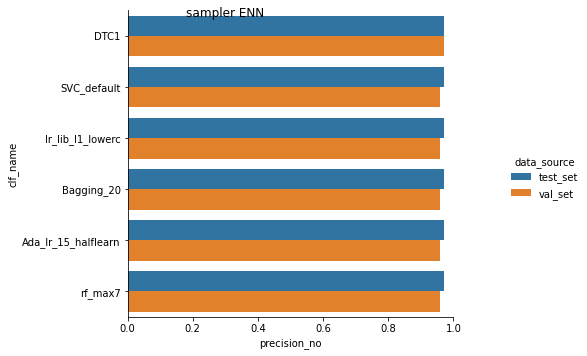

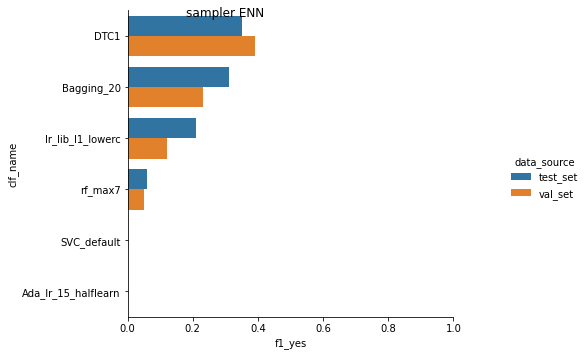

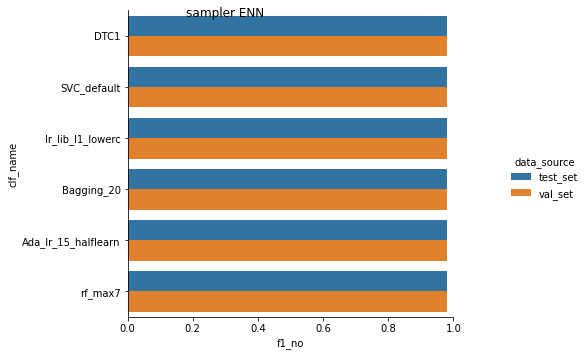

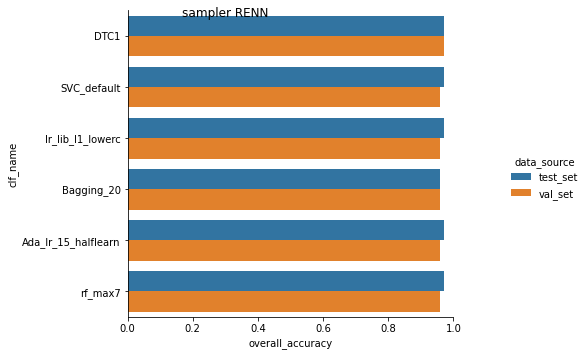

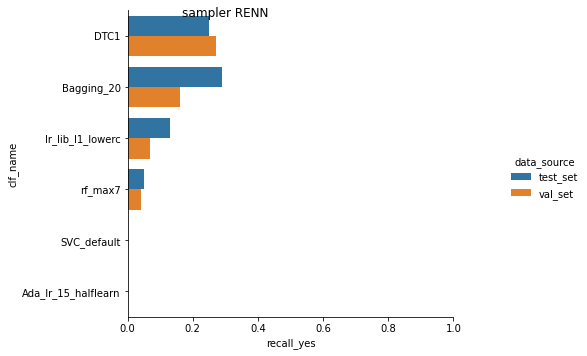

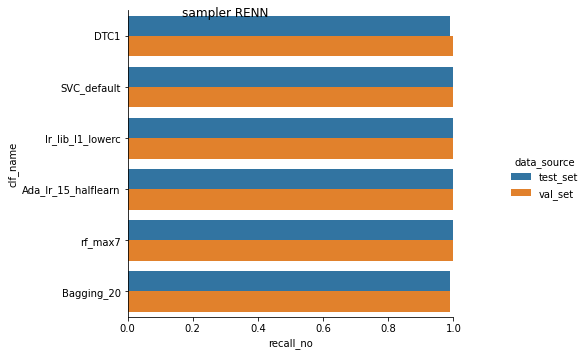

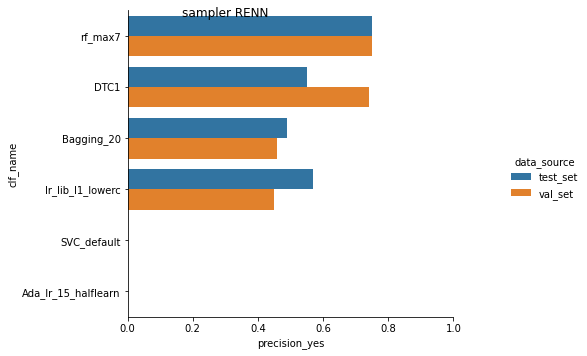

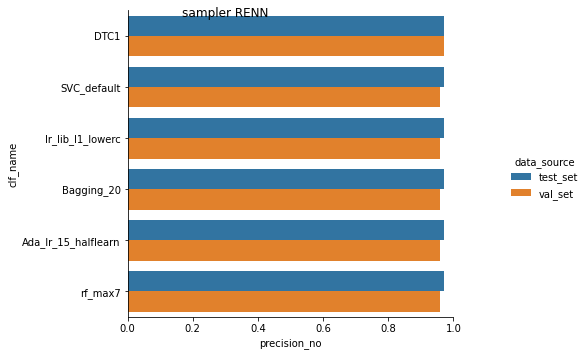

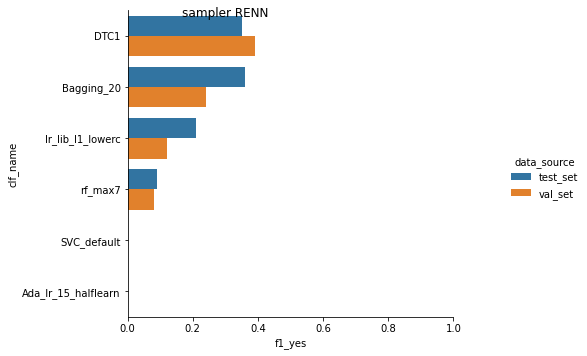

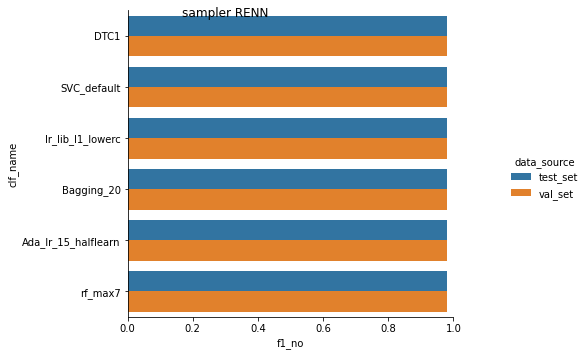

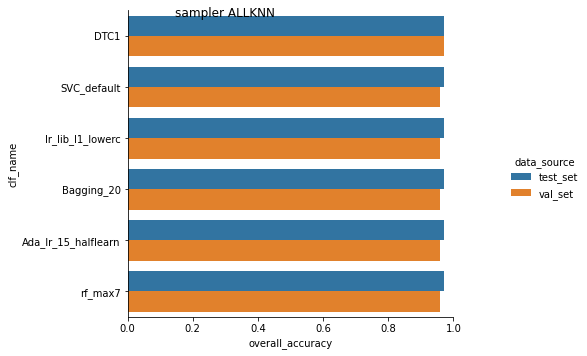

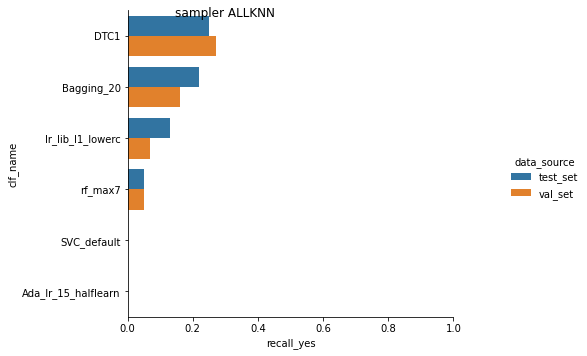

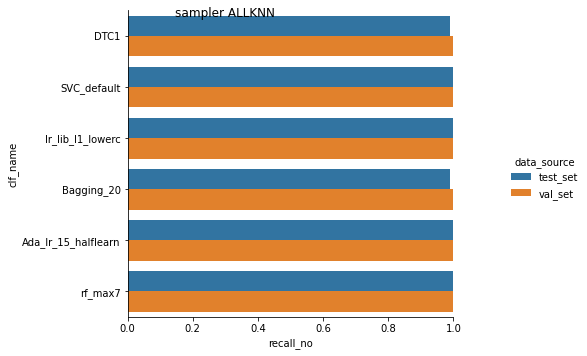

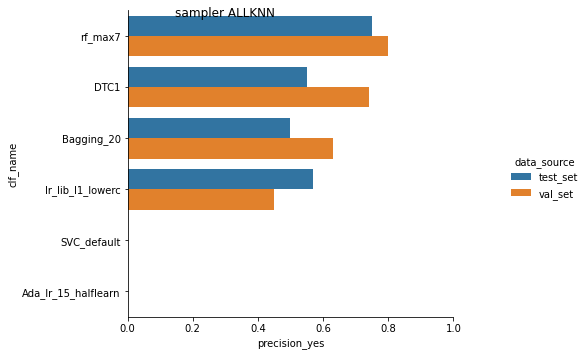

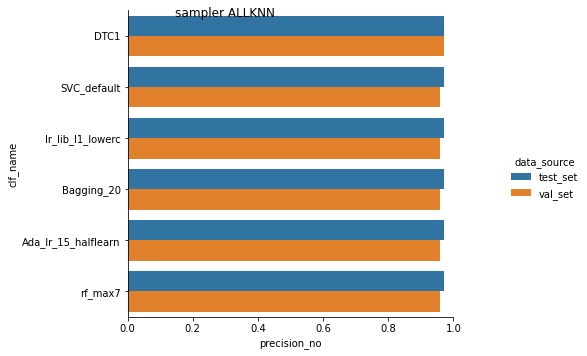

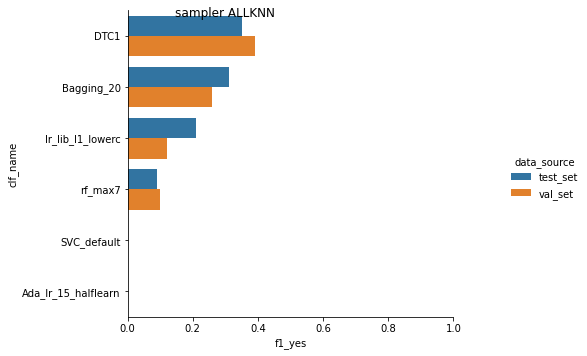

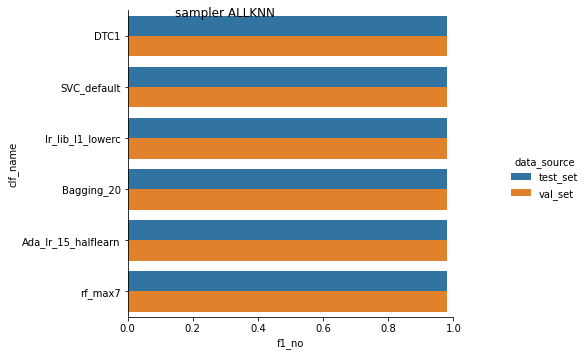

In [74]:
# Evaluate undersampling techniques on df2
print('For df2:\n')
fun_multi_clf_sampler_all_tasks(usampler_list,usampler_name_list,clf_list4,clf_name_list4,X_train2.values,y_train2,X_val2,y_val2,X_test2,y_test2,'data_source')

**Evaluating techniques that combine oversampling and undersampling**

For df:

Sampler:  SMOTEENN(random_state=42) 

y value counts of resampled train set
 Yes    4175
No     2670
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
2     lr_lib_l1_lowerc             0.86            0.84
3           Bagging_20             0.83            0.81
5              rf_max7             0.75            0.75
0                 DTC1             0.70            0.70
4  Ada_lr_15_halflearn             0.51            0.51
1          SVC_default             0.37            0.36 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
1          SVC_default             0.85            0.83
4  Ada_lr_15_halflearn             0.75            0.75
0                 DTC1             0.59            0.55
5              rf_max7             0.56            0.54
3           Bagging_20             0.39            0.33
2     lr_

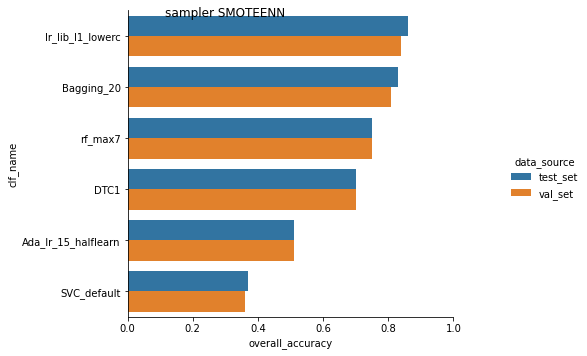

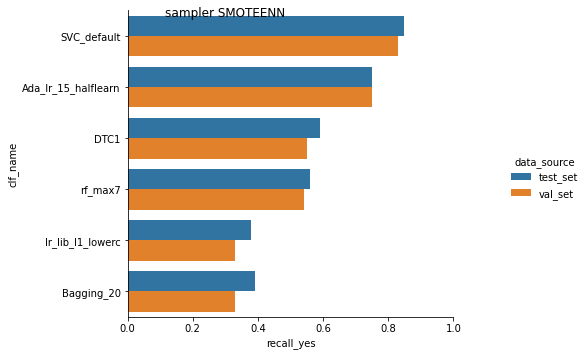

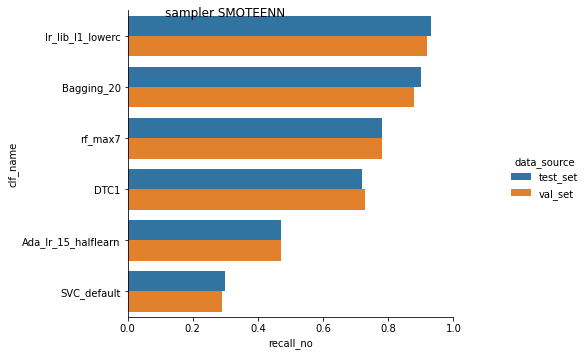

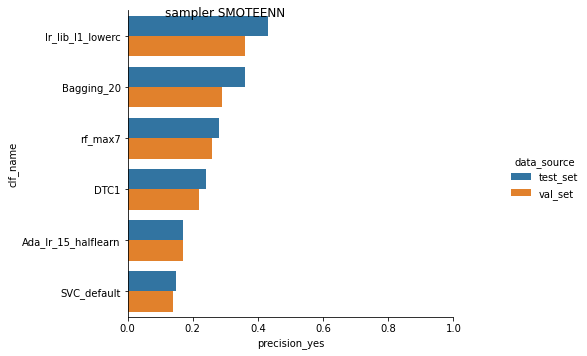

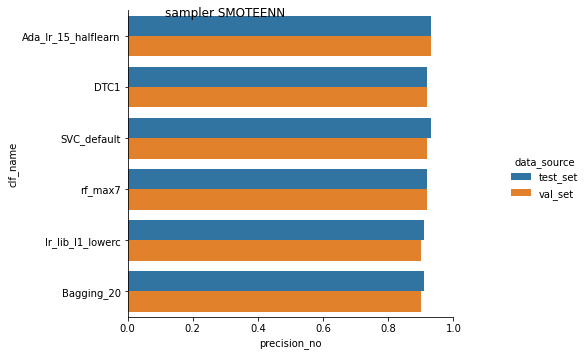

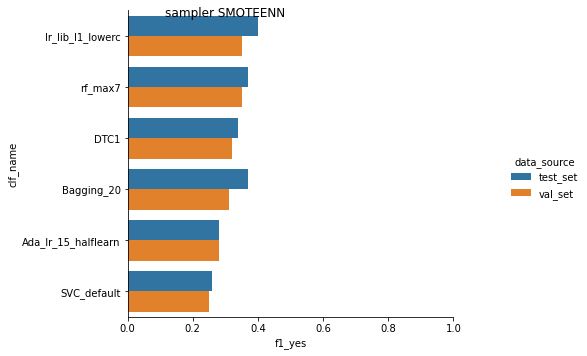

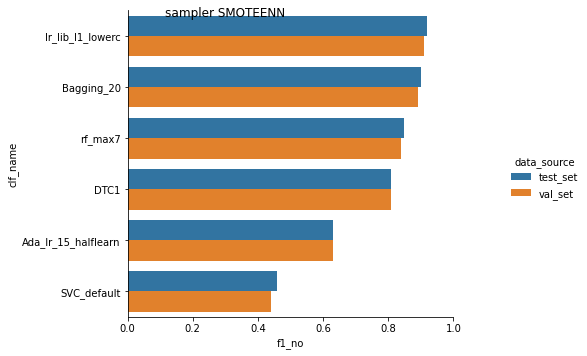

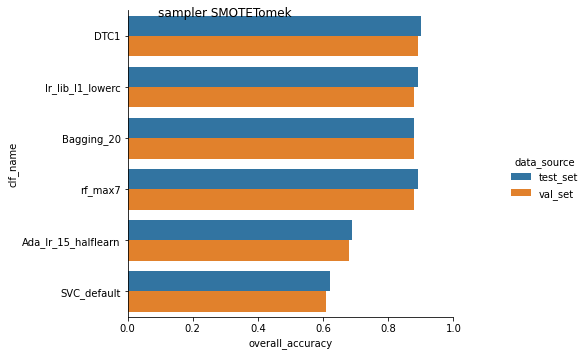

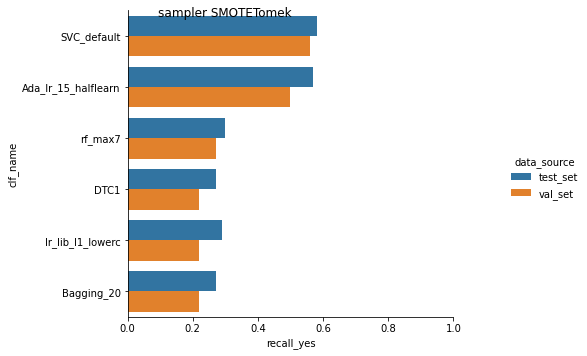

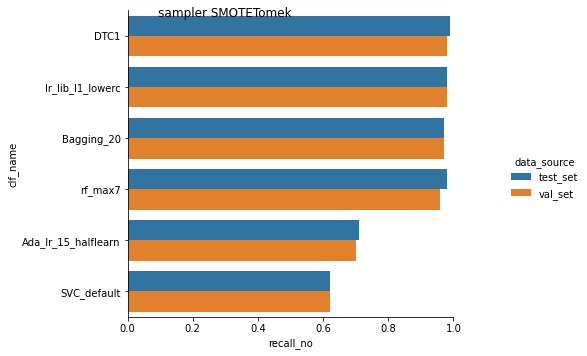

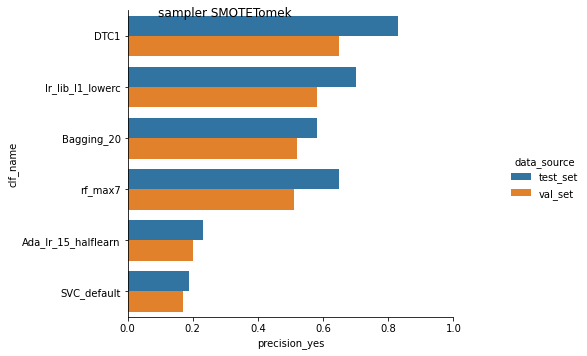

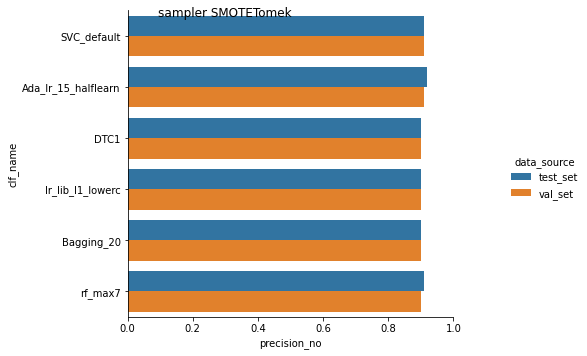

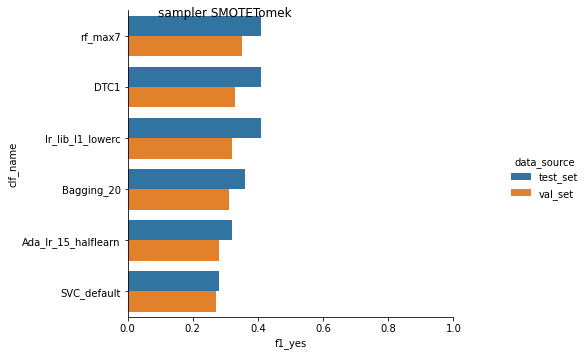

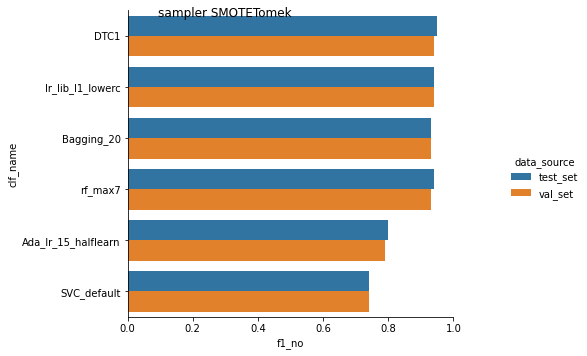

In [75]:
# Evaluate combined resampling techniques on original df
print('For df:\n')
fun_multi_clf_sampler_all_tasks(csampler_list,csampler_name_list,clf_list4,clf_name_list4,X_train.values,y_train,X_val,y_val,X_test,y_test,'data_source')

For df1:

Sampler:  SMOTEENN(random_state=42) 

y value counts of resampled train set
 Yes    4305
No     2949
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
2     lr_lib_l1_lowerc             0.90            0.90
3           Bagging_20             0.89            0.88
5              rf_max7             0.83            0.82
0                 DTC1             0.71            0.70
4  Ada_lr_15_halflearn             0.51            0.51
1          SVC_default             0.33            0.34 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
1          SVC_default             0.87            0.86
4  Ada_lr_15_halflearn             0.77            0.72
0                 DTC1             0.61            0.55
5              rf_max7             0.49            0.38
3           Bagging_20             0.36            0.30
2     lr

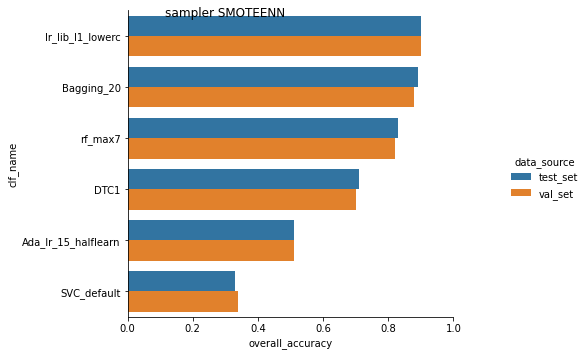

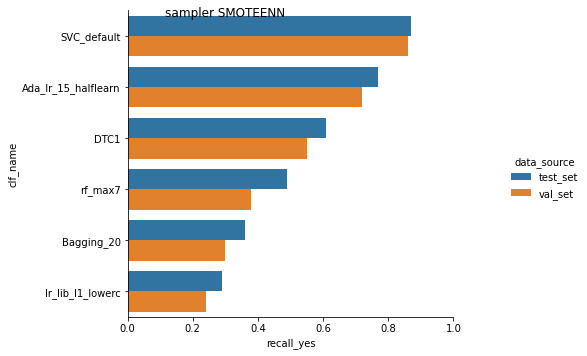

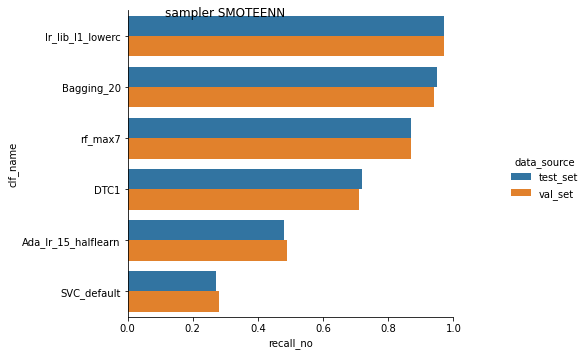

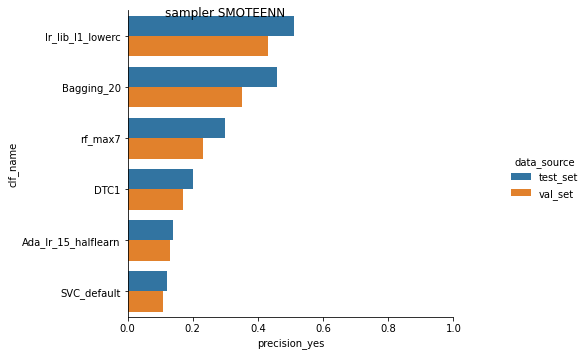

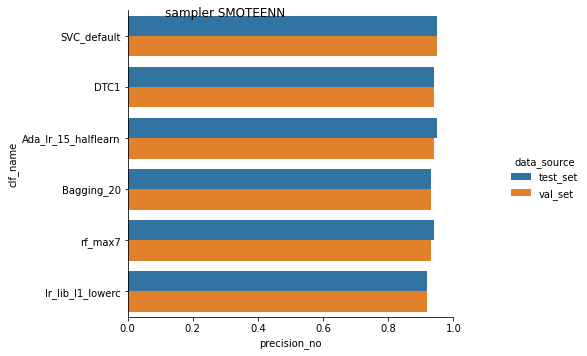

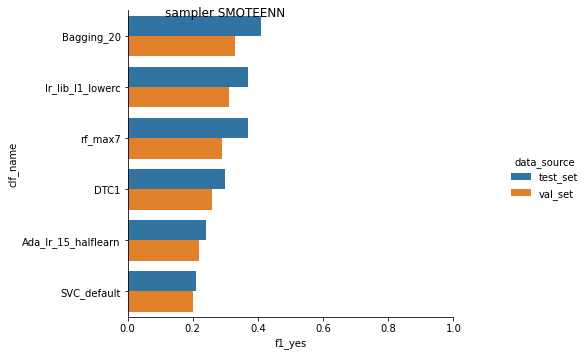

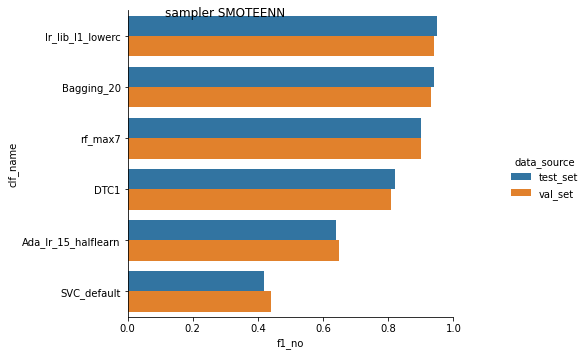

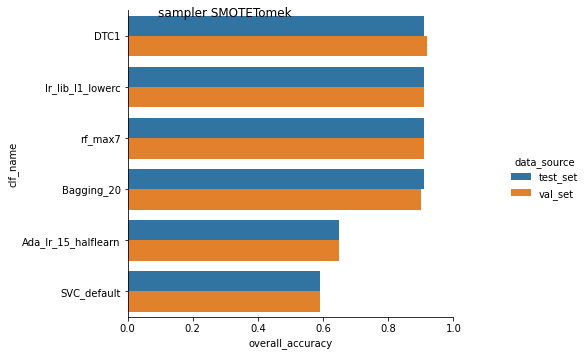

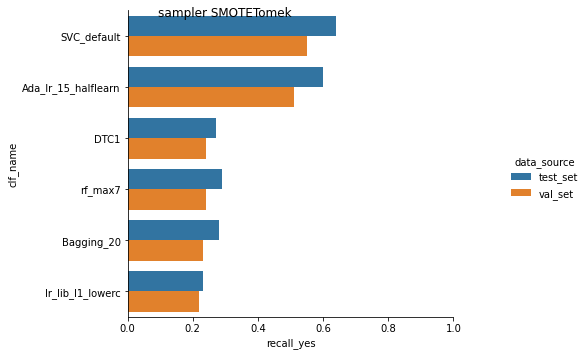

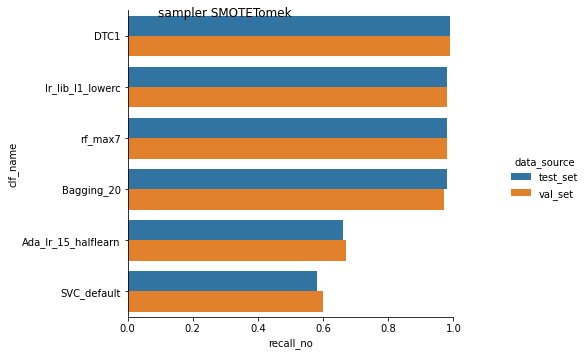

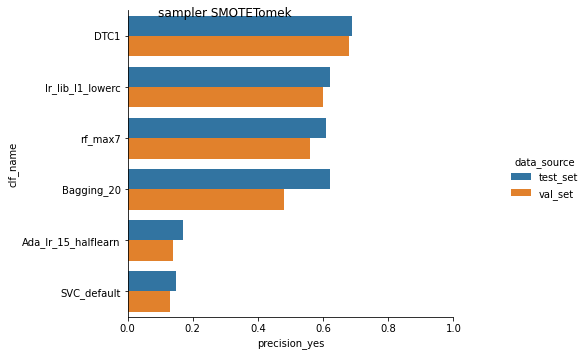

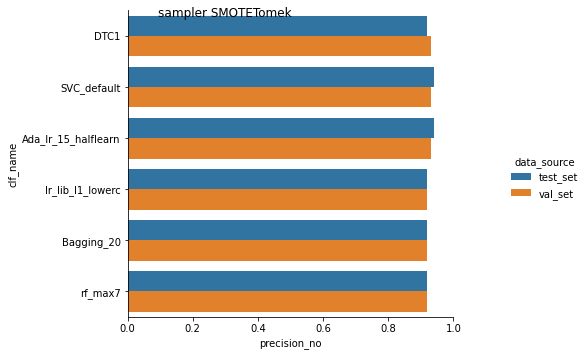

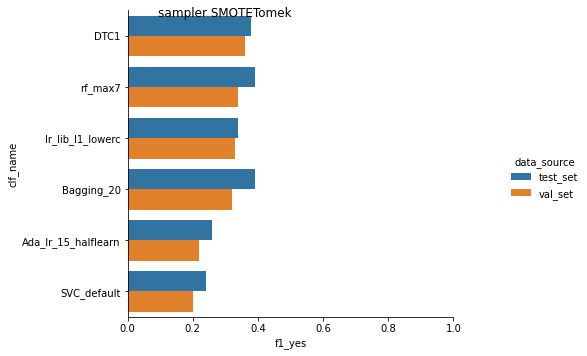

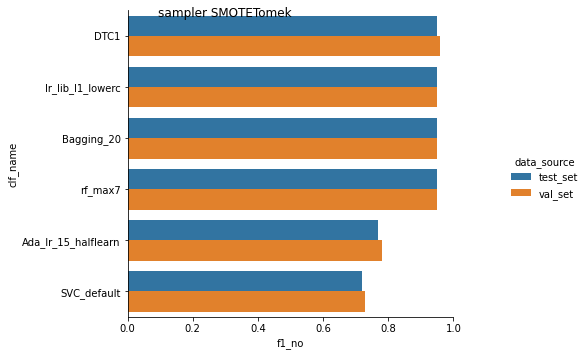

In [76]:
# Evaluate combined resampling techniques on df1
print('For df1:\n')
fun_multi_clf_sampler_all_tasks(csampler_list,csampler_name_list,clf_list4,clf_name_list4,X_train1.values,y_train1,X_val1,y_val1,X_test1,y_test1,'data_source')

For df2:

Sampler:  SMOTEENN(random_state=42) 

y value counts of resampled train set
 Yes    4549
No     3467
Name: IsBadBuy, dtype: int64 

overall_accuracy from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
2     lr_lib_l1_lowerc             0.96            0.95
3           Bagging_20             0.95            0.94
5              rf_max7             0.94            0.94
0                 DTC1             0.69            0.70
4  Ada_lr_15_halflearn             0.54            0.52
1          SVC_default             0.30            0.30 

recall_yes from test (left) and from validation (right)

              clf_name  test_set_result  val_set_result
1          SVC_default             0.86            0.76
4  Ada_lr_15_halflearn             0.78            0.68
0                 DTC1             0.62            0.55
5              rf_max7             0.40            0.31
3           Bagging_20             0.24            0.28
2     lr

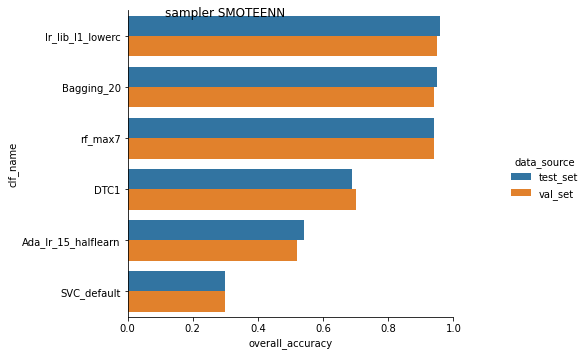

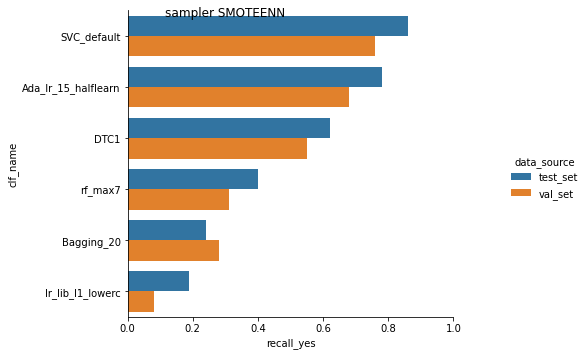

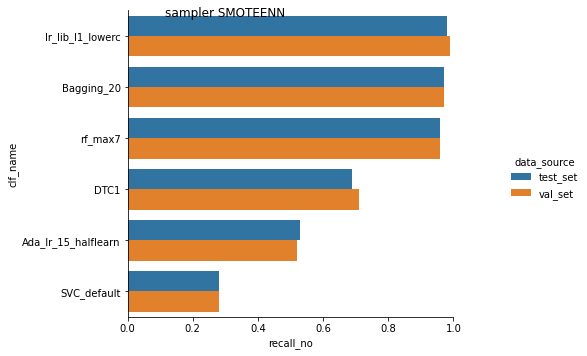

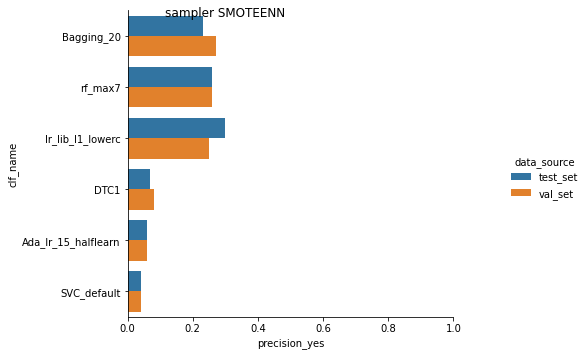

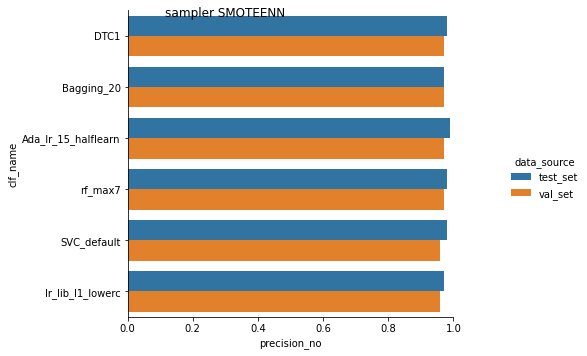

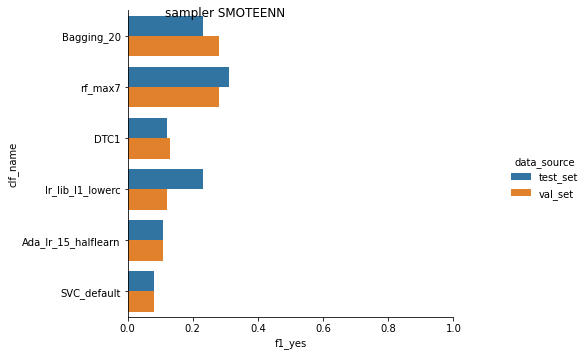

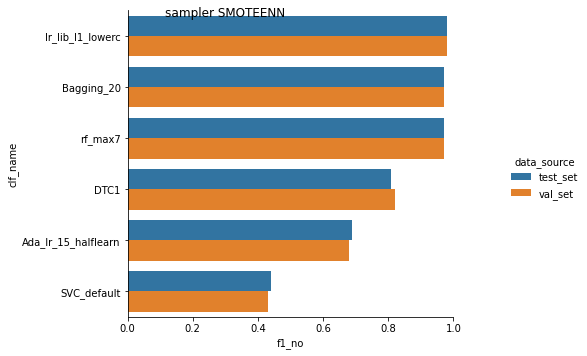

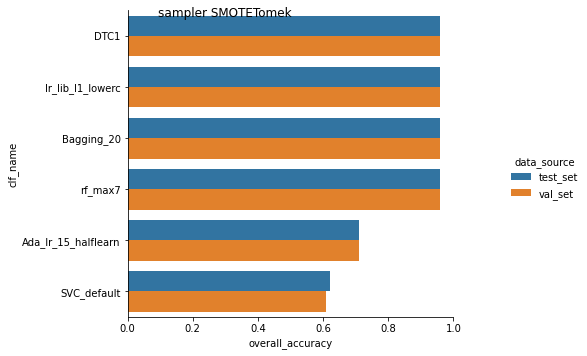

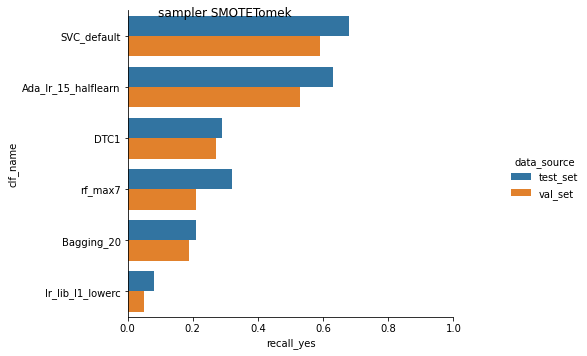

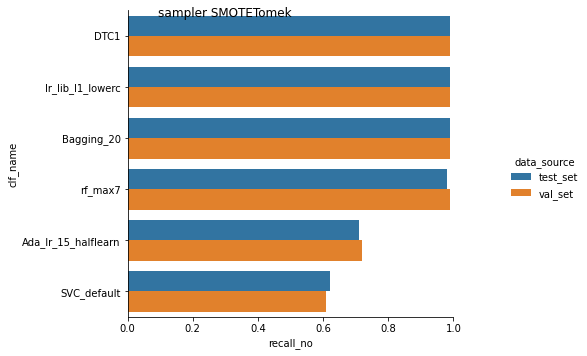

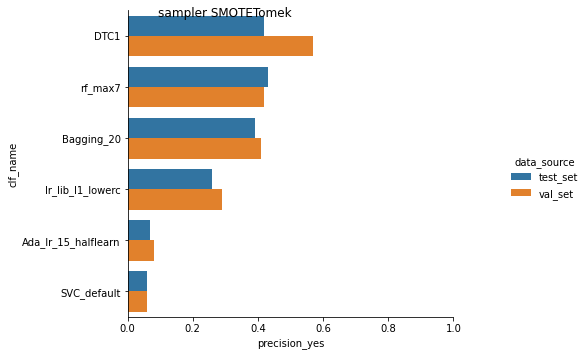

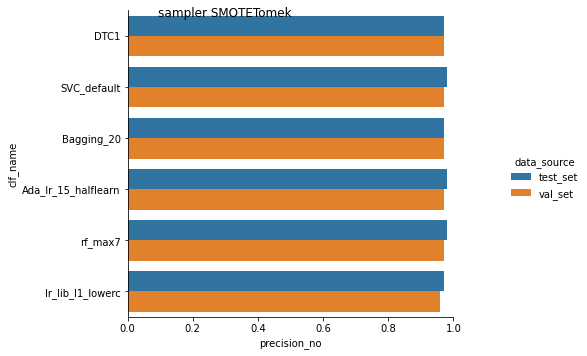

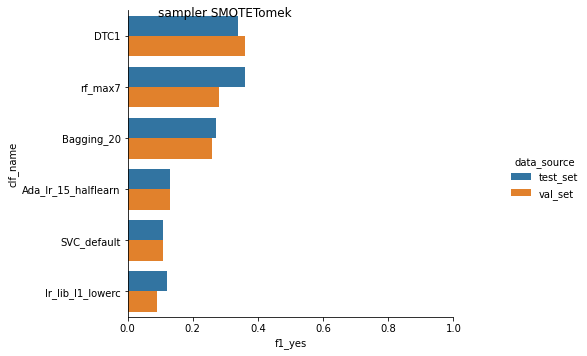

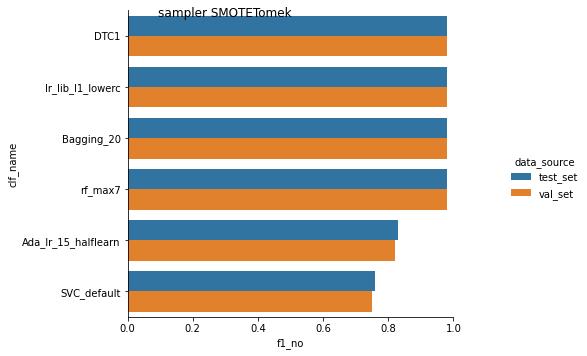

In [77]:
# Evaluate combined resampling techniques on df2
print('For df2:\n')
fun_multi_clf_sampler_all_tasks(csampler_list,csampler_name_list,clf_list4,clf_name_list4,X_train2.values,y_train2,X_val2,y_val2,X_test2,y_test2,'data_source')

**Balanced ensemble classifiers**

Note the data is automatically balanced with these classifiers, so the function will have "None" for the resampler parameter.

For df:

overall_accuracy from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0        Balanced_Bagging             0.79            0.79
1                RUSBoost             0.72            0.72
2  EasyEnsembleClassifier             0.71            0.71 

recall_yes from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
1                RUSBoost             0.57            0.56
2  EasyEnsembleClassifier             0.57            0.58
0        Balanced_Bagging             0.43            0.41 

recall_no from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0        Balanced_Bagging             0.84            0.84
1                RUSBoost             0.75            0.75
2  EasyEnsembleClassifier             0.73            0.73 

precision_yes from test (left) and from validation (right)

                 clf_name  test_set_resul

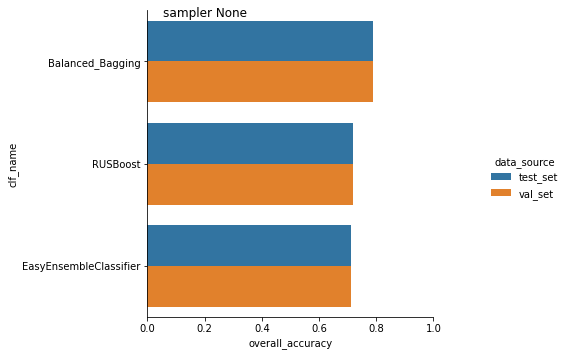

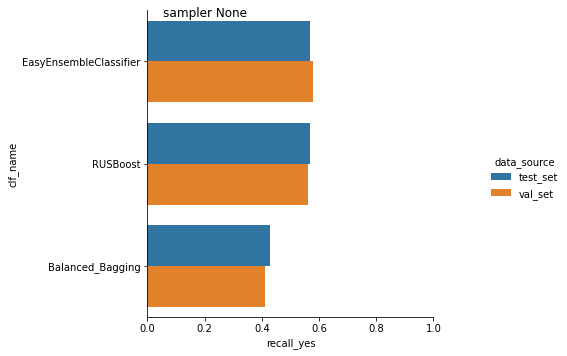

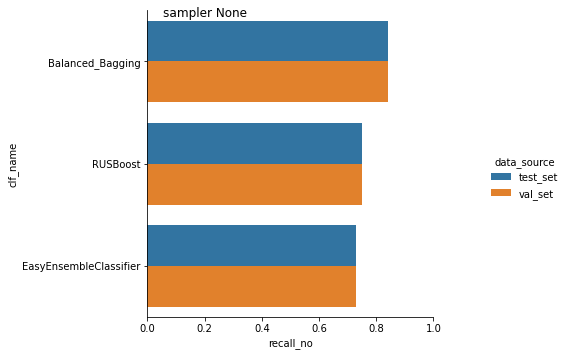

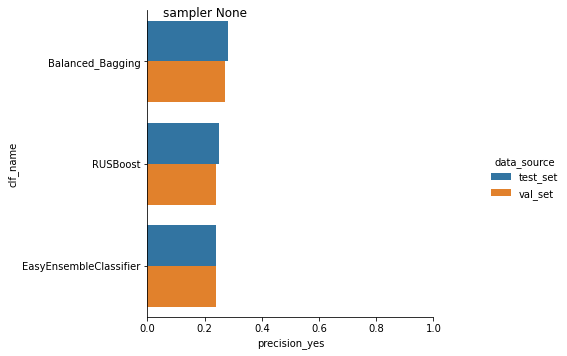

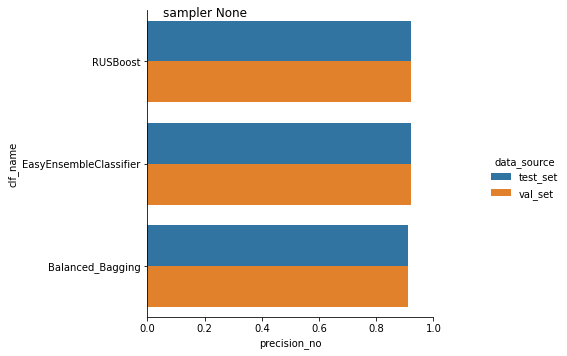

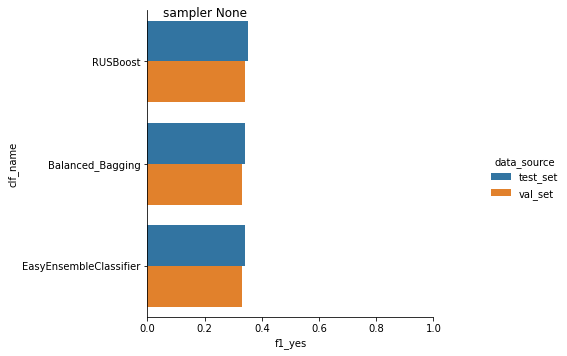

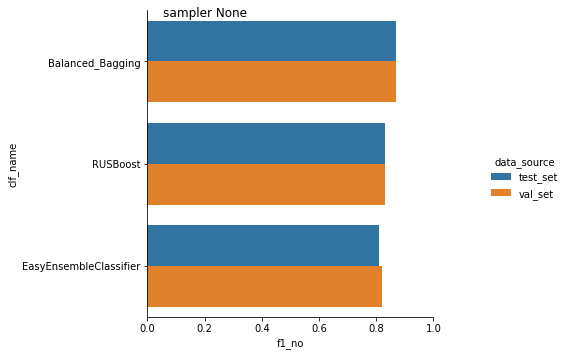

In [78]:
# Evaluate balanced ensemble classifiers on original df
print('For df:\n')
fun_split_val_multi_clf_all_tasks('None',be_clf_list, be_clf_name_list,X_train,y_train,X_val,y_val,X_test,y_test,'data_source')

For df1:

overall_accuracy from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0        Balanced_Bagging             0.82            0.81
2  EasyEnsembleClassifier             0.72            0.71
1                RUSBoost             0.62            0.63 

recall_yes from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
1                RUSBoost             0.67            0.61
2  EasyEnsembleClassifier             0.64            0.59
0        Balanced_Bagging             0.51            0.43 

recall_no from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0        Balanced_Bagging             0.86            0.85
2  EasyEnsembleClassifier             0.72            0.72
1                RUSBoost             0.61            0.64 

precision_yes from test (left) and from validation (right)

                 clf_name  test_set_resu

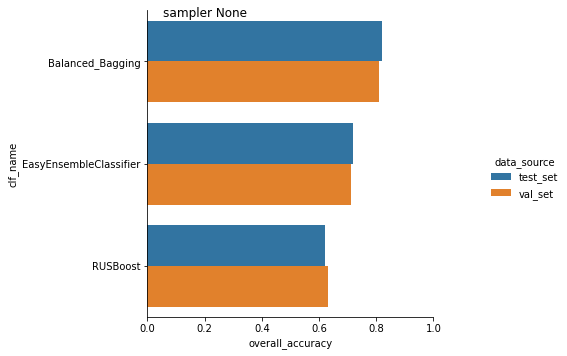

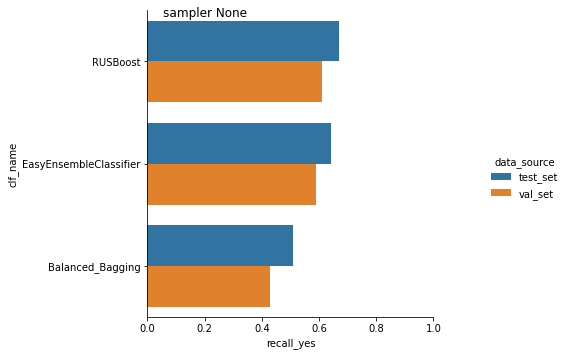

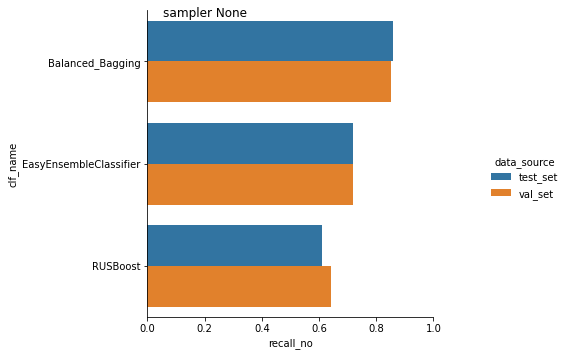

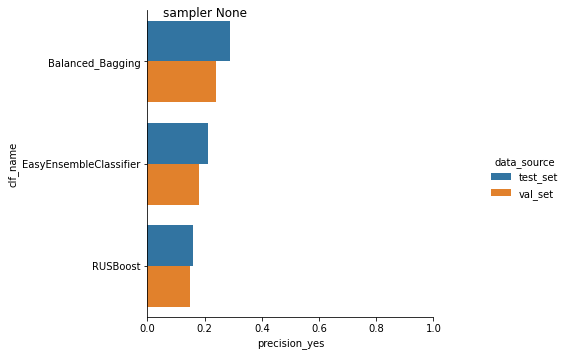

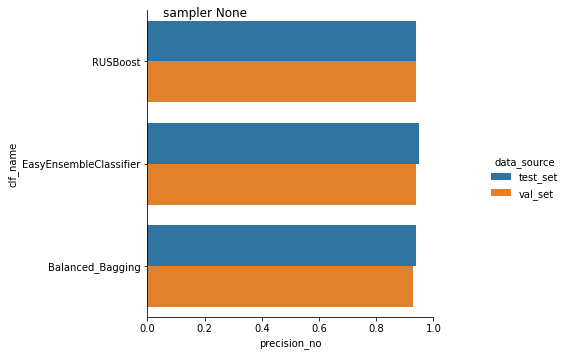

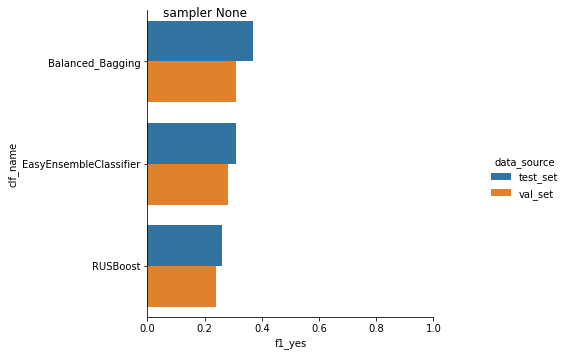

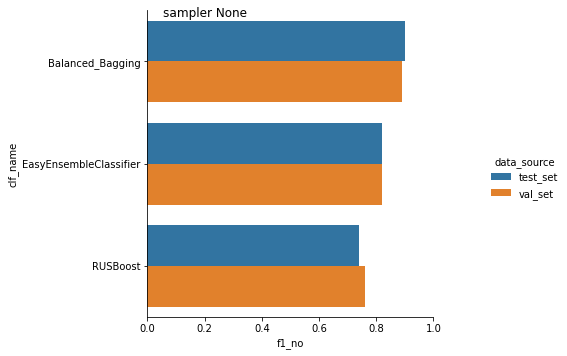

In [79]:
# Evaluate balanced ensemble classifiers on df1
print('For df1:\n')
fun_split_val_multi_clf_all_tasks('None',be_clf_list, be_clf_name_list,X_train1,y_train1,X_val1,y_val1,X_test1,y_test1,'data_source')

For df2:

overall_accuracy from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0        Balanced_Bagging             0.83            0.84
1                RUSBoost             0.78            0.79
2  EasyEnsembleClassifier             0.68            0.72 

recall_yes from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
2  EasyEnsembleClassifier             0.67            0.64
1                RUSBoost             0.57            0.53
0        Balanced_Bagging             0.44            0.45 

recall_no from test (left) and from validation (right)

                 clf_name  test_set_result  val_set_result
0        Balanced_Bagging             0.85            0.86
1                RUSBoost             0.78            0.81
2  EasyEnsembleClassifier             0.68            0.72 

precision_yes from test (left) and from validation (right)

                 clf_name  test_set_resu

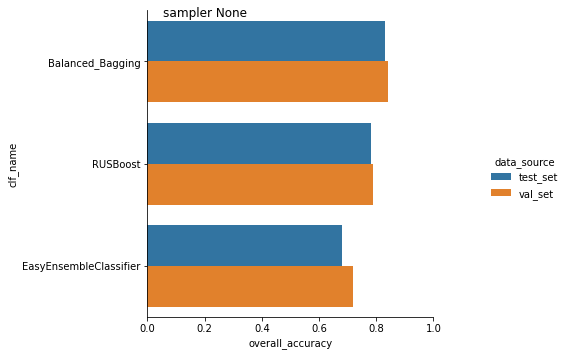

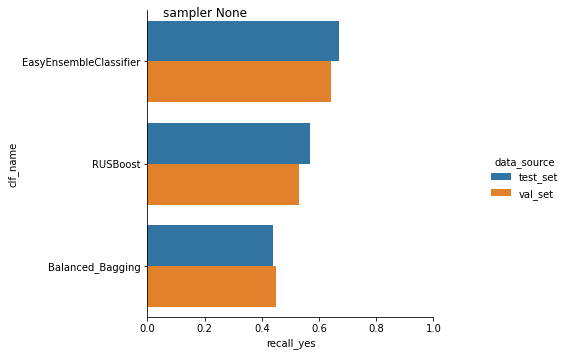

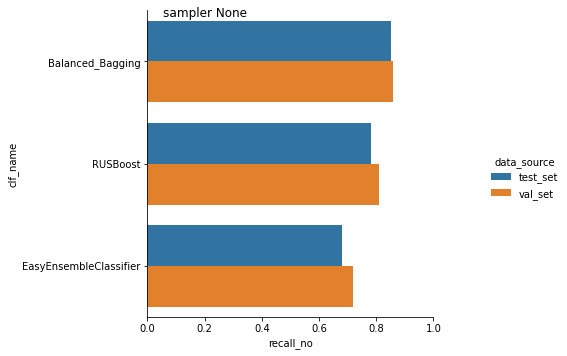

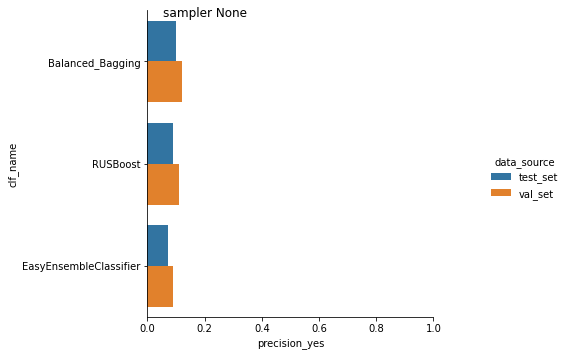

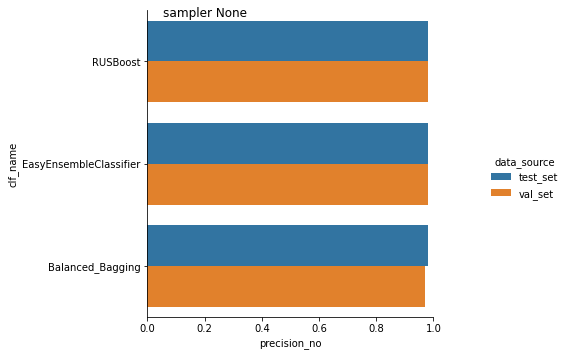

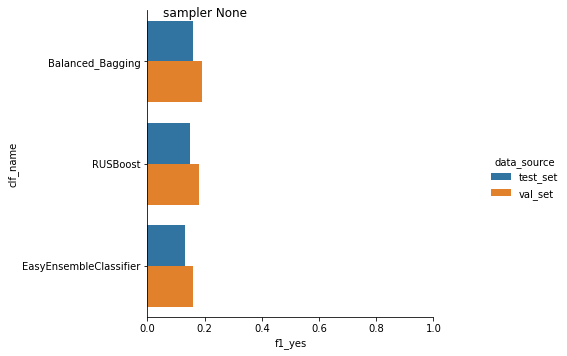

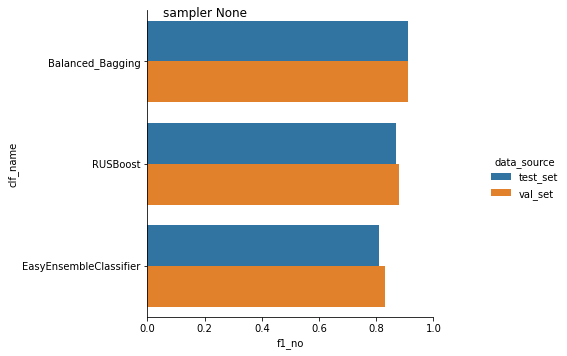

In [80]:
# Evaluate balanced ensemble classifiers on df2
print('For df2:\n')
fun_split_val_multi_clf_all_tasks('None',be_clf_list, be_clf_name_list,X_train2,y_train2,X_val2,y_val2,X_test2,y_test2,'data_source')

# Conclusion
When selecting the best combination of sampling method and classifier from above, the key to remember is that we care most about minimizing type II error for the "Yes" class. In other words we want to minimize the number of actual lemons that the model incorrectly classifies as non-lemons. Granted, it is important be mindful of the tradeoffs. The random forest (rf_max) classifier combined with the "NearMiss2" under sampling technique provides reasonable results for recall on the "Yes" class. But the tradeoff for precision should be be noted.

In [83]:
!cp "/content/drive/MyDrive/Colab Notebooks/car-auction-resampling.ipynb" ./

In [84]:
!jupyter nbconvert --to html "car-auction-resampling.ipynb"

[NbConvertApp] Converting notebook car-auction-resampling.ipynb to html
[NbConvertApp] Writing 7243295 bytes to car-auction-resampling.html
